In [5]:
import random
import oracles
import optimization

from optimization import subgradient_method as subgrad_method, proximal_gradient_method as prox_method
from oracles import create_lasso_nonsmooth_oracle as lasso_oracle, create_lasso_prox_oracle as lasso_prox

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Зафиксируем случайность:

In [6]:
np.random.seed(31415)

###Эксперимент 1

1. Сгенерируем данные

In [ ]:
n, m = 200, 100
alphas = [0.01, 0.1 , 1, 5, 10, 15] #alpha_0

x0 = np.random.uniform(size=m) #starting point
x0_norm = np.array([0.01, 0.1, 1, 5, 10, 15]) #||x0||

A = np.random.uniform(size=(n, m))
b = np.zeros(n)

colors = ['green', 'purple', 'orange', 'red', 'blue', 'olive', 'pink', 'yellow', 
        'black']

2. Для всех ||x0|| найдем duality_gap

In [ ]:
def find_duality_gap(A, b, x0):
  oracle = lasso_oracle(A, b, regcoef = 0.01)
  return [subgrad_method(oracle, x0, a, trace=True)[2]['duality_gap'] for a in alphas]

3. Построим график

0.01 283 0.00949236881117948
0.1 217 0.09614383971011536
1 1 0.19272380210857482
5 1 0.19272380210857482
10 1 0.19272380210857482
15 1 0.19272380210857482


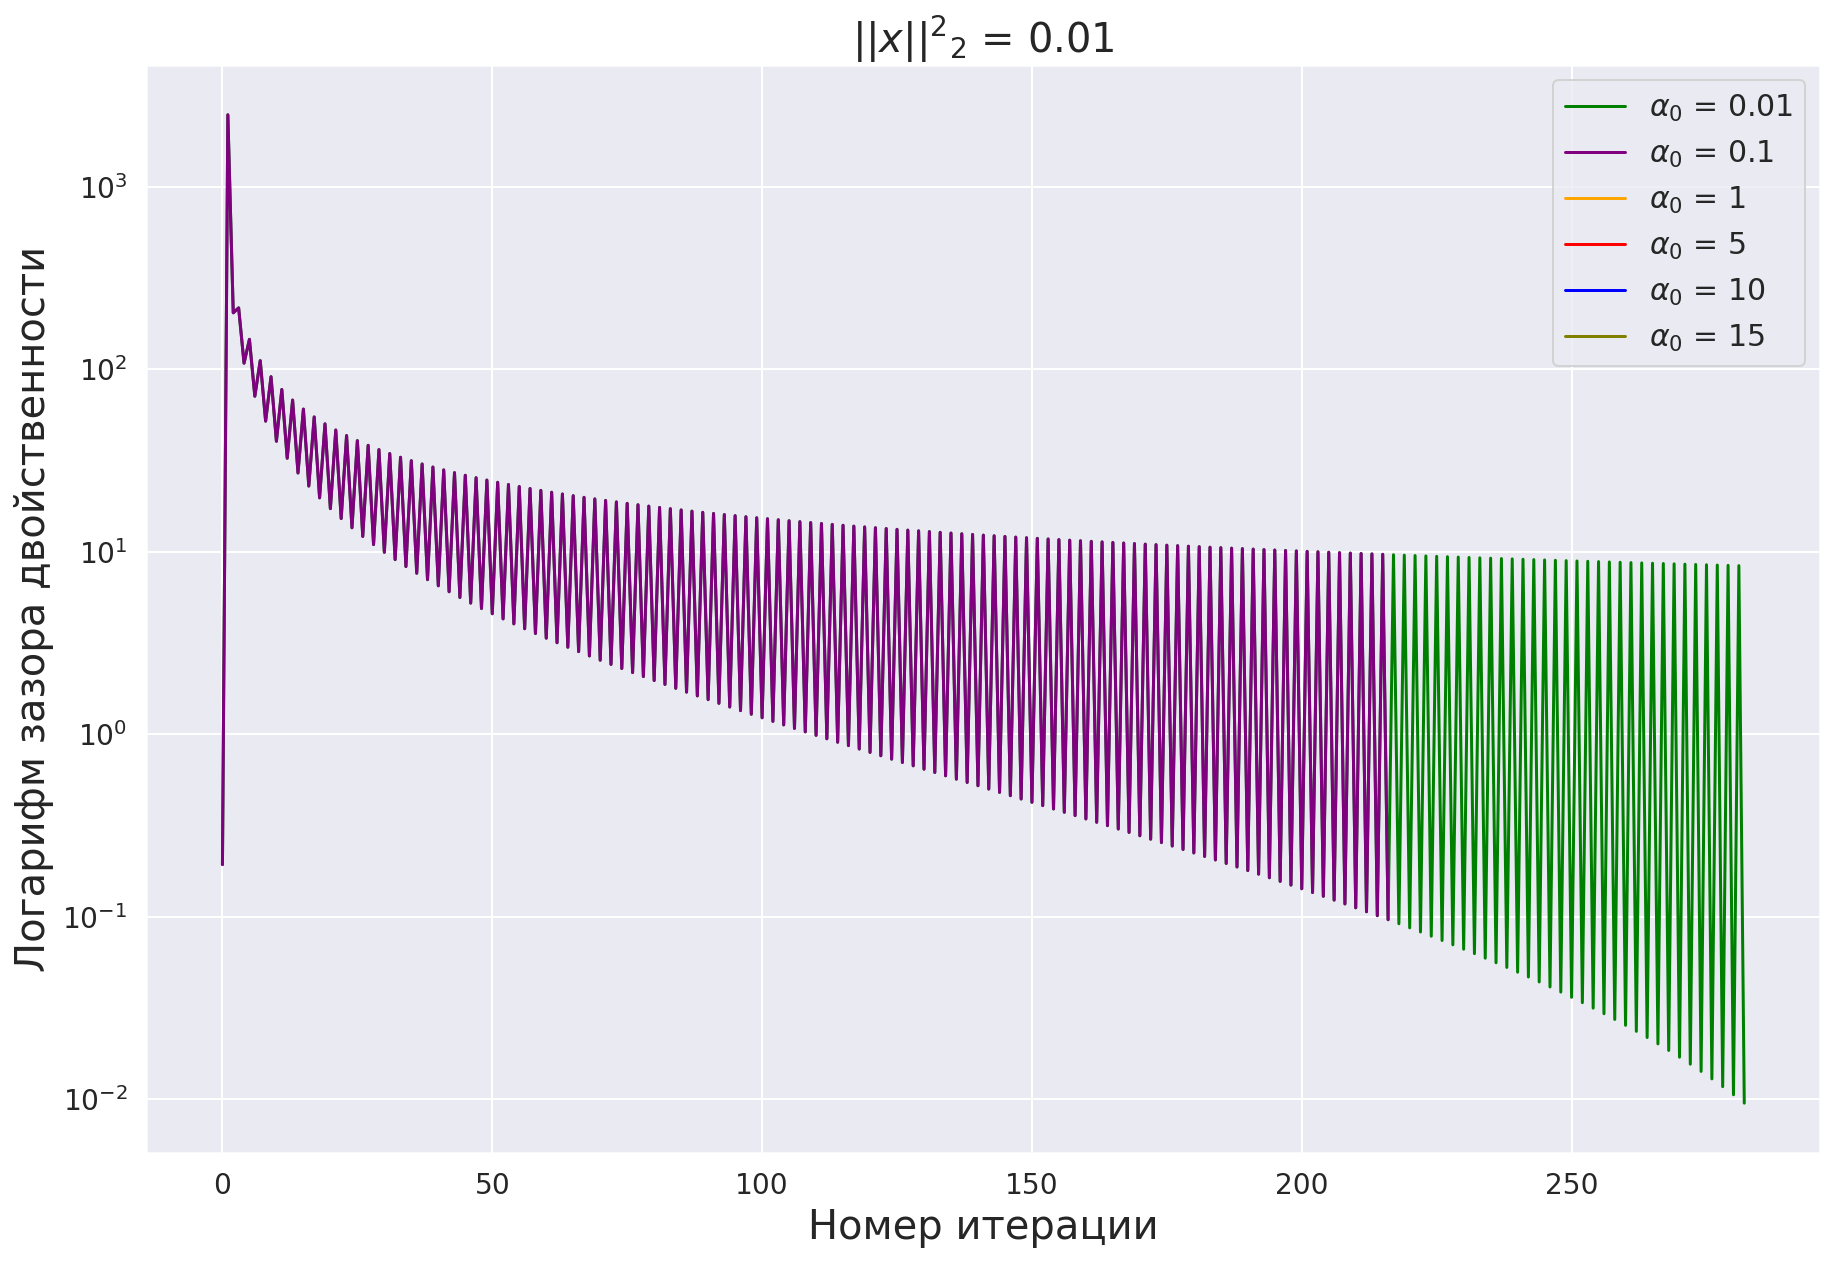

0.01 23 0.008446395287129071
0.1 21 0.054913890784952346
1 17 0.727176249504181
5 13 3.1239932831392085
10 11 5.81409757956828
15 9 10.691598056684384


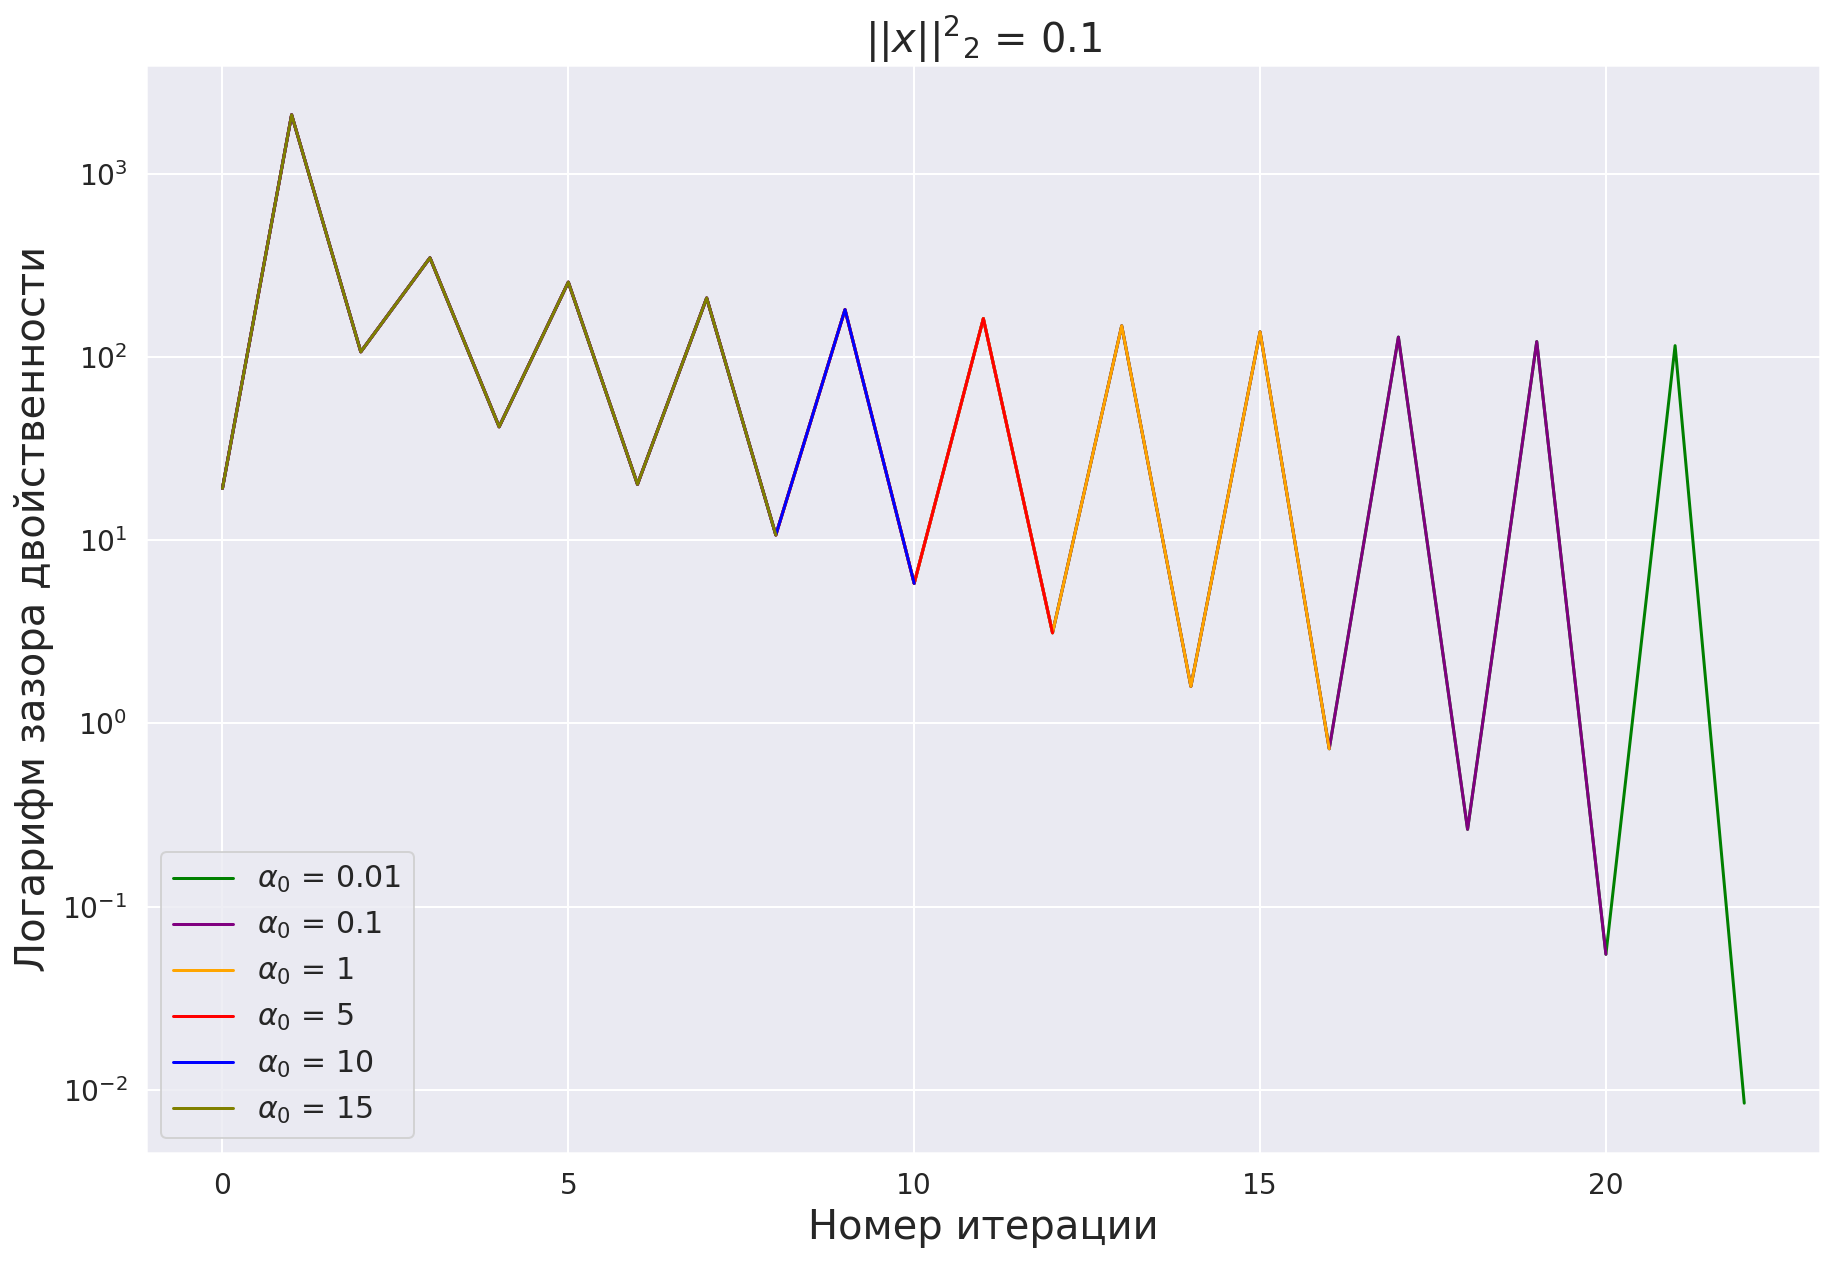

0.01 924 0.00987122482626361
0.1 582 0.09924194092622178
1 212 0.9931867118461267
5 4 1.8838687024791503
10 4 1.8838687024791503
15 4 1.8838687024791503


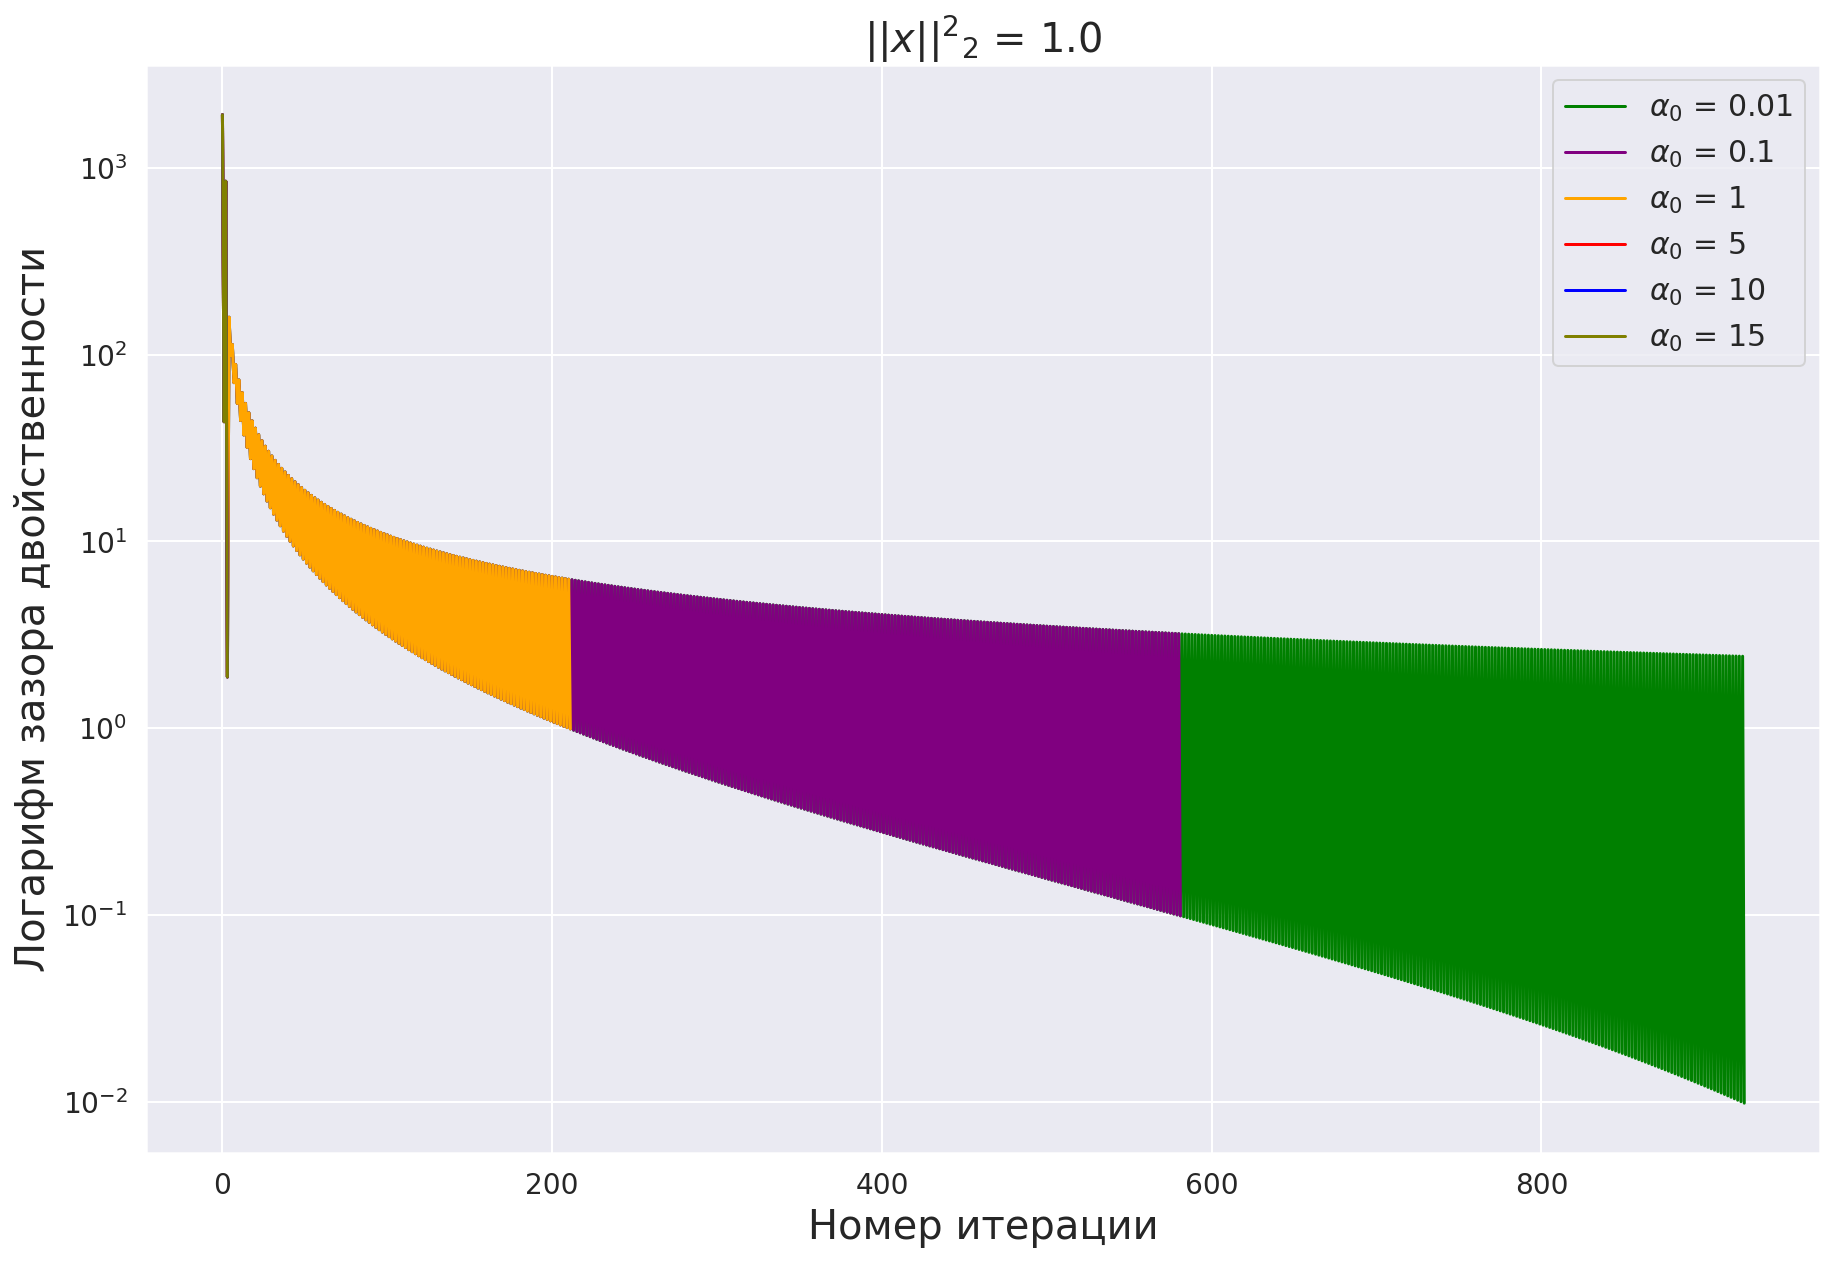

0.01 1001 0.36478323200546847
0.1 1001 0.36478323200546847
1 525 0.9990345262946382
5 151 4.933764138172566
10 81 9.837798355051586
15 53 14.855263929414061


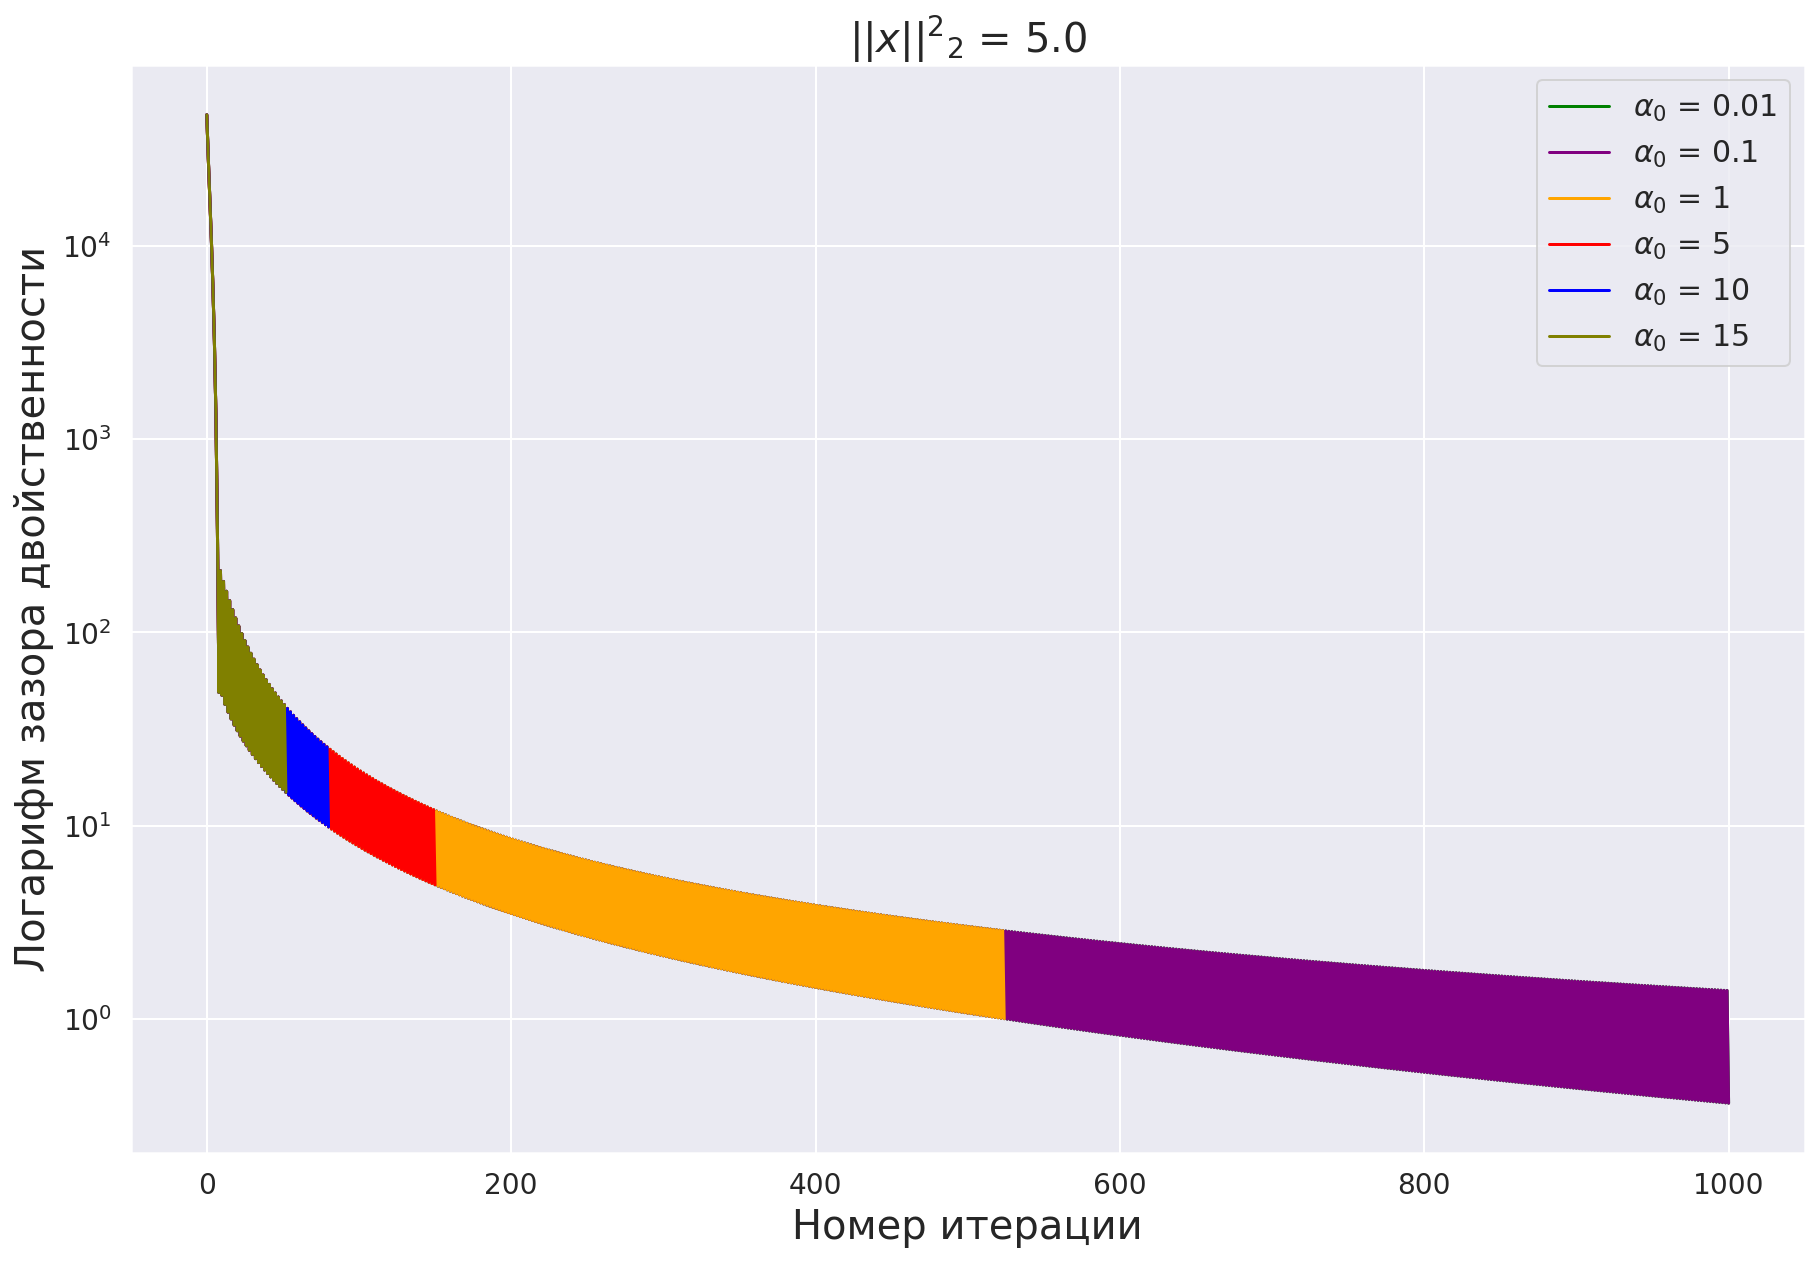

0.01 1001 1.5640331841856407
0.1 1001 1.5640331841856407
1 1001 1.5640331841856407
5 498 4.99619310274825
10 322 9.952930677040873
15 250 14.948336389254047


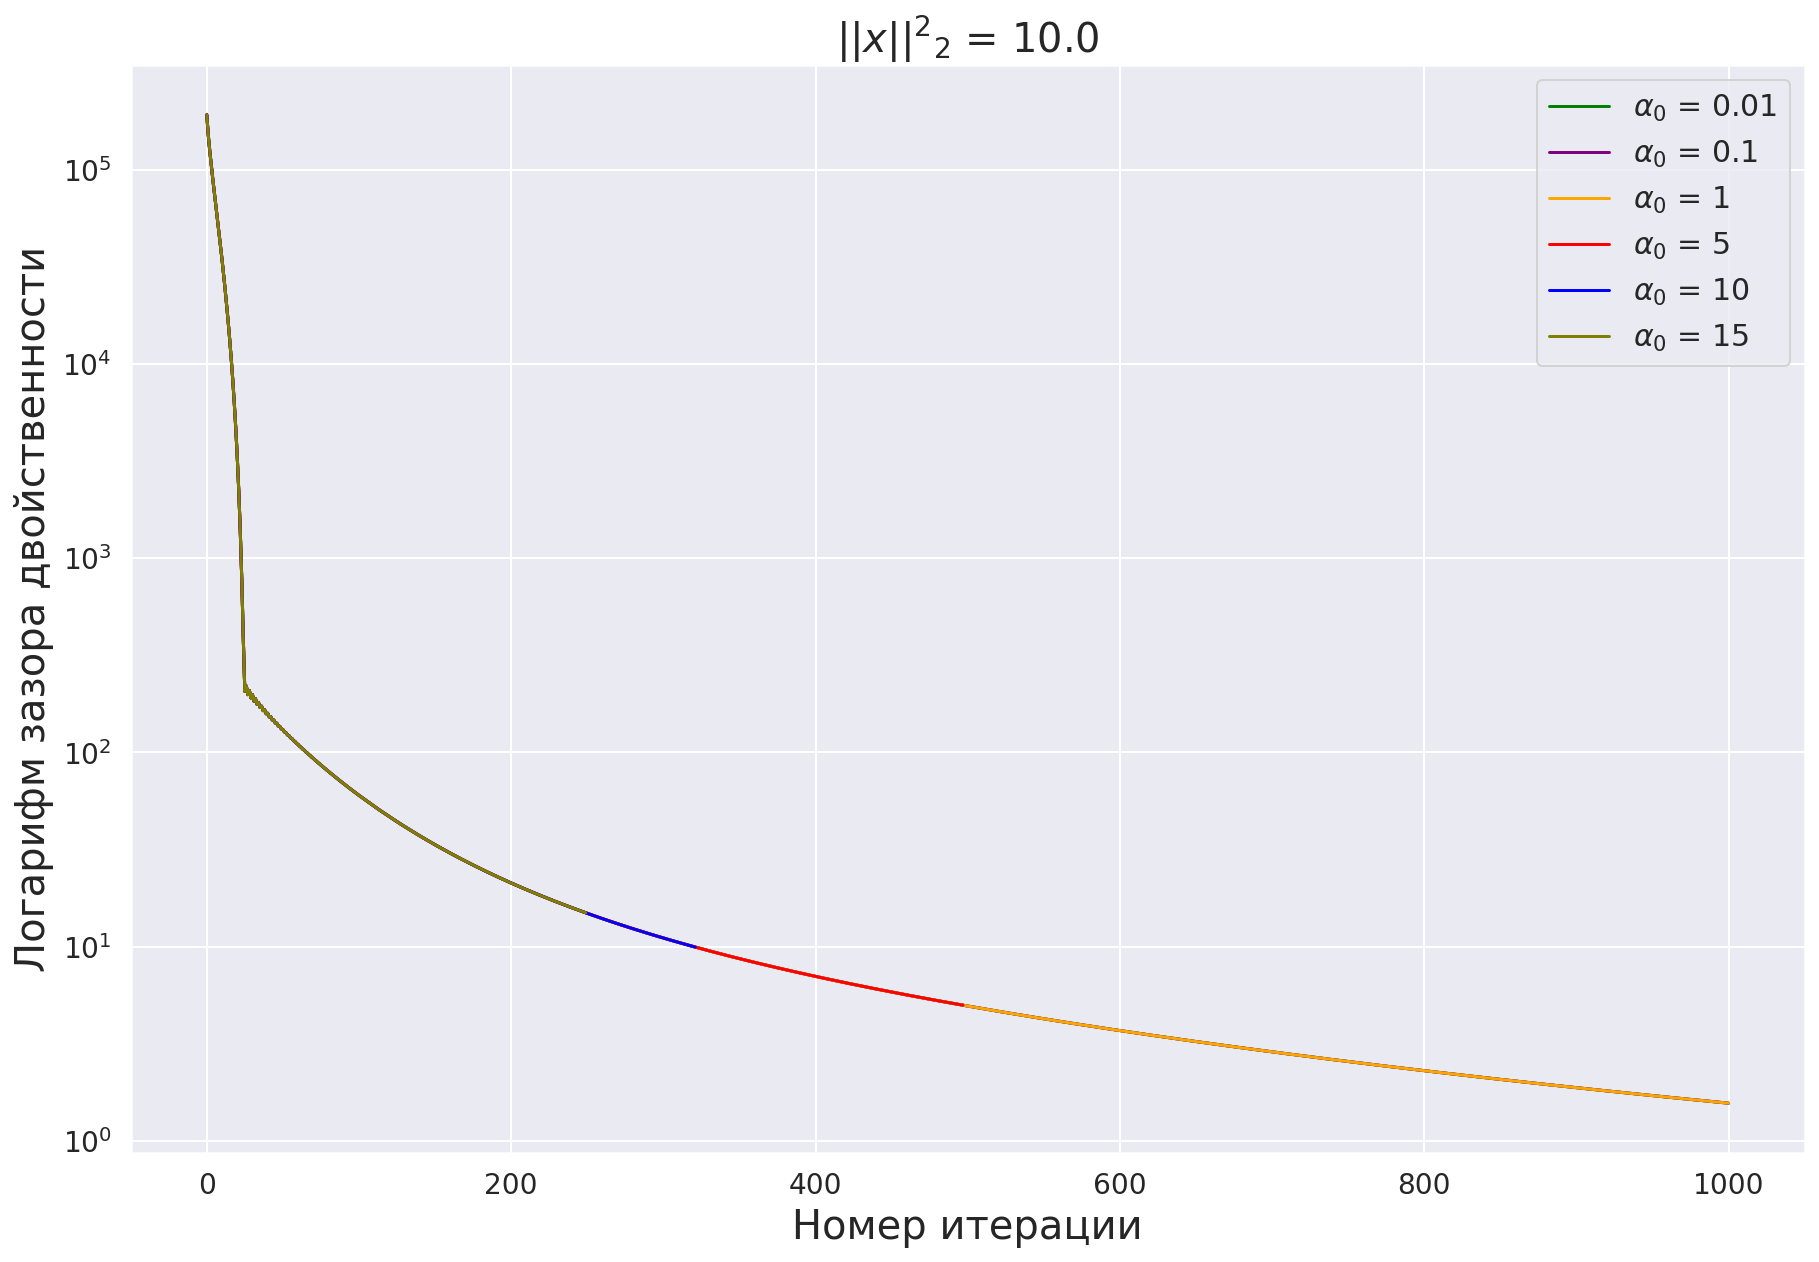

0.01 1001 2.8407114607876145
0.1 1001 2.8407114607876145
1 1001 2.8407114607876145
5 749 4.996572174600856
10 511 9.993634833535161
15 407 14.942402930612356


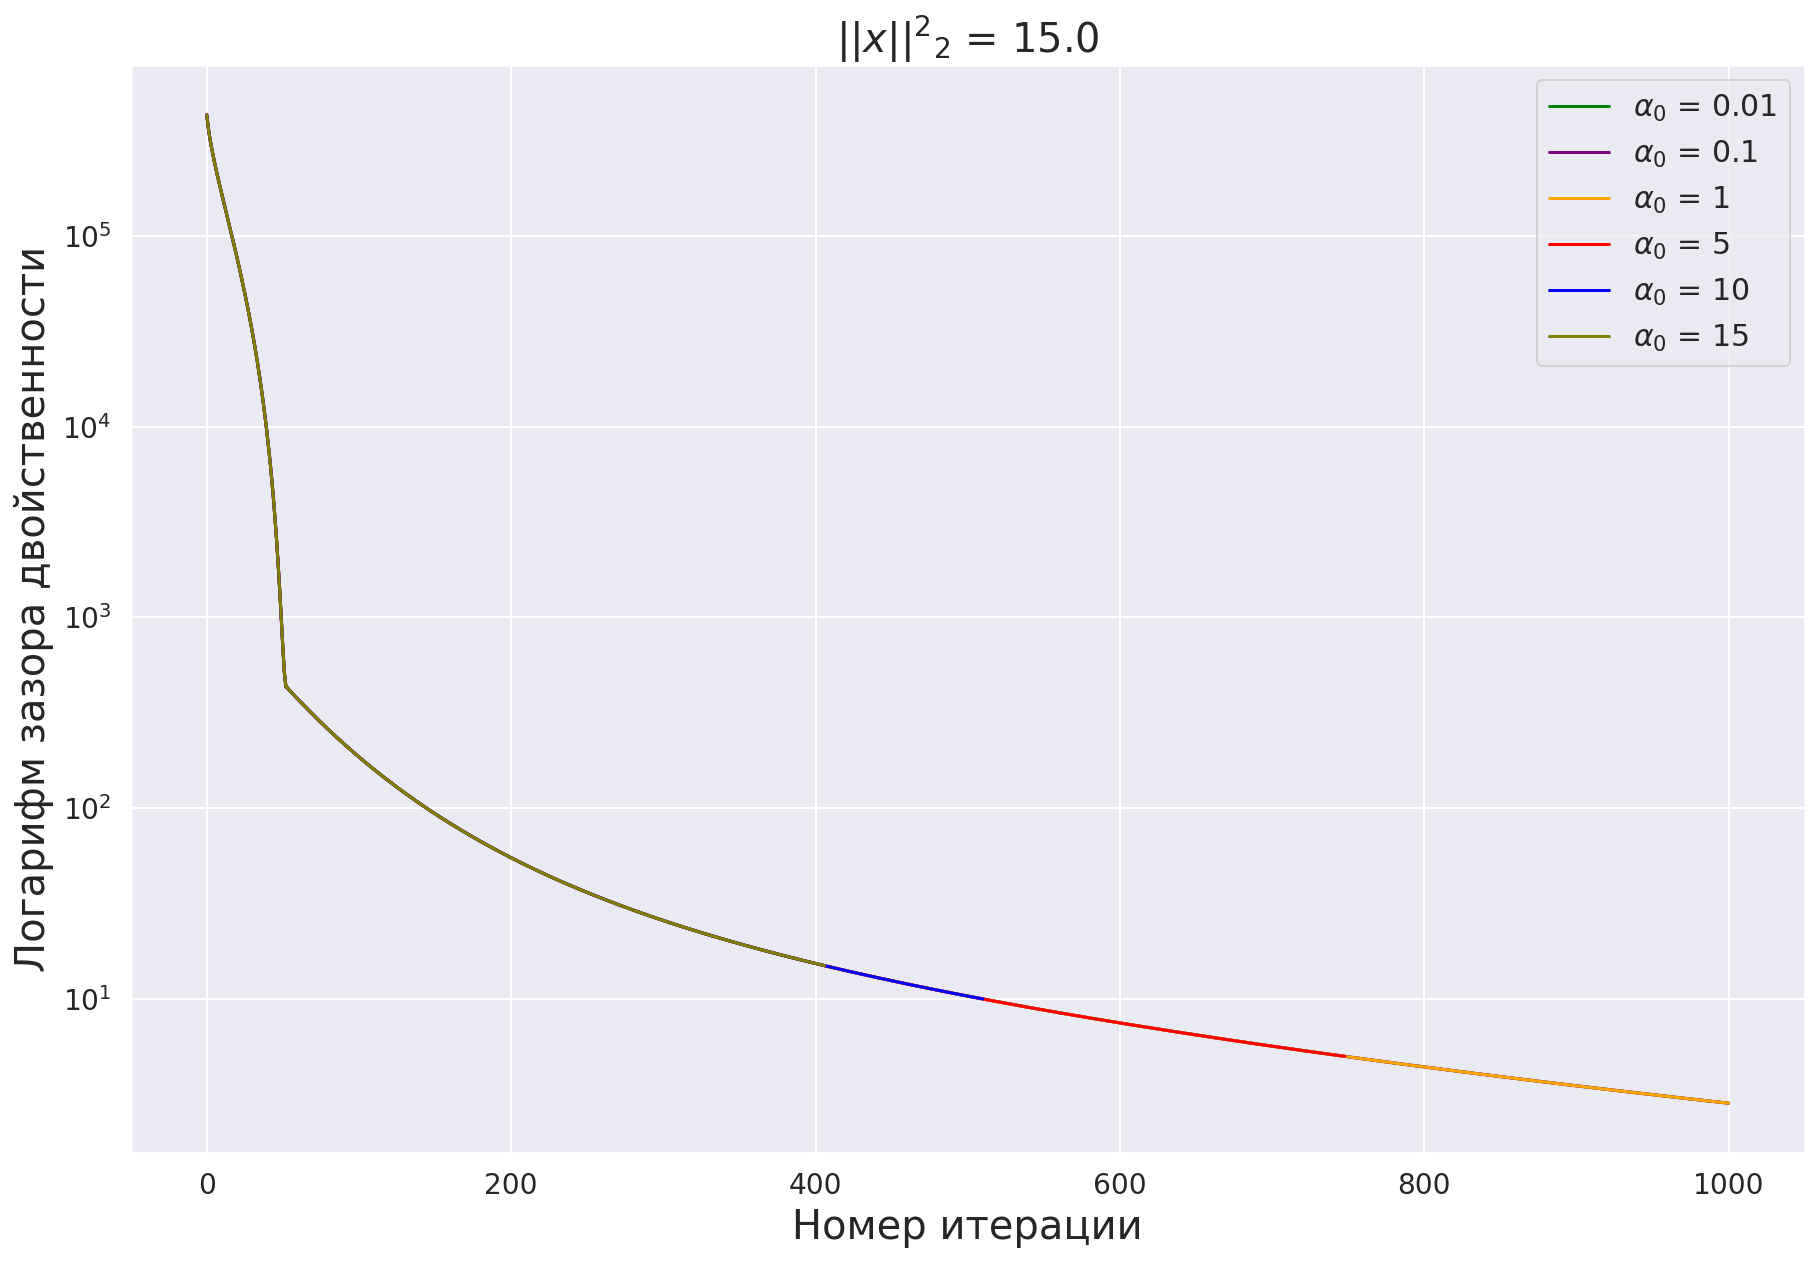

In [ ]:
for sz in x0_norm:
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 10)
  ax.set_xlabel('Номер итерации', fontsize=20)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  ax.set_ylabel('Логарифм зазора двойственности', fontsize=20)
  ax.set_title(r'${||x||^{2}}_2$ = ' + str(sz), fontsize=20)
  gaps = find_duality_gap(A, b, x0 * sz / np.linalg.norm(x0))

  for (i, gap), a in zip(enumerate(gaps), alphas):
    print(a, len(gap), gap[-1])
    ax.plot(np.arange(len(gap)), gap, label = r'$\alpha_0$ = ' + str(a), 
            color=colors[i])
  ax.legend(fontsize=15)
  ax.set_yscale('log')
  ax.grid(True)
  name = '1 task' + str(sz)
  plt.savefig(name + '.pdf', dpi=150)
  plt.show()

###Эксперимент 2

1. Сгенерируем данные

In [ ]:
n, m = 500, 500

A = np.random.normal(size=(n, n))
b = np.random.normal(size=n)
x0 = np.zeros(n)

2. Оракул: 

In [ ]:
oracle = lasso_prox(A, b, regcoef=1)

3. История:

In [ ]:
hist_iters = prox_method(oracle, x0, trace=True, need_iters=True)[2]["iters"]
print("Среднее число итераций:", hist_iters[-1] / len(hist_iters))

Среднее число итераций: 2.005994005994006


4. Построим график

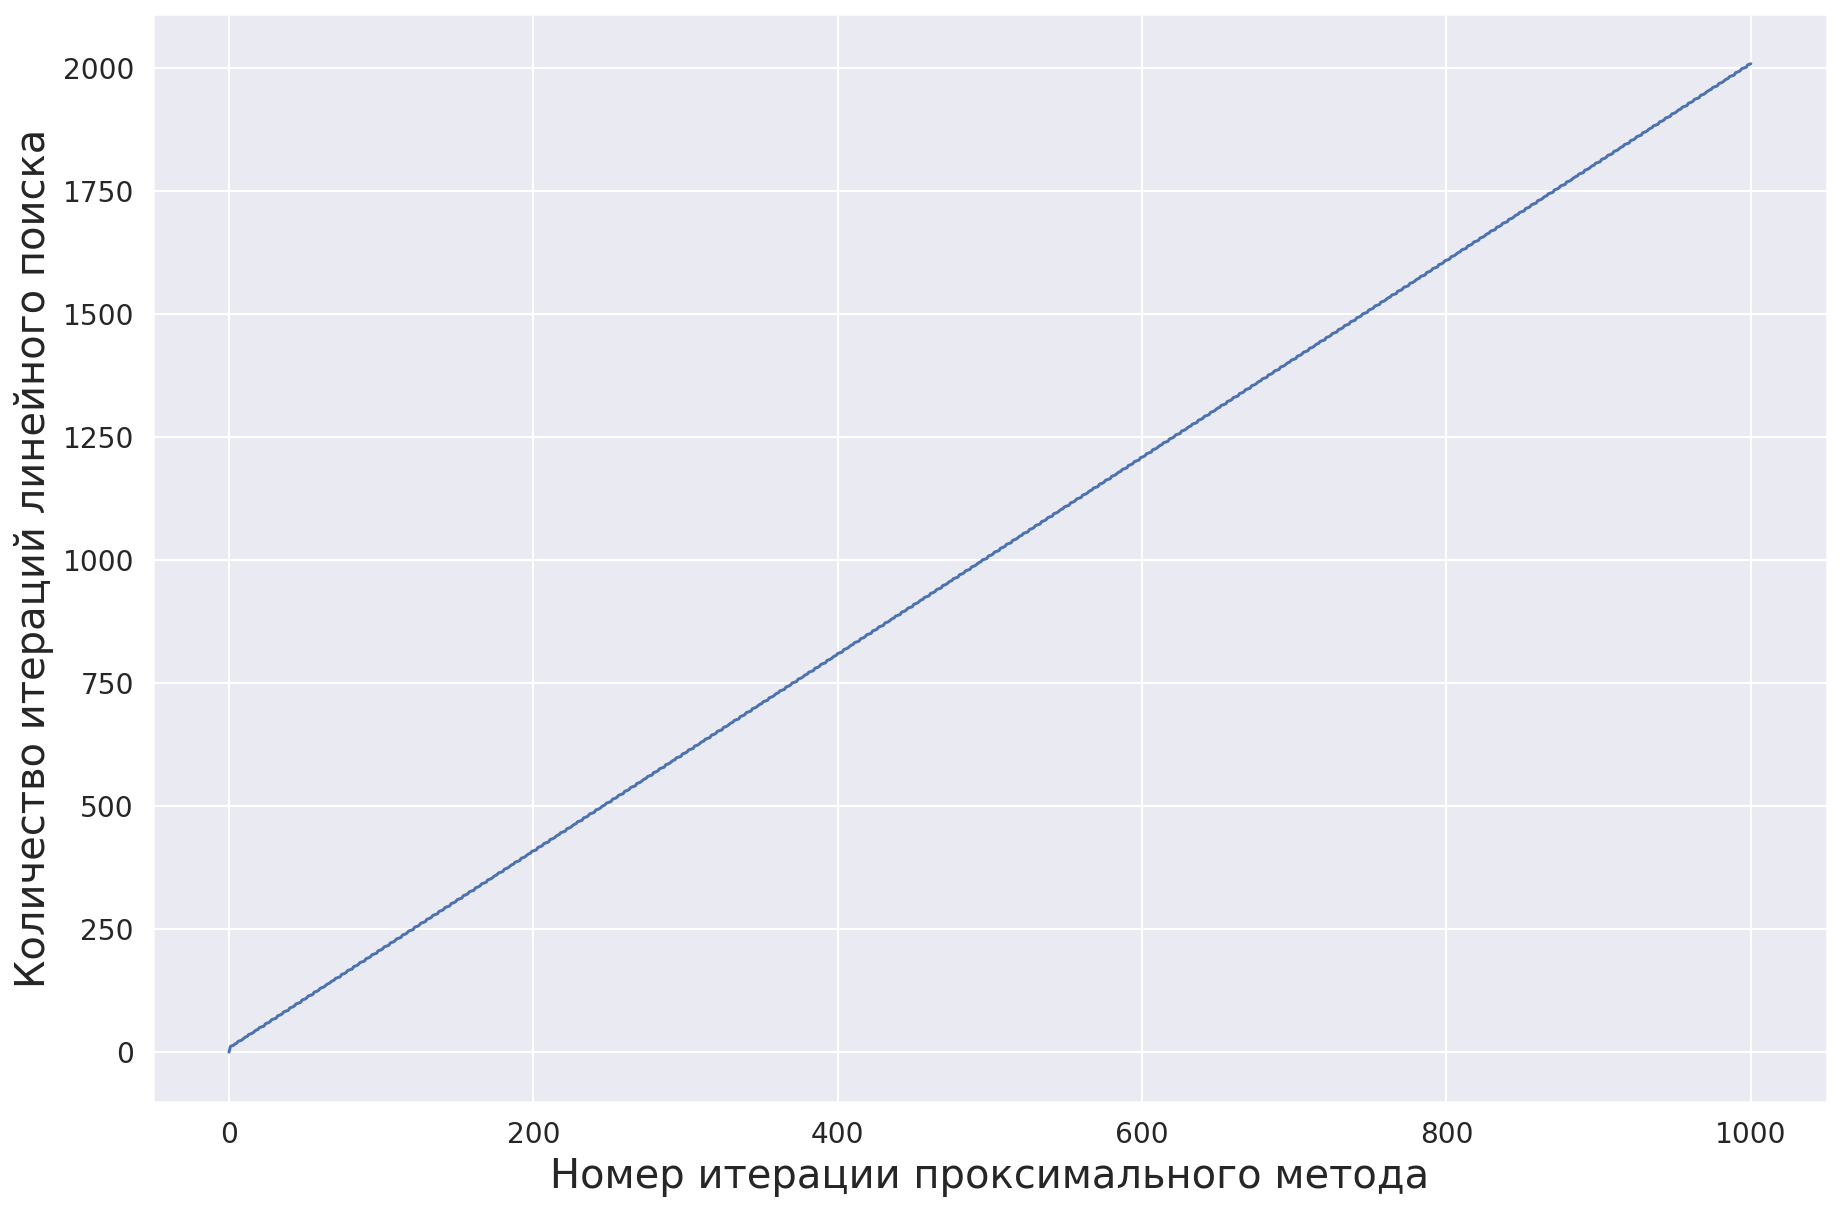

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(hist_iters)), hist_iters)

fig.set_size_inches(15, 10)
ax.set_xlabel('Номер итерации проксимального метода', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylabel('Количество итераций линейного поиска', fontsize=20)

ax.grid(True)
plt.savefig('2 task.pdf', dpi=150)
plt.show()

###Эксперимент 3

1. Рассмотрим вначале графики при изменении размерности пространства $n$.



Переменные:

In [10]:
m = 500
l = 0.1
n_arr = [10, 50, 200, 500, 700, 1000, 3000, 5000]
m_arr = [10, 50, 200, 500, 700, 1000, 3000, 5000]

In [8]:
def methods_histories(m, n):
  A = np.random.normal(size=(m, n))
  b = np.random.normal(size=m)
  x0 = np.ones(n) / 2
  u0 = np.ones(n)
  barrier_hist = optimization.barrier_method_lasso(A, b, 1, x0, 
                                                   u0, lasso_duality_gap=oracles.lasso_duality_gap,
                                                                       trace=True)[2] #логбарьеры  
  subgrad_hist = subgrad_method(lasso_oracle(A, b, l), x0, trace=True)[2] #субградиентный метод
  prox_hist = prox_method(lasso_prox(A, b, l), x0, trace=True)[2] #проксимальный метод
  
  return {'Субградиентный метод' : subgrad_hist,
          'Метод логбарьеров' : barrier_hist, 
          'Проксимальный метод' : prox_hist
          }

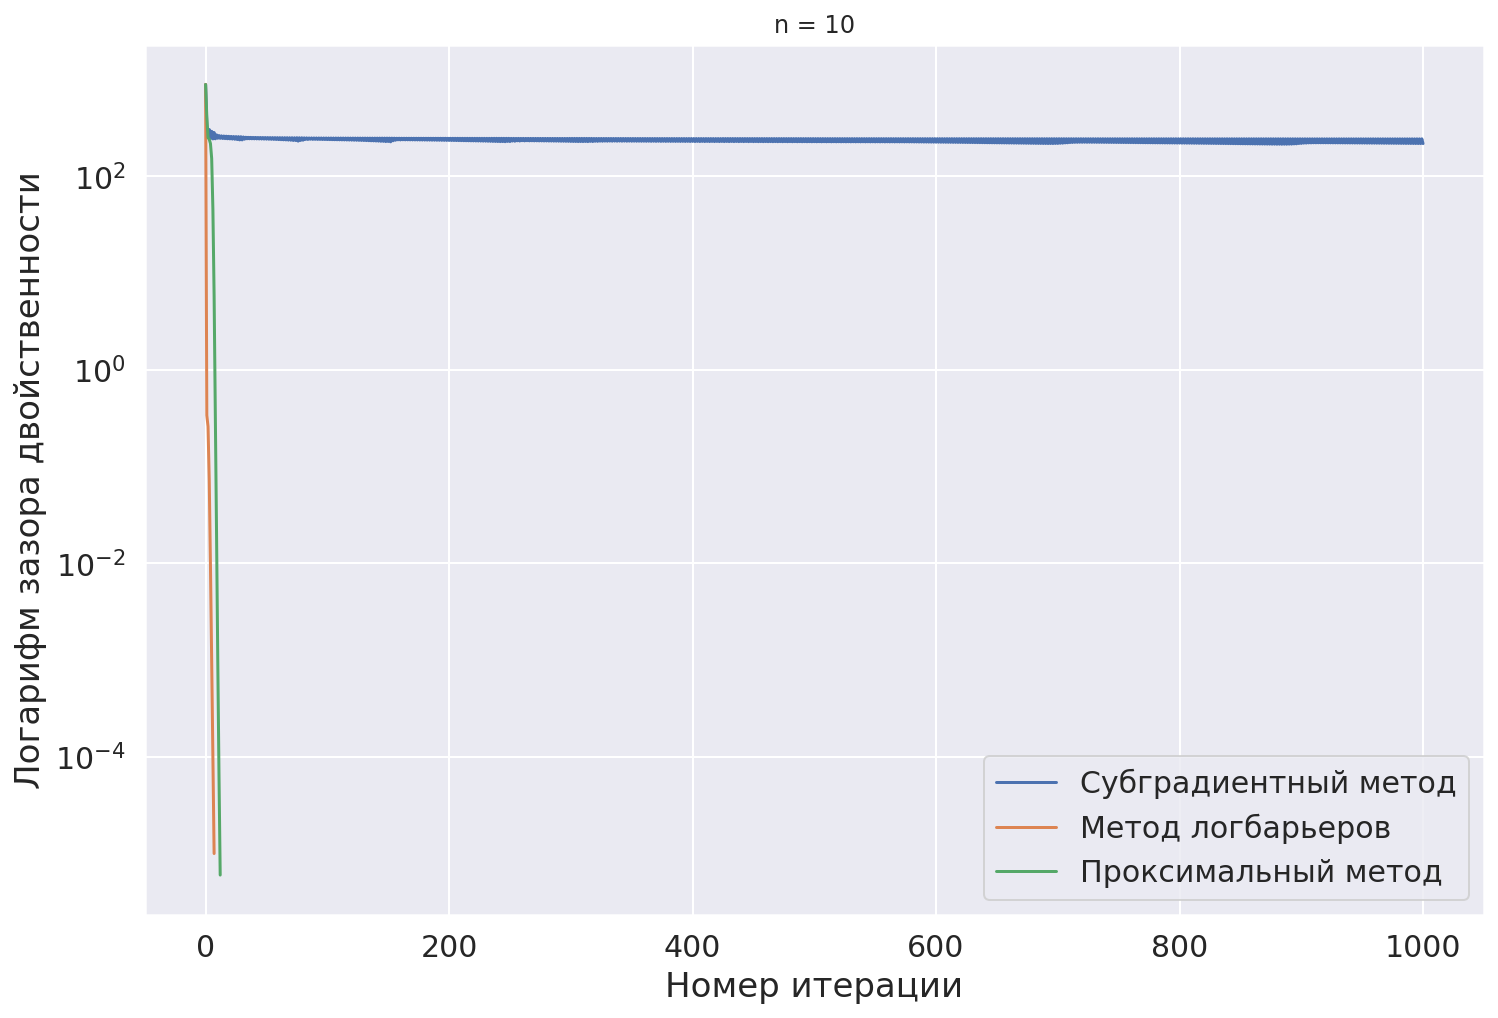

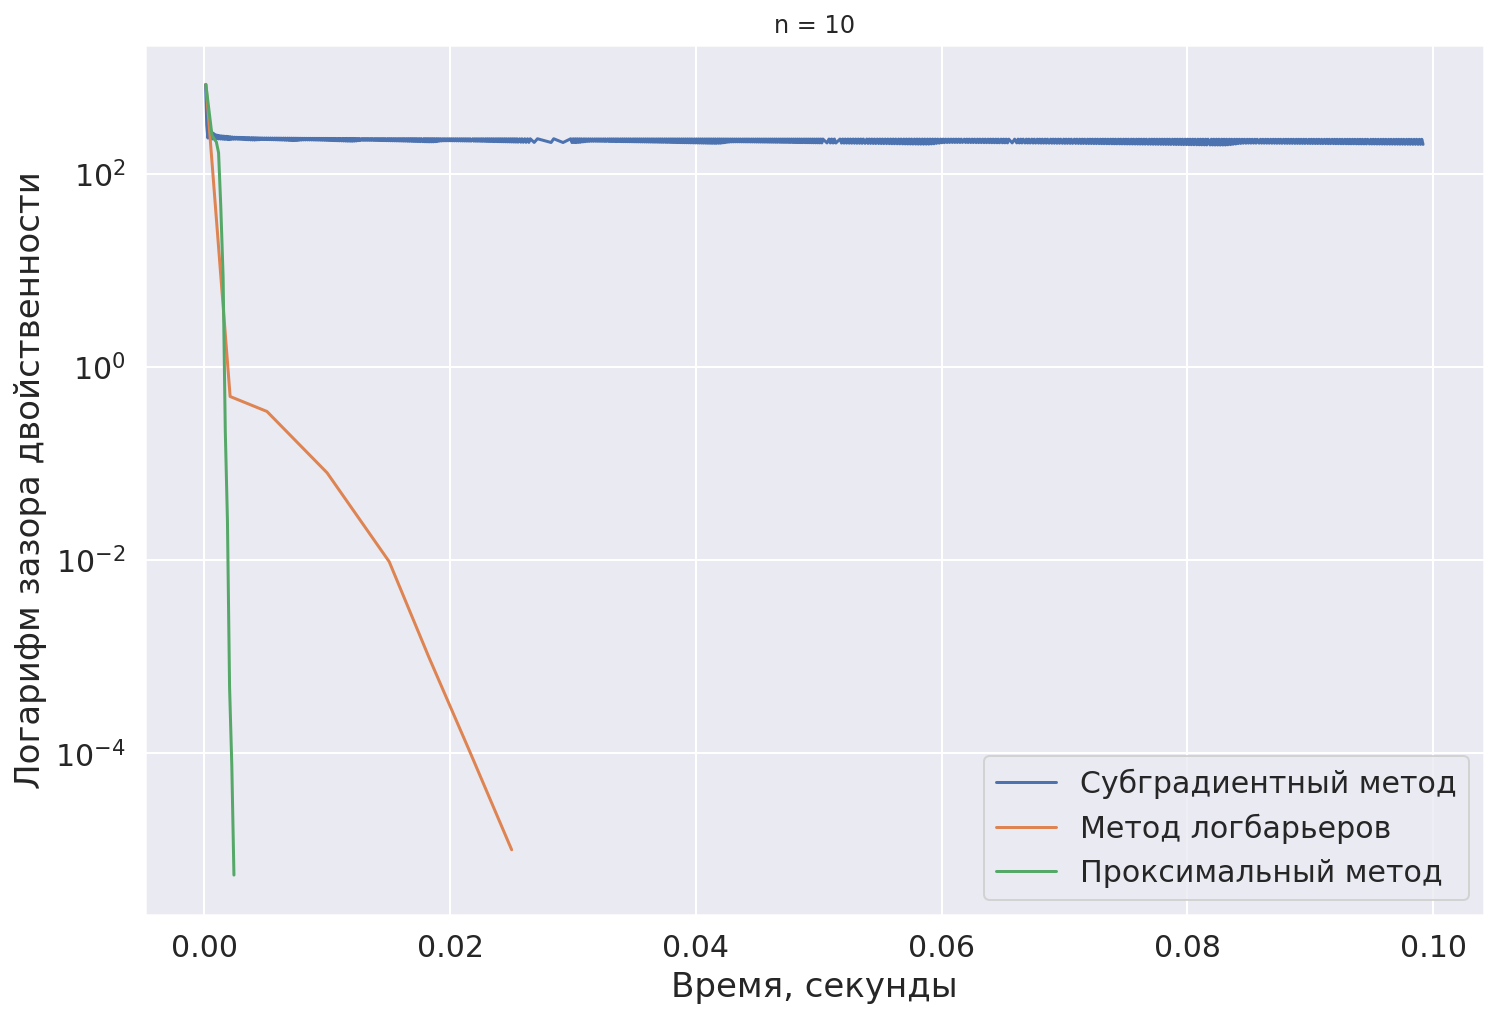

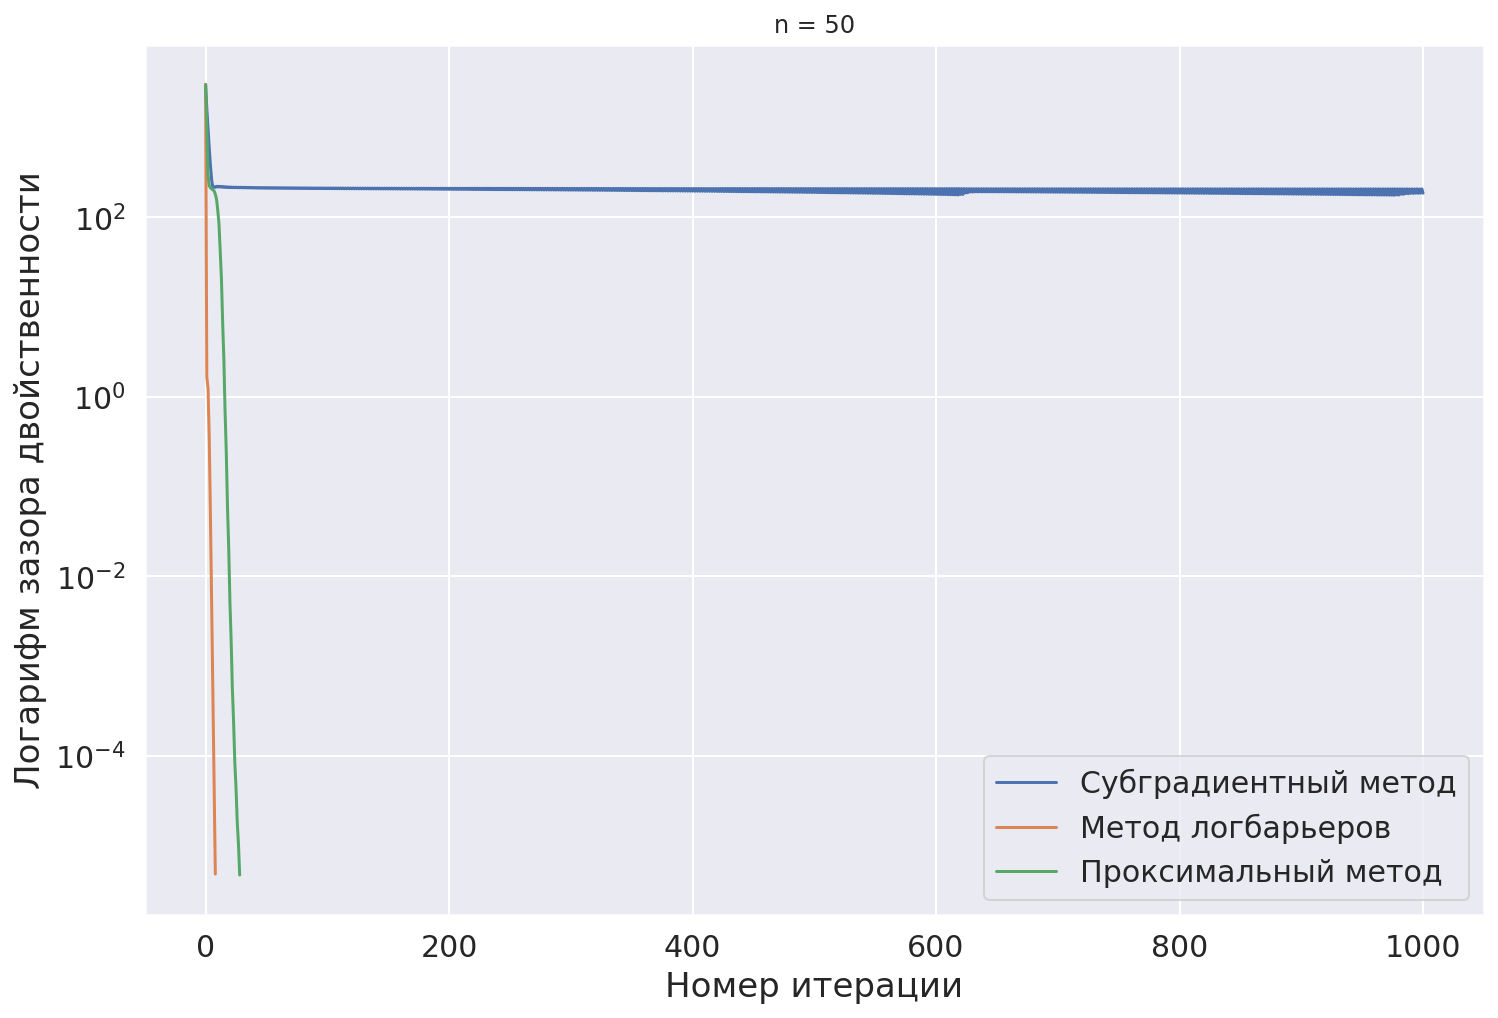

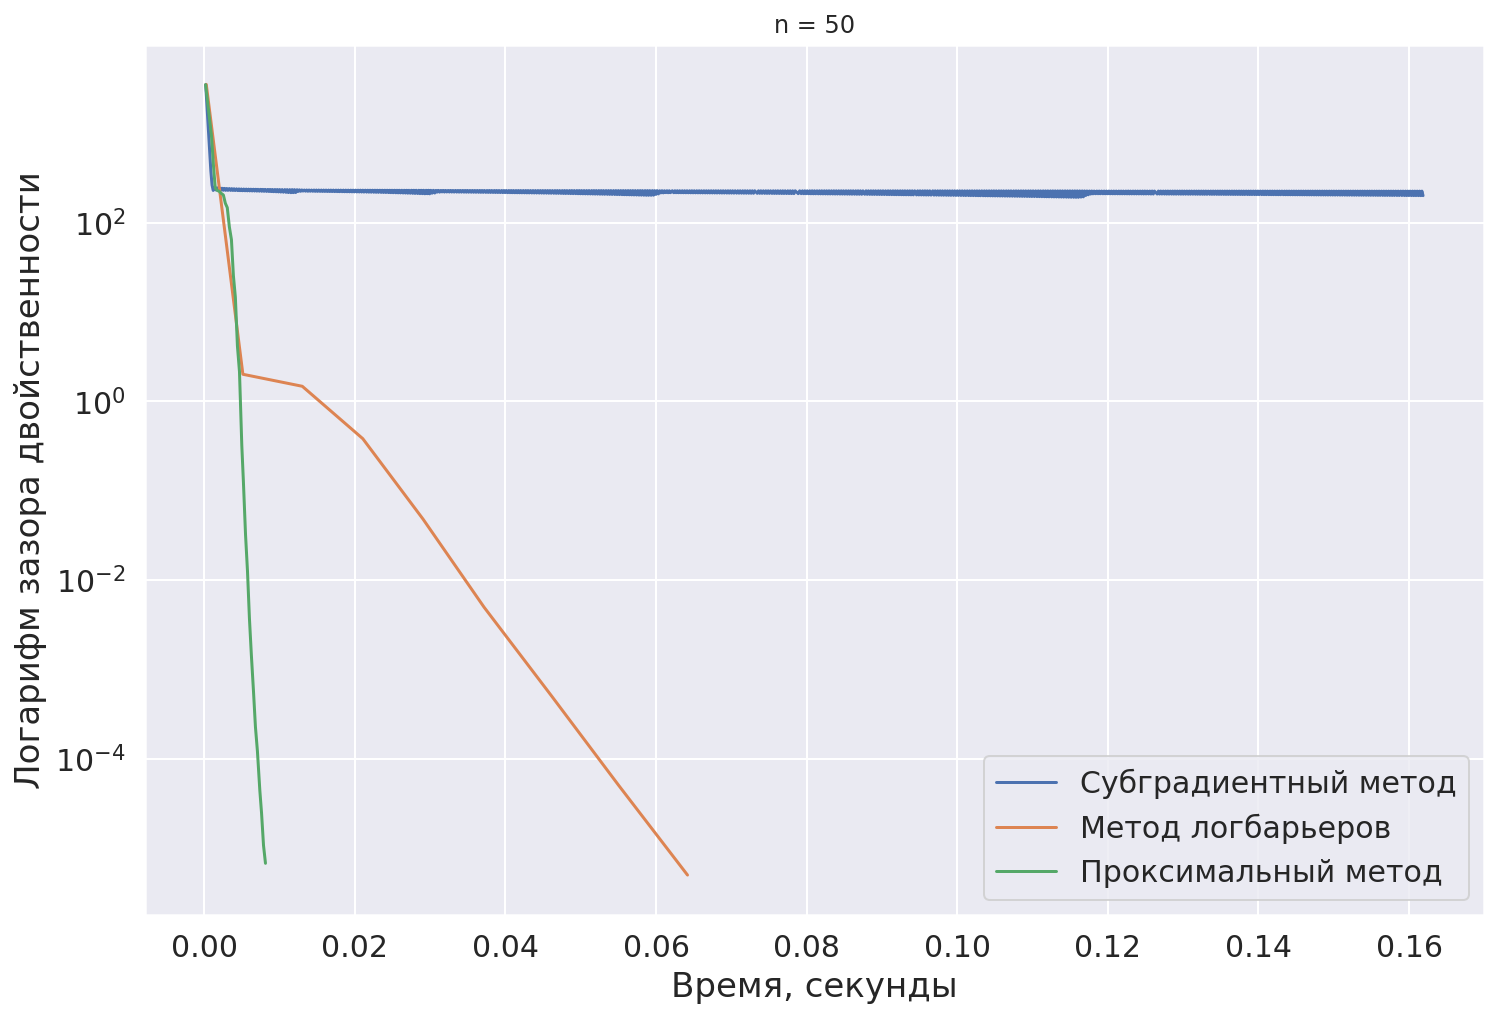

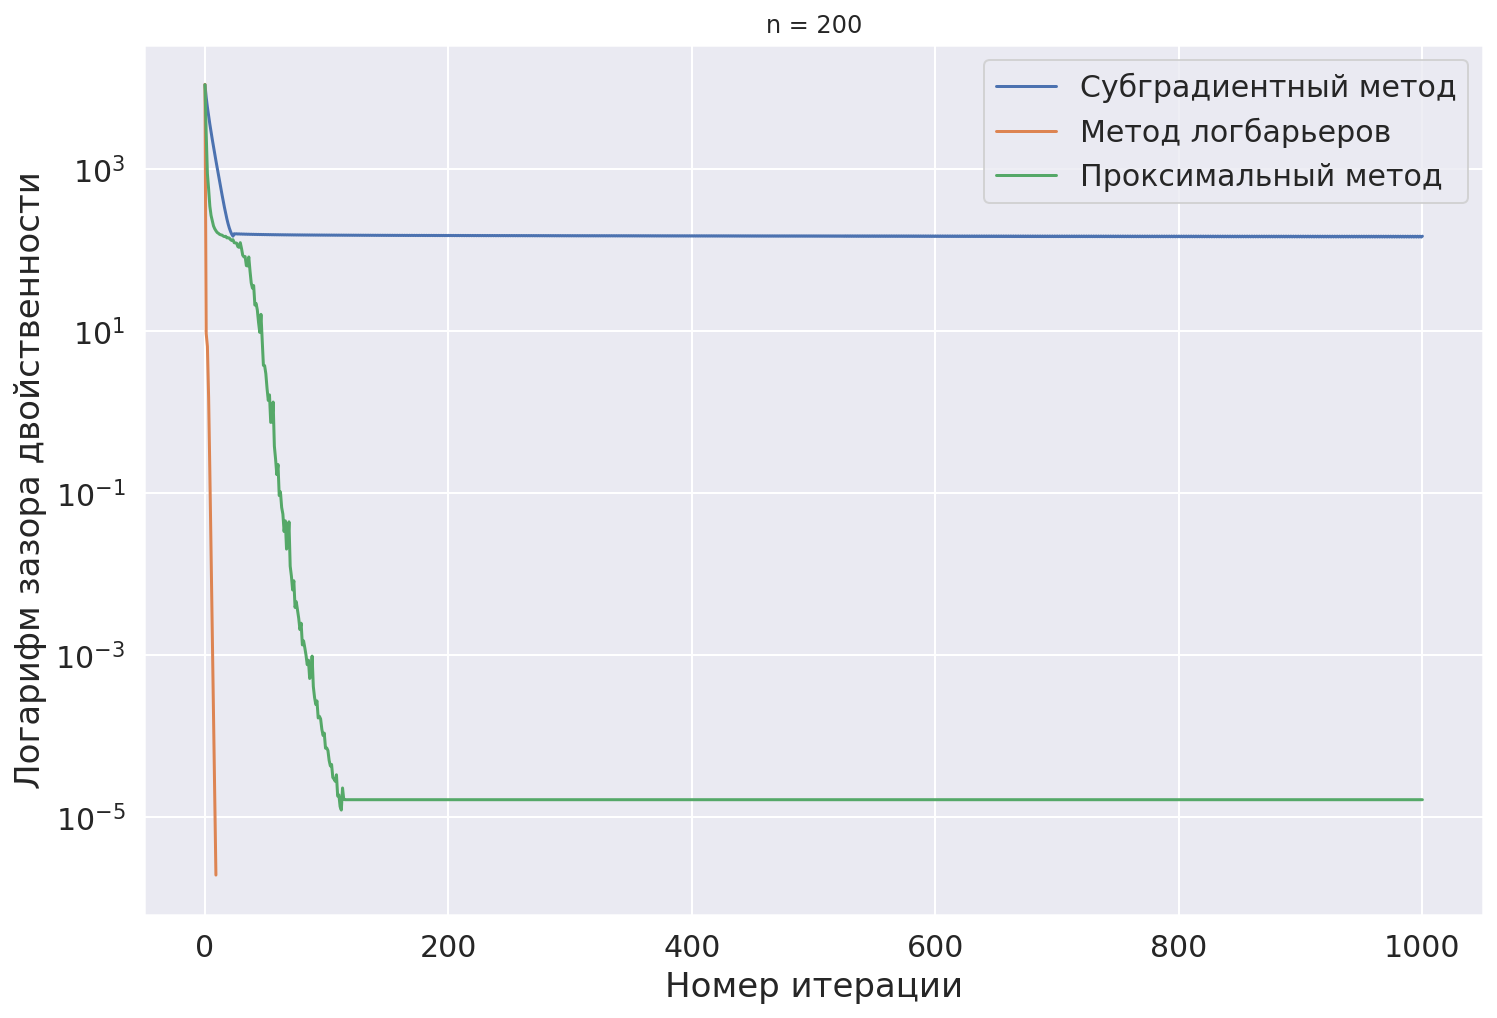

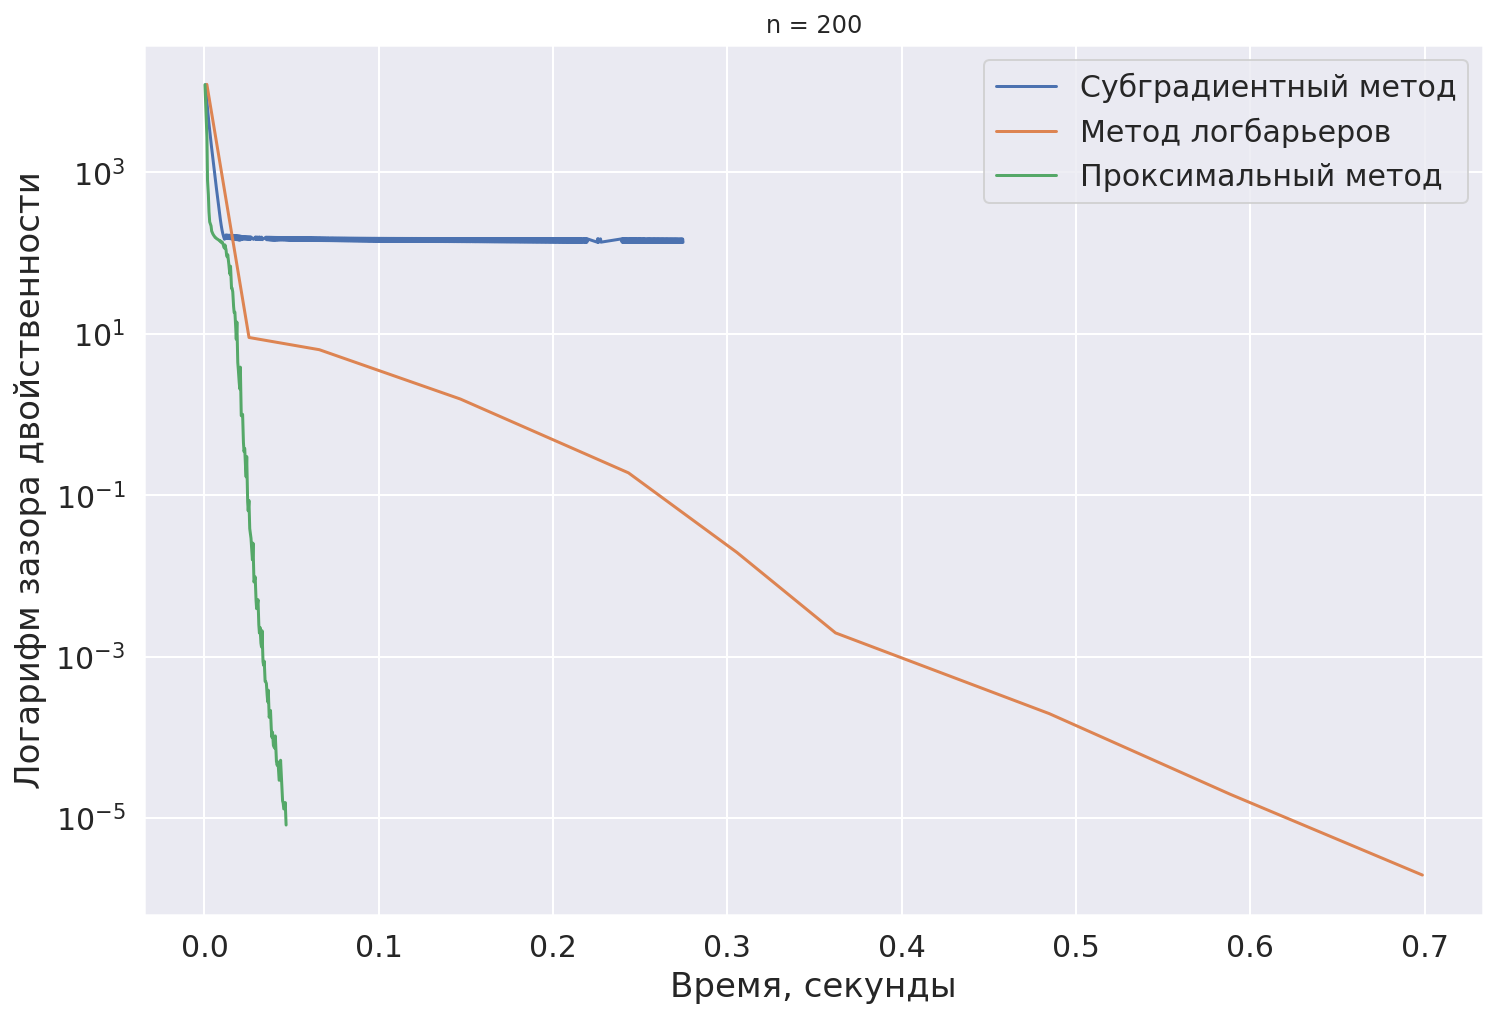

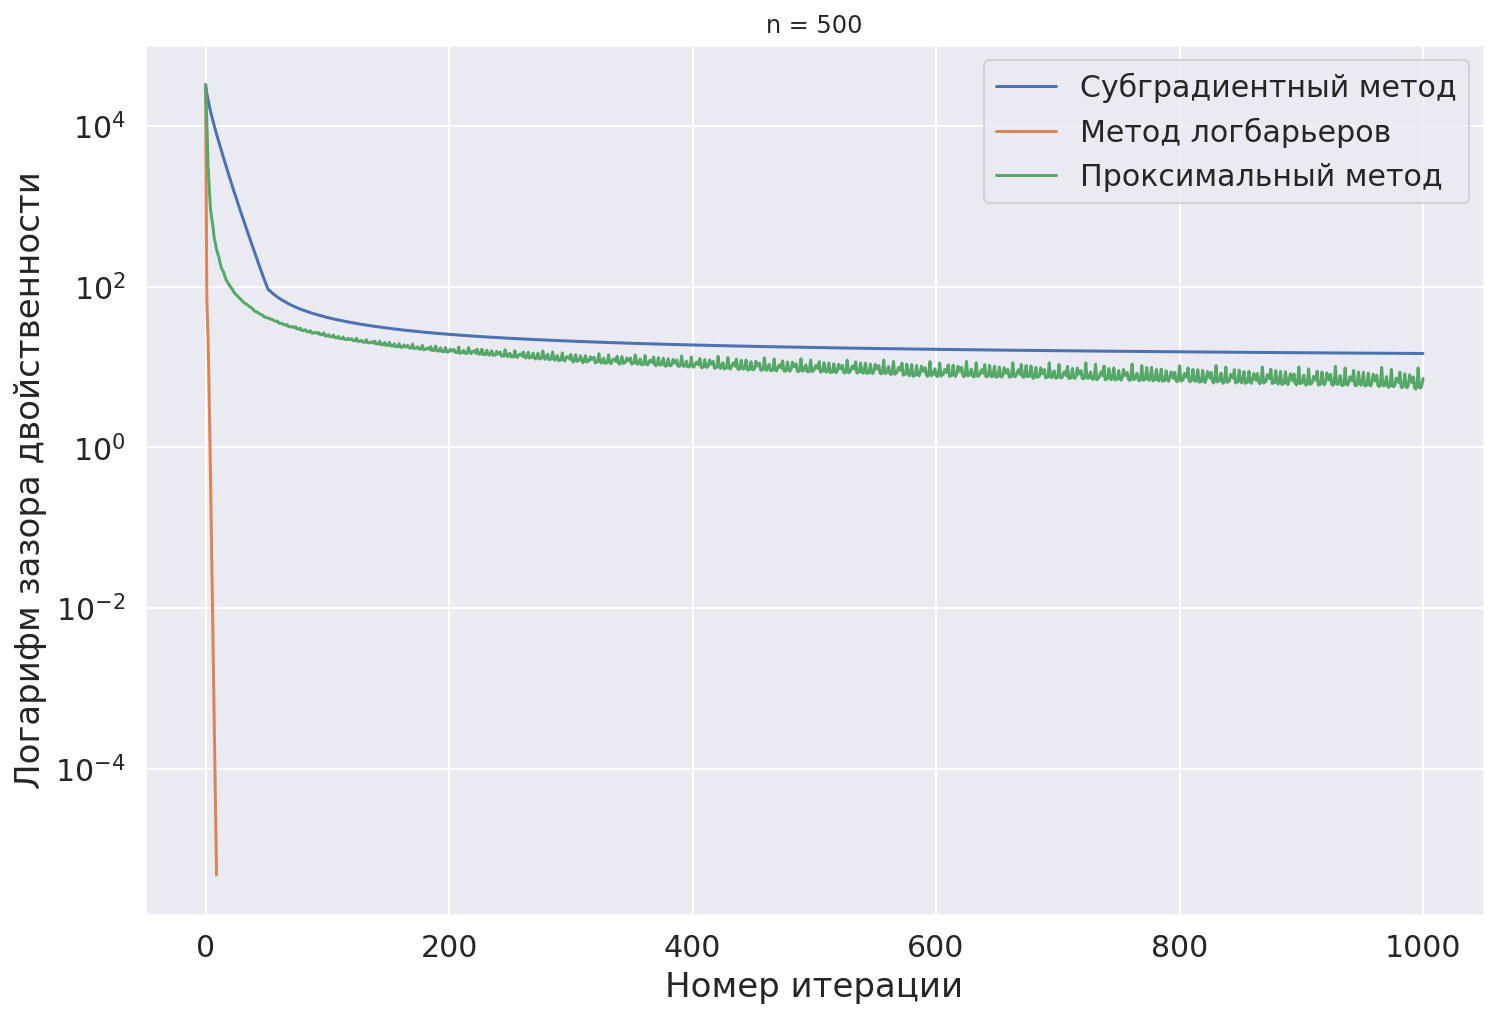

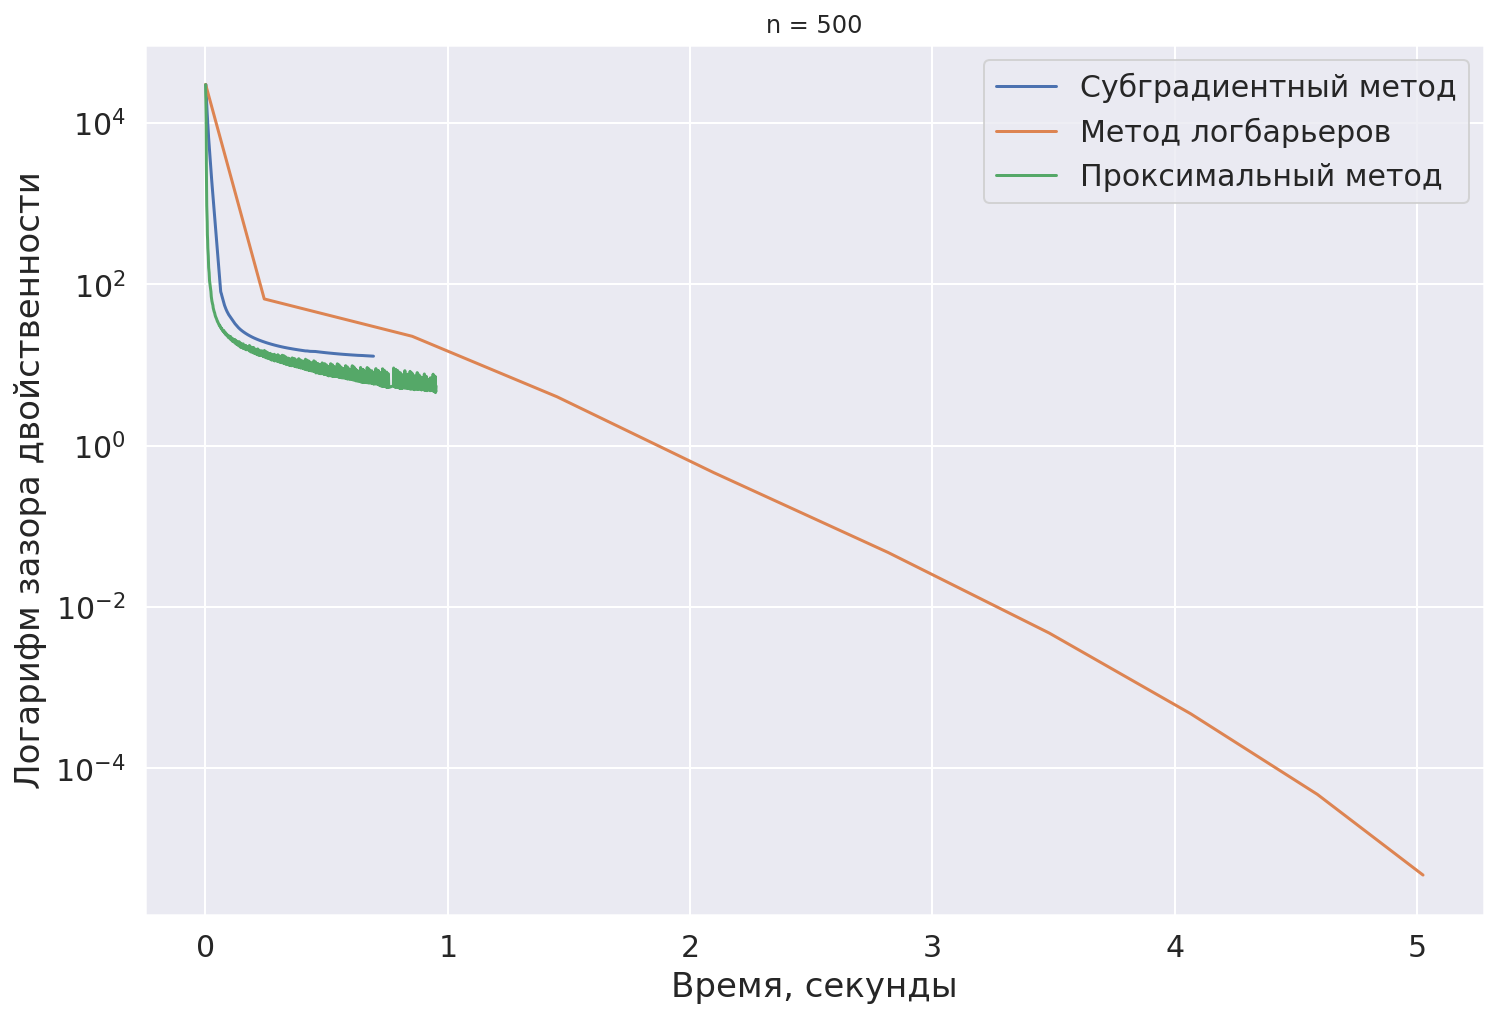

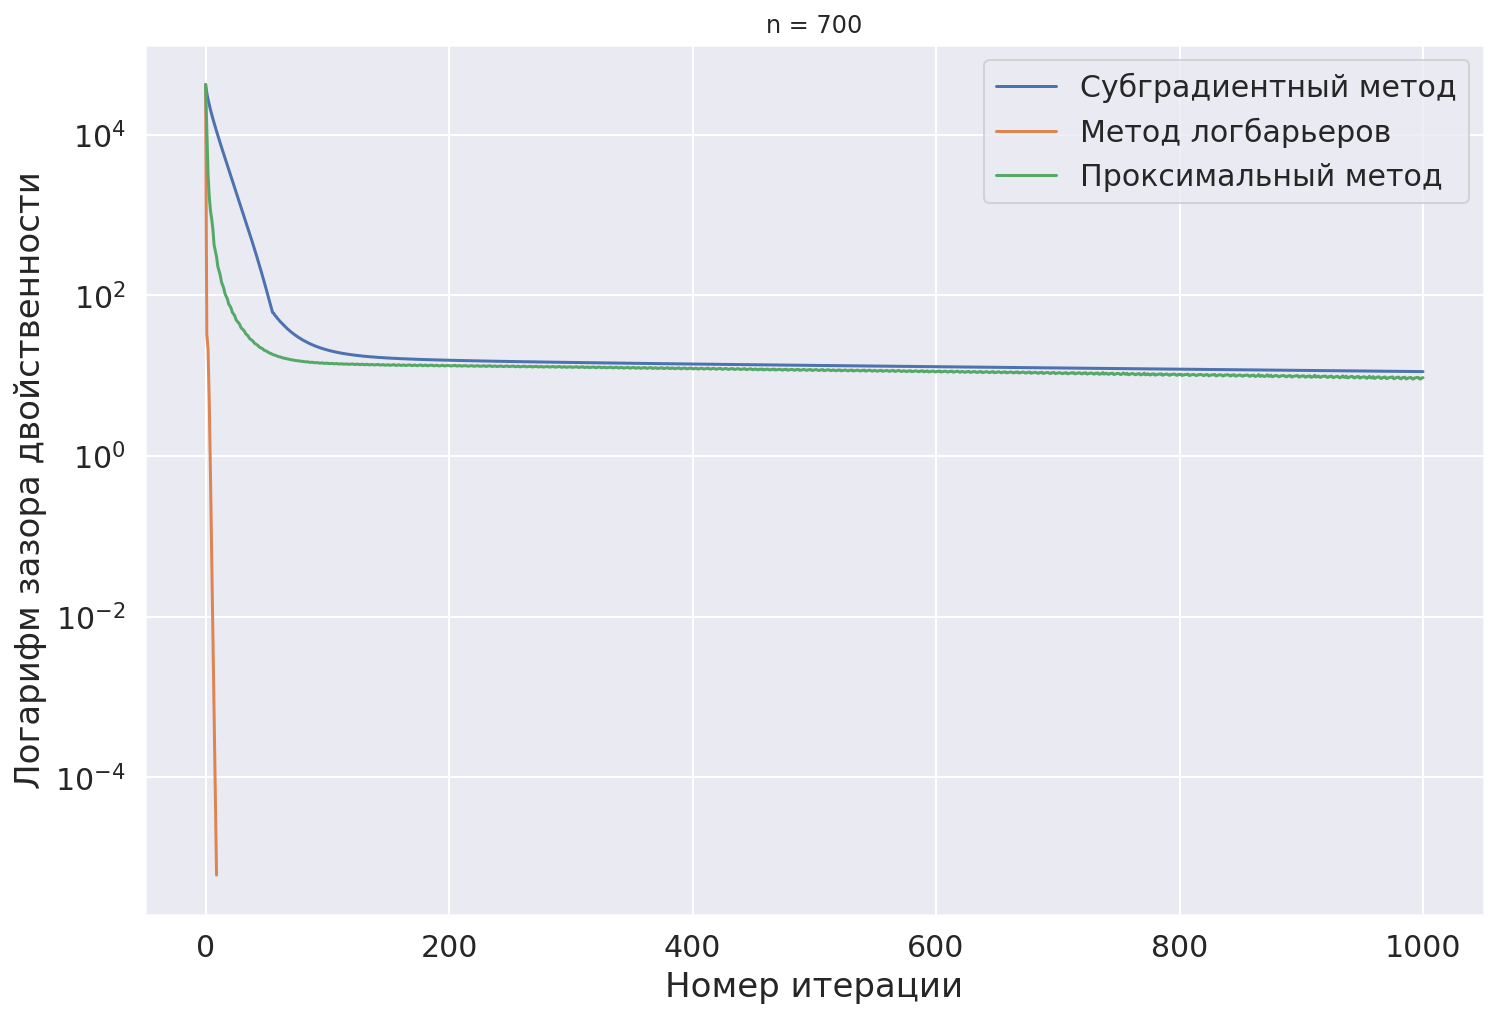

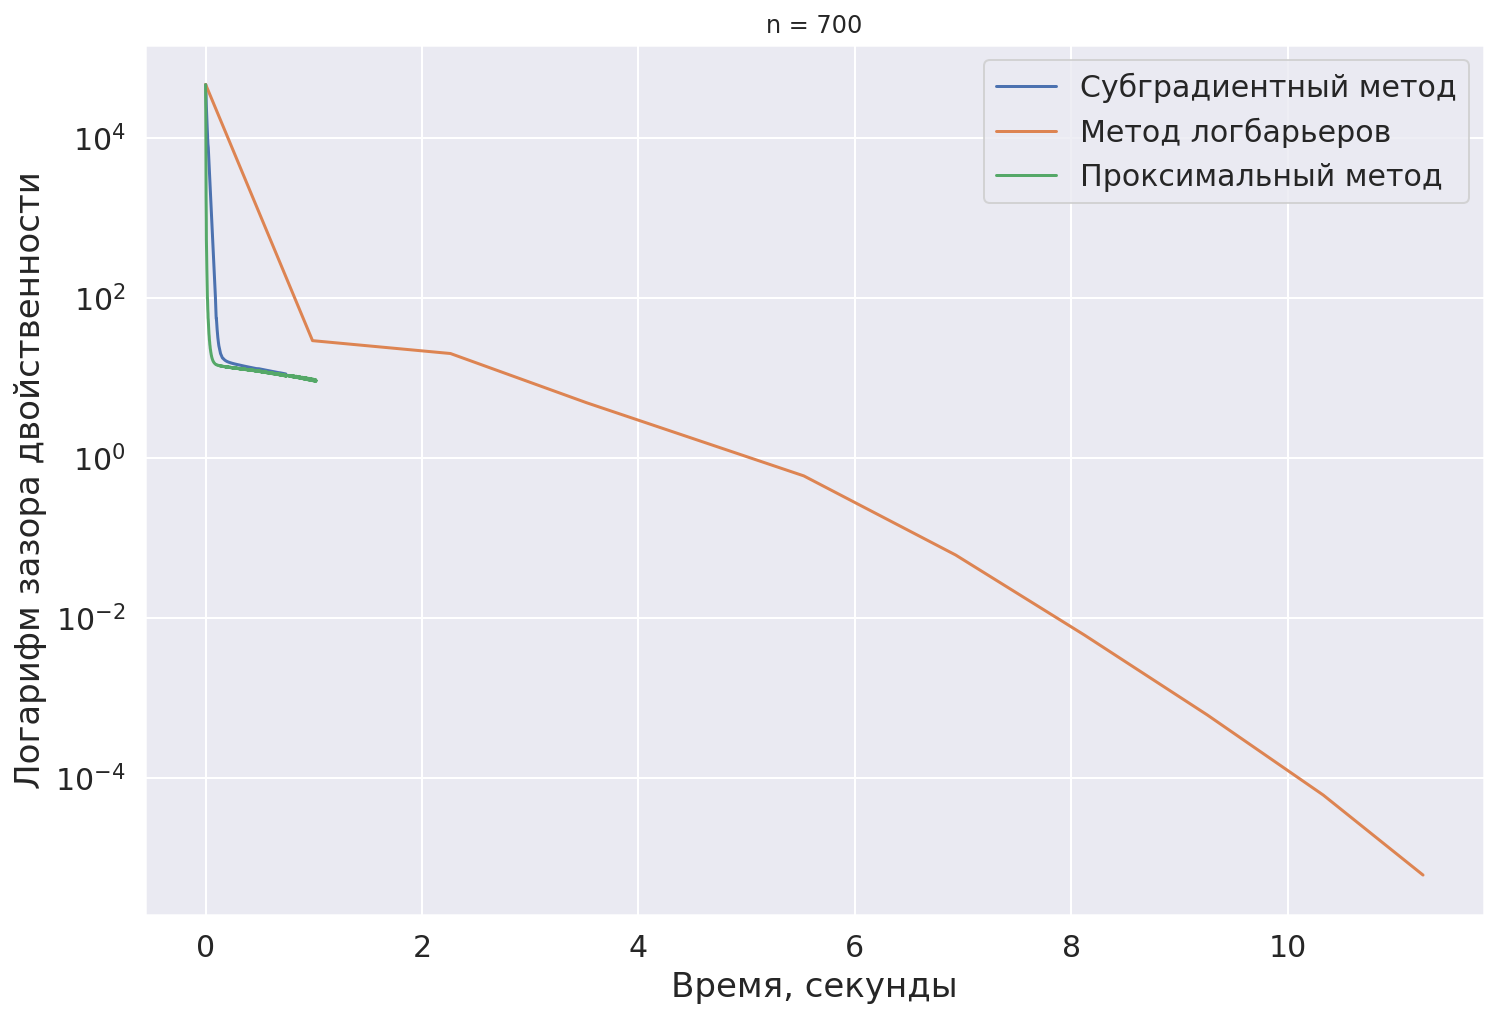

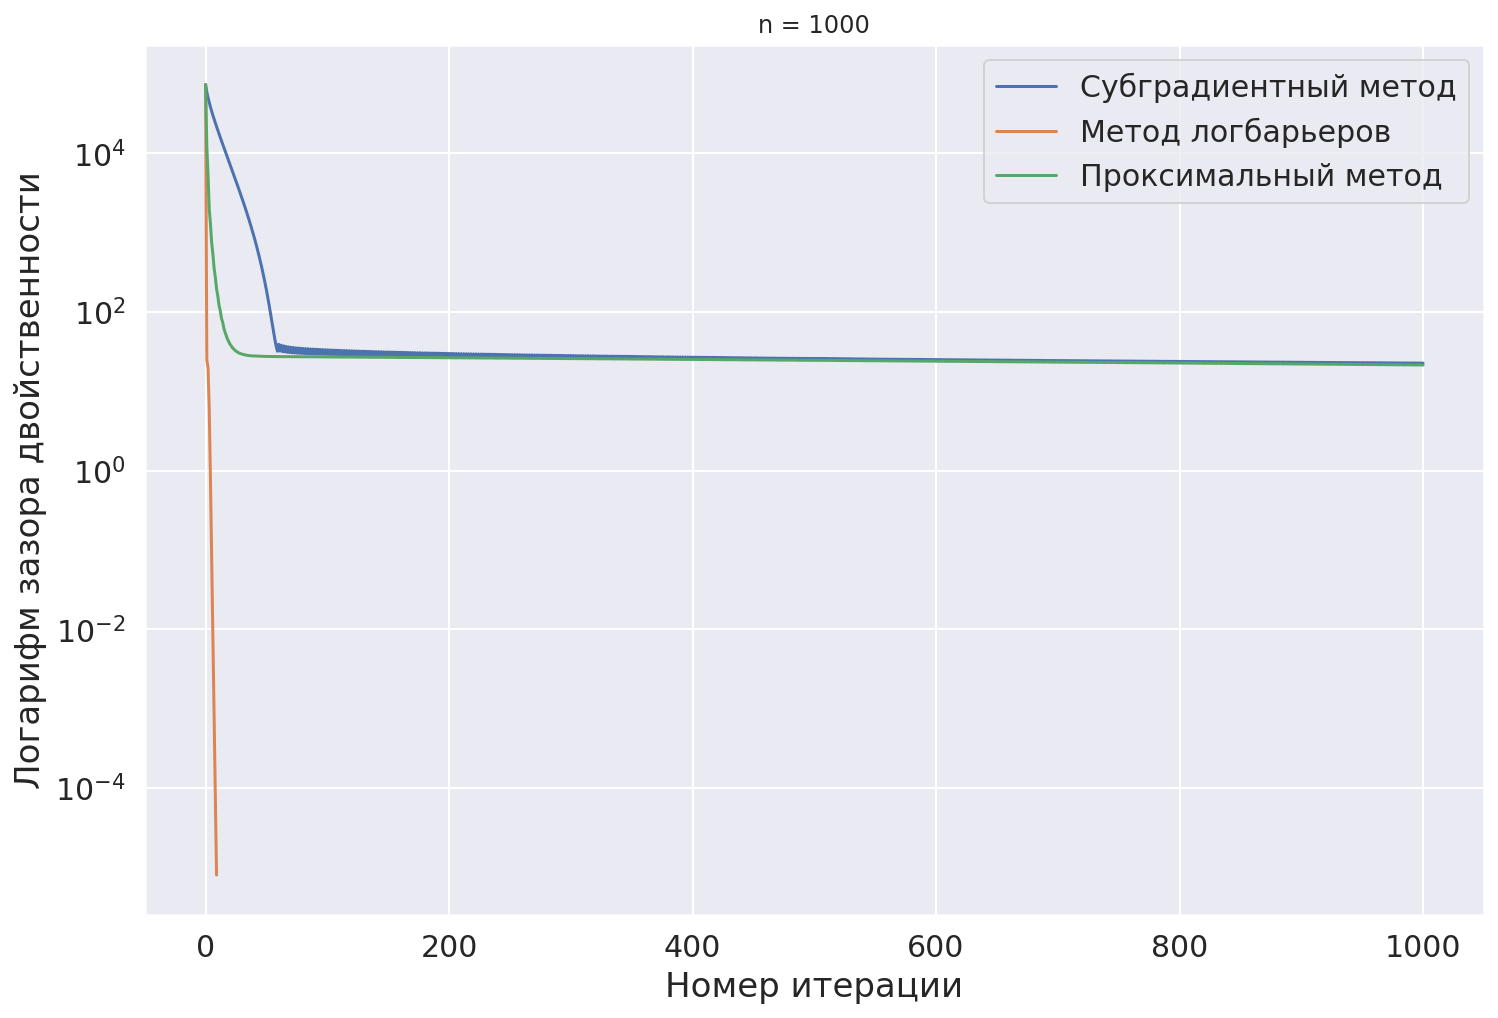

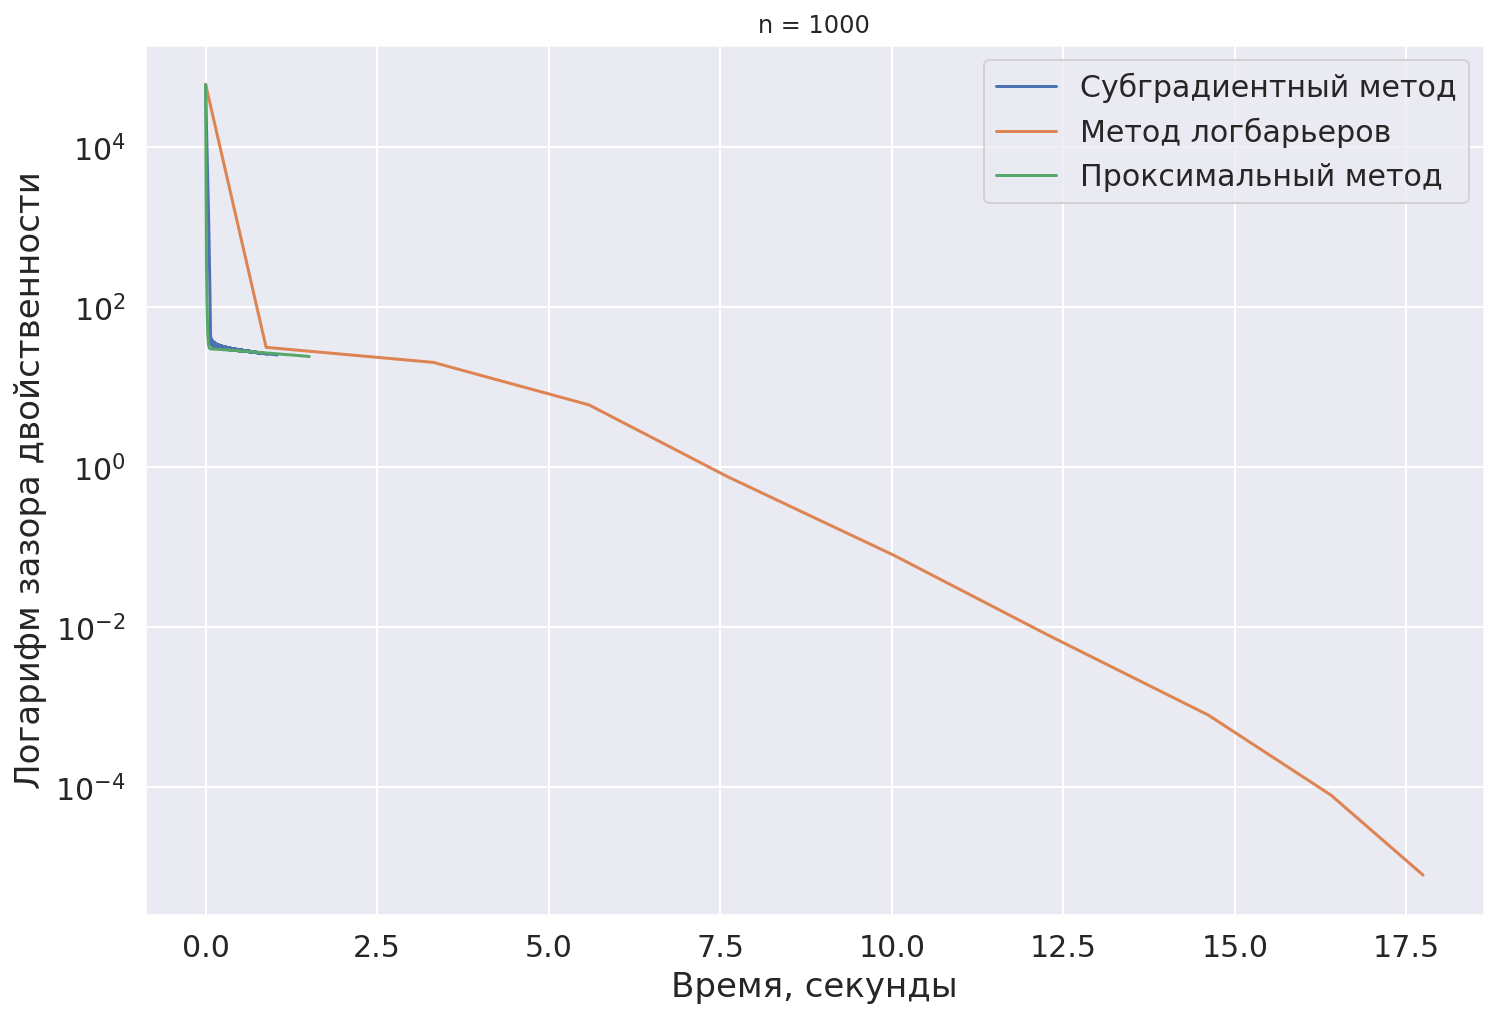

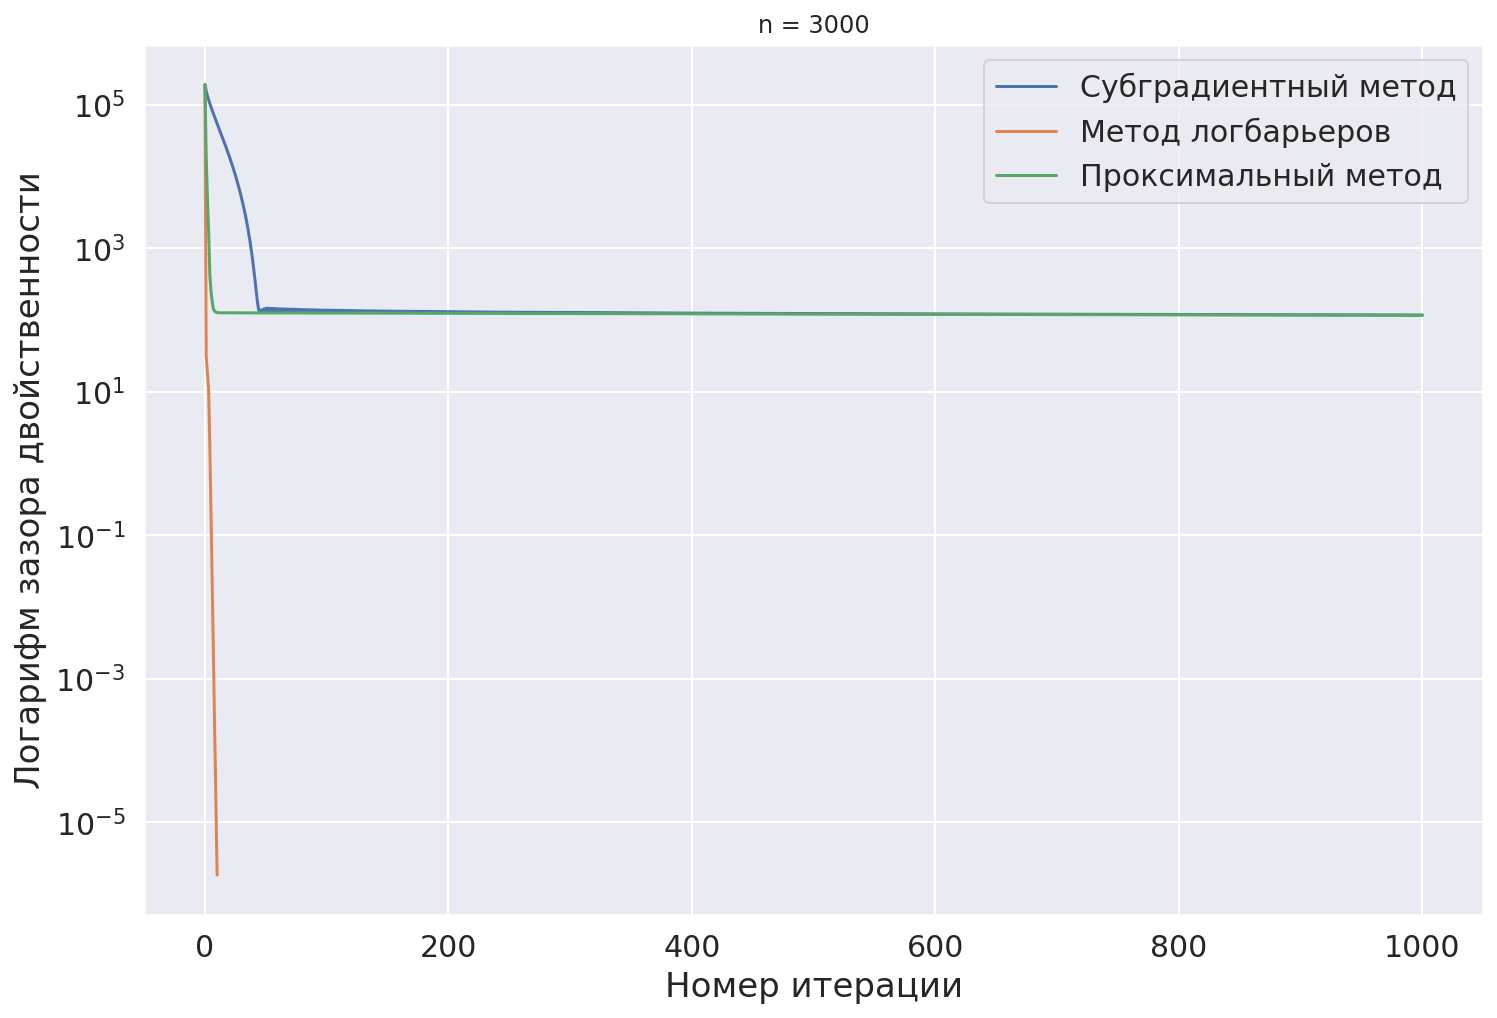

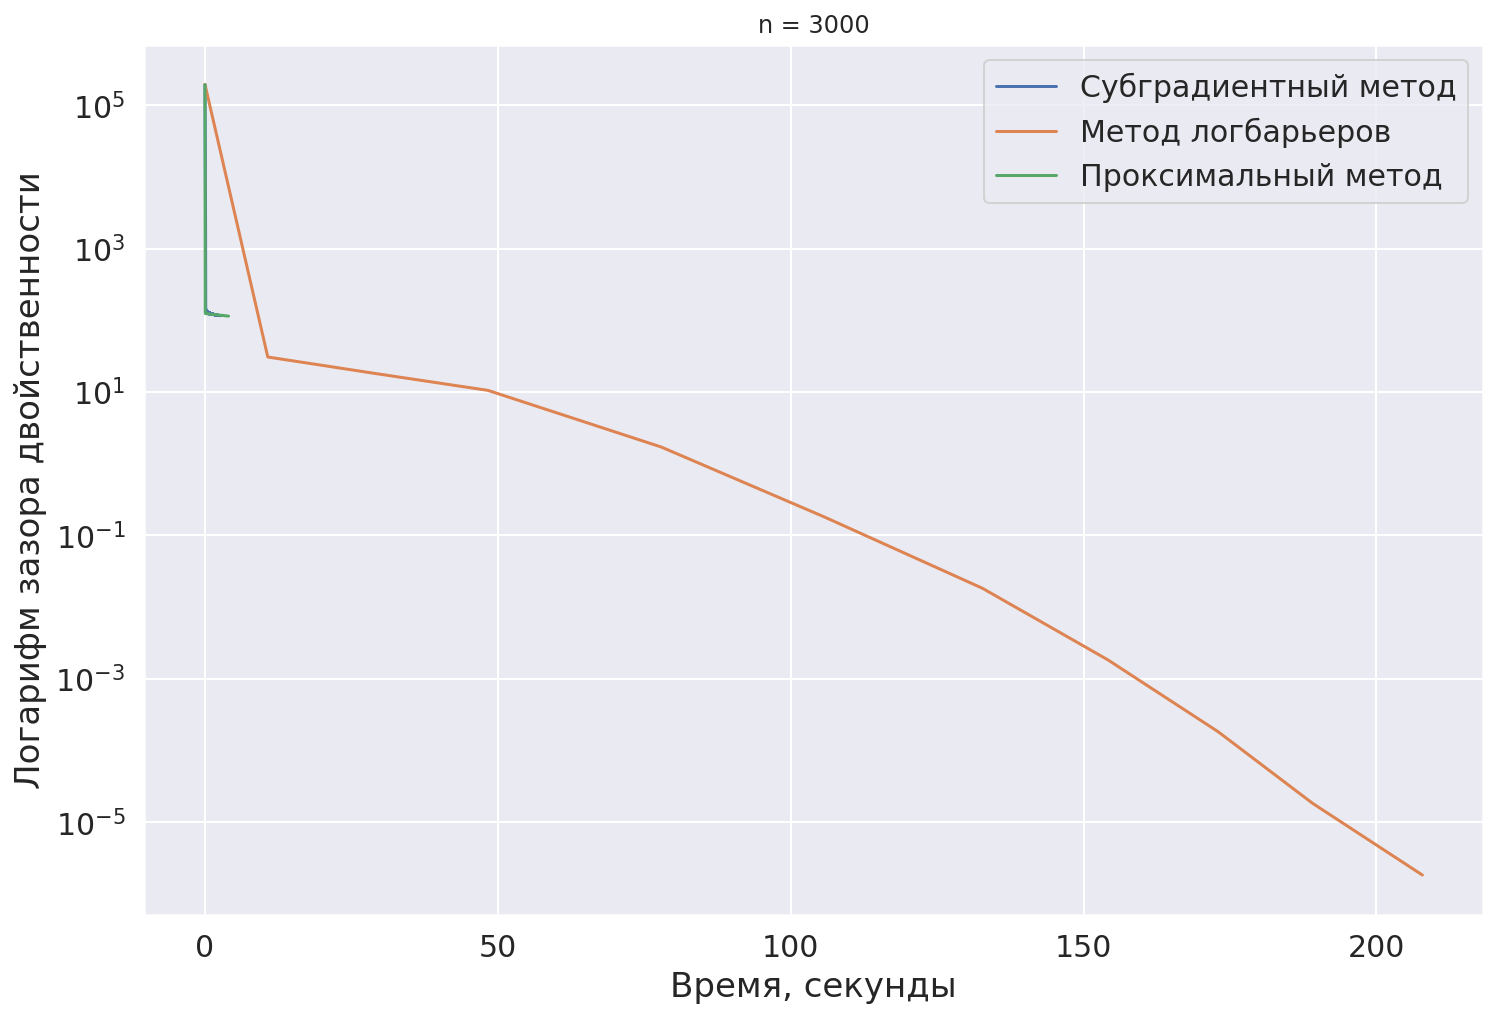

In [ ]:
for i, n in enumerate(n_arr):
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.xlabel('Номер итерации', fontsize=17)
    plt.title("n = " + str(n))
    plt.ylabel('Логарифм зазора двойственности', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid(True)
    plt.yscale('log')
    name = 'n_iters' + str(i)
    histories = methods_histories(m, n)
    for method in histories:
        history = histories[method]
        ax.plot(np.arange(len(history['duality_gap'])), history['duality_gap'], 
                label=str(method))
    ax.legend(fontsize=15)
    plt.savefig(name + '.pdf', bbox_inches="tight", dpi=150)

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.xlabel('Время, секунды', fontsize=17)
    plt.ylabel('Логарифм зазора двойственности', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid(True)
    plt.title('n = ' + str(n))
    plt.yscale('log')
    name = "n_time" + str(n) + '.pdf'
    histories = methods_histories(m, n)
    for method in histories:
        history = histories[method]
        ax.plot(history["time"], history['duality_gap'], label=str(method))
    ax.legend(fontsize=15)
    plt.savefig(name, bbox_inches="tight", dpi=150)
    plt.show()

2. Рассмотрим теперь графики при изменении размера выборки $m$.


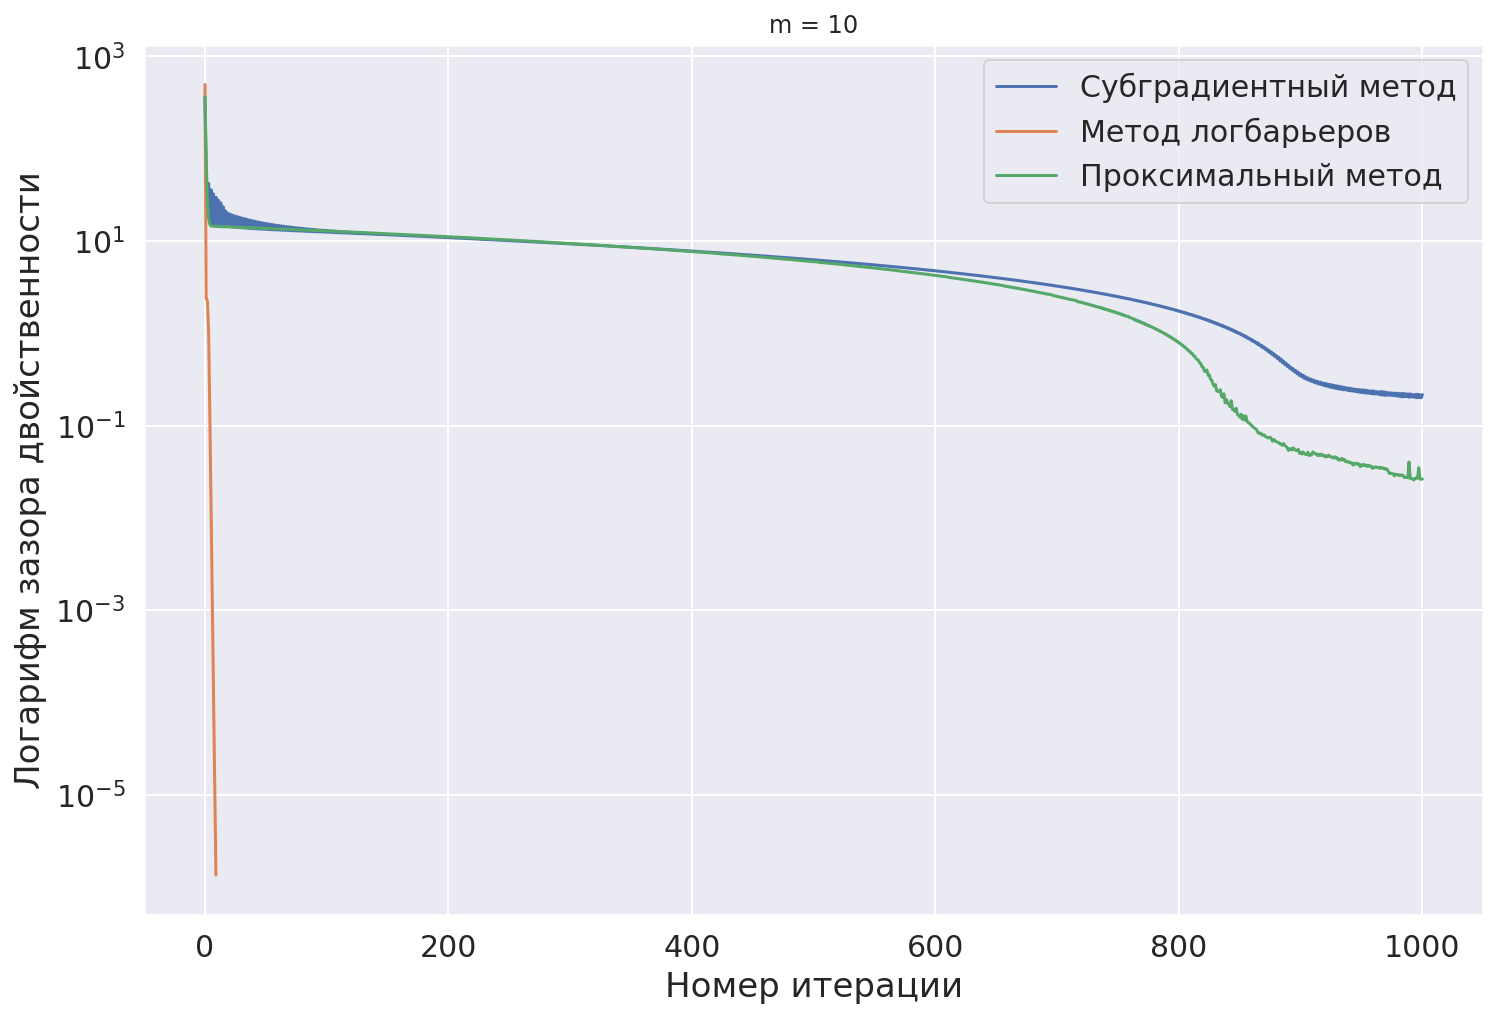

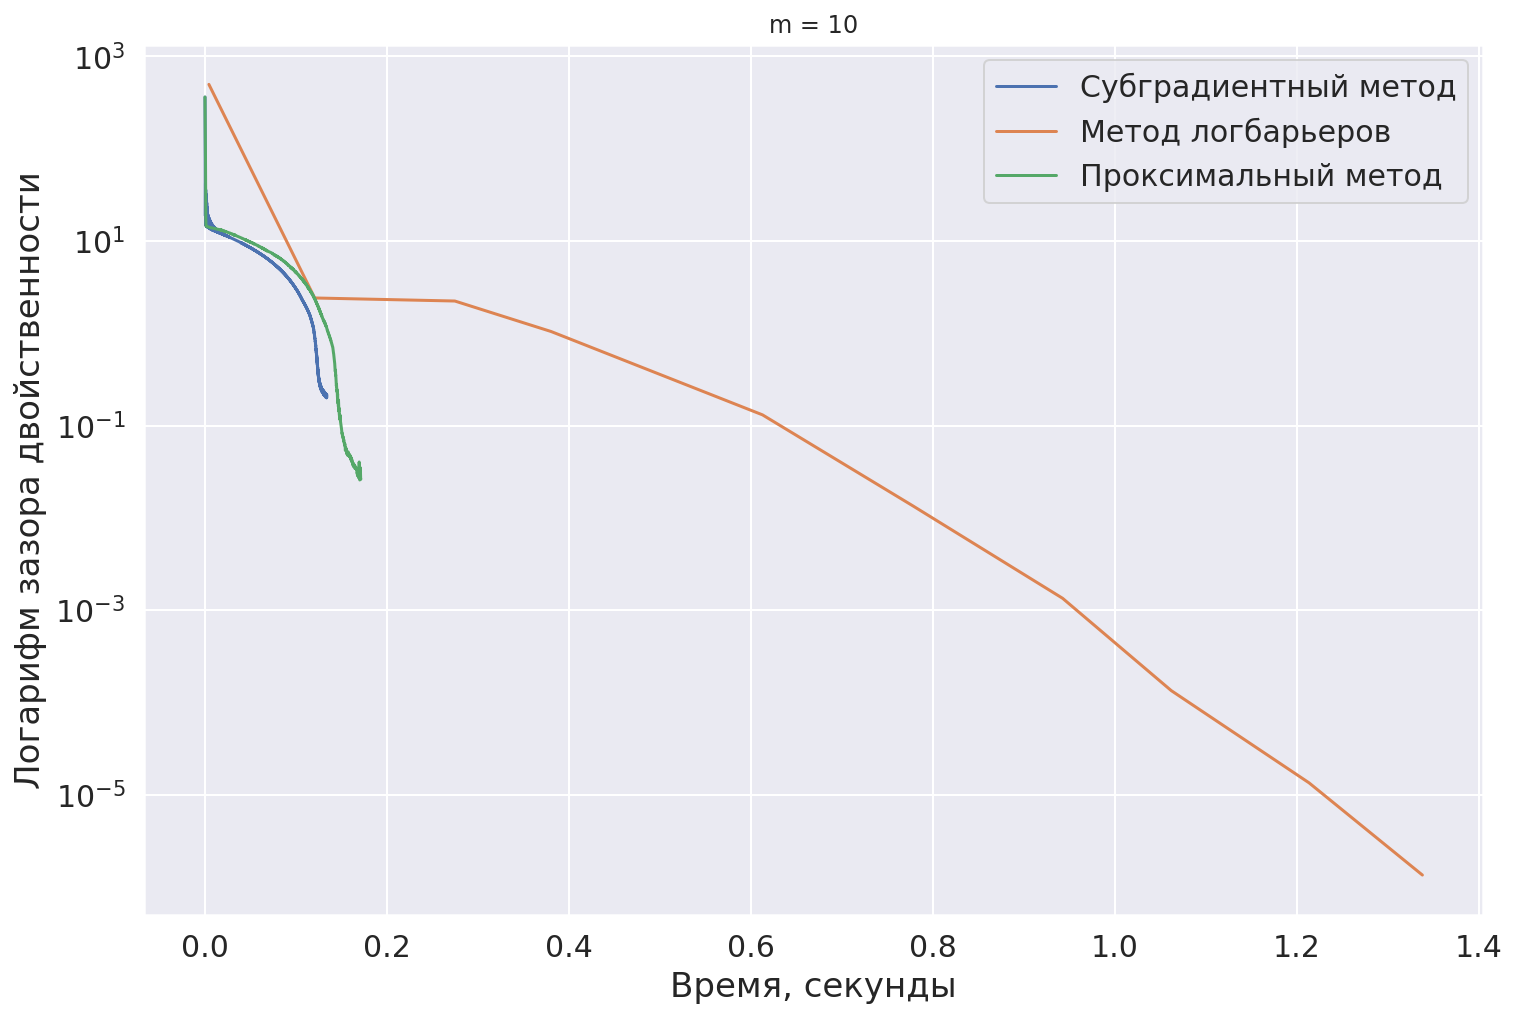

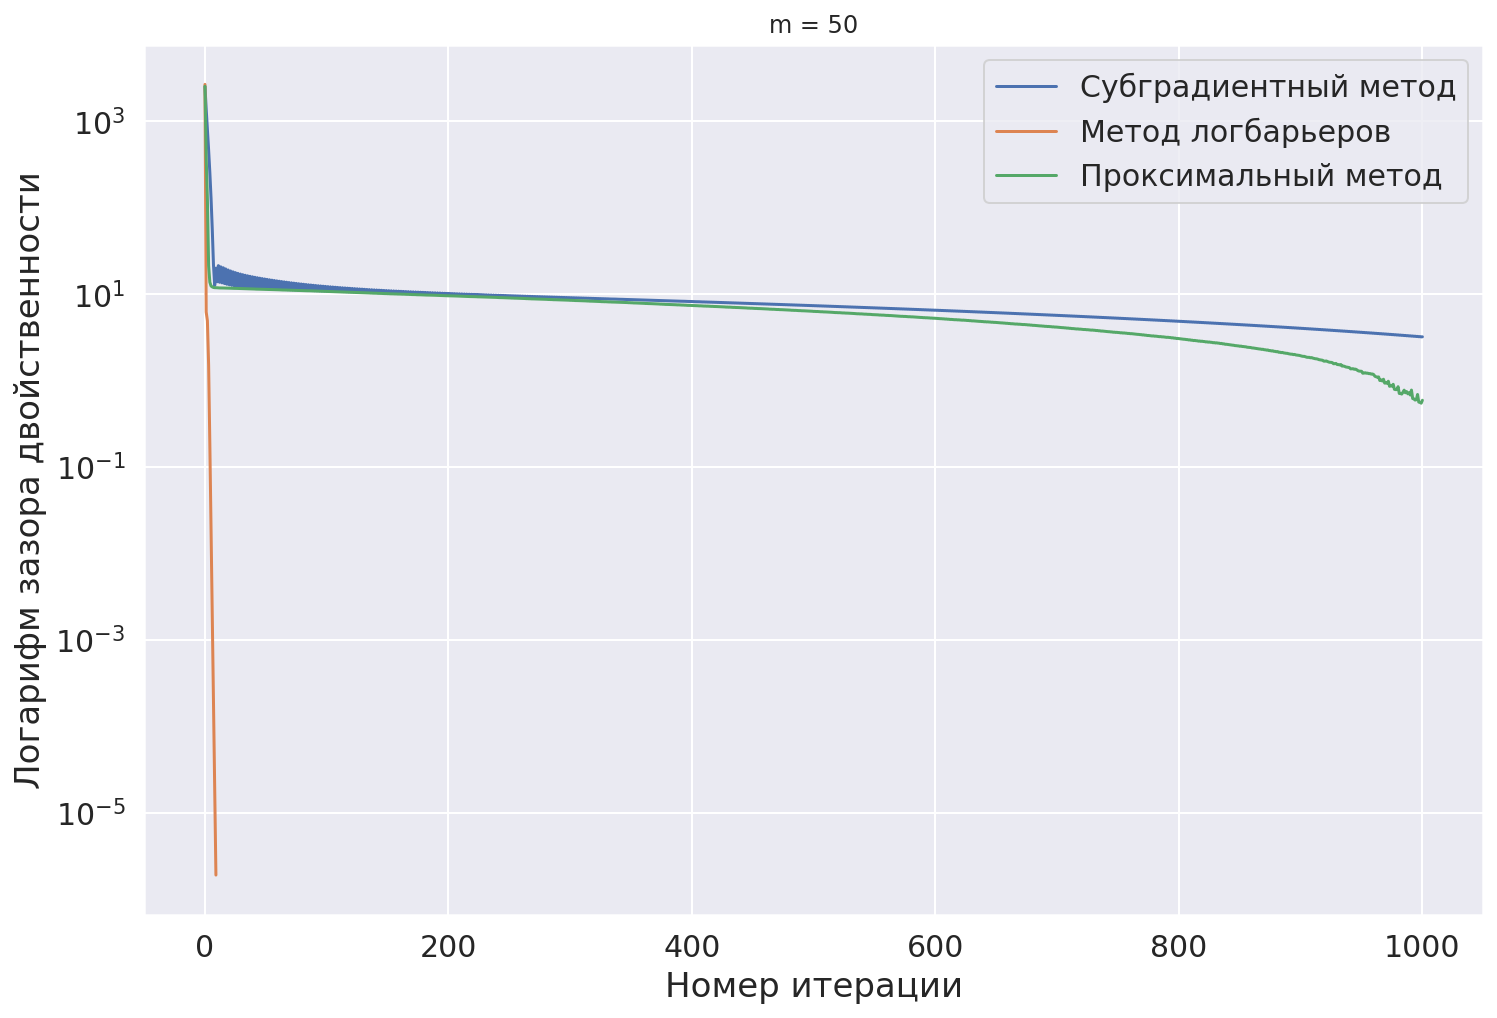

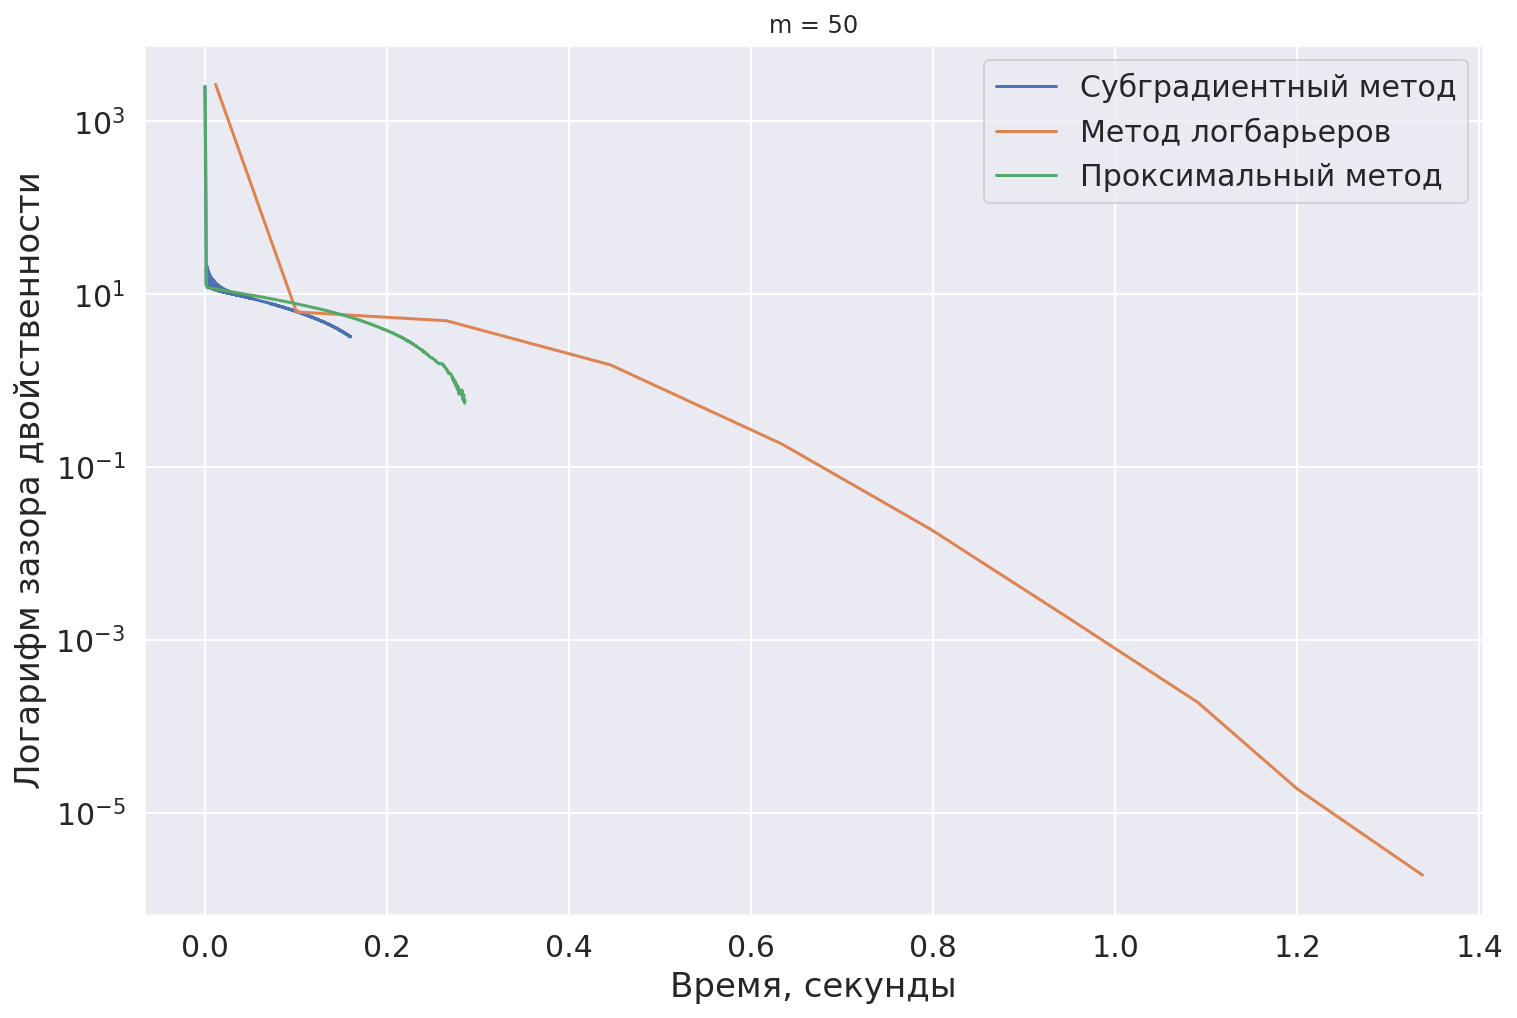

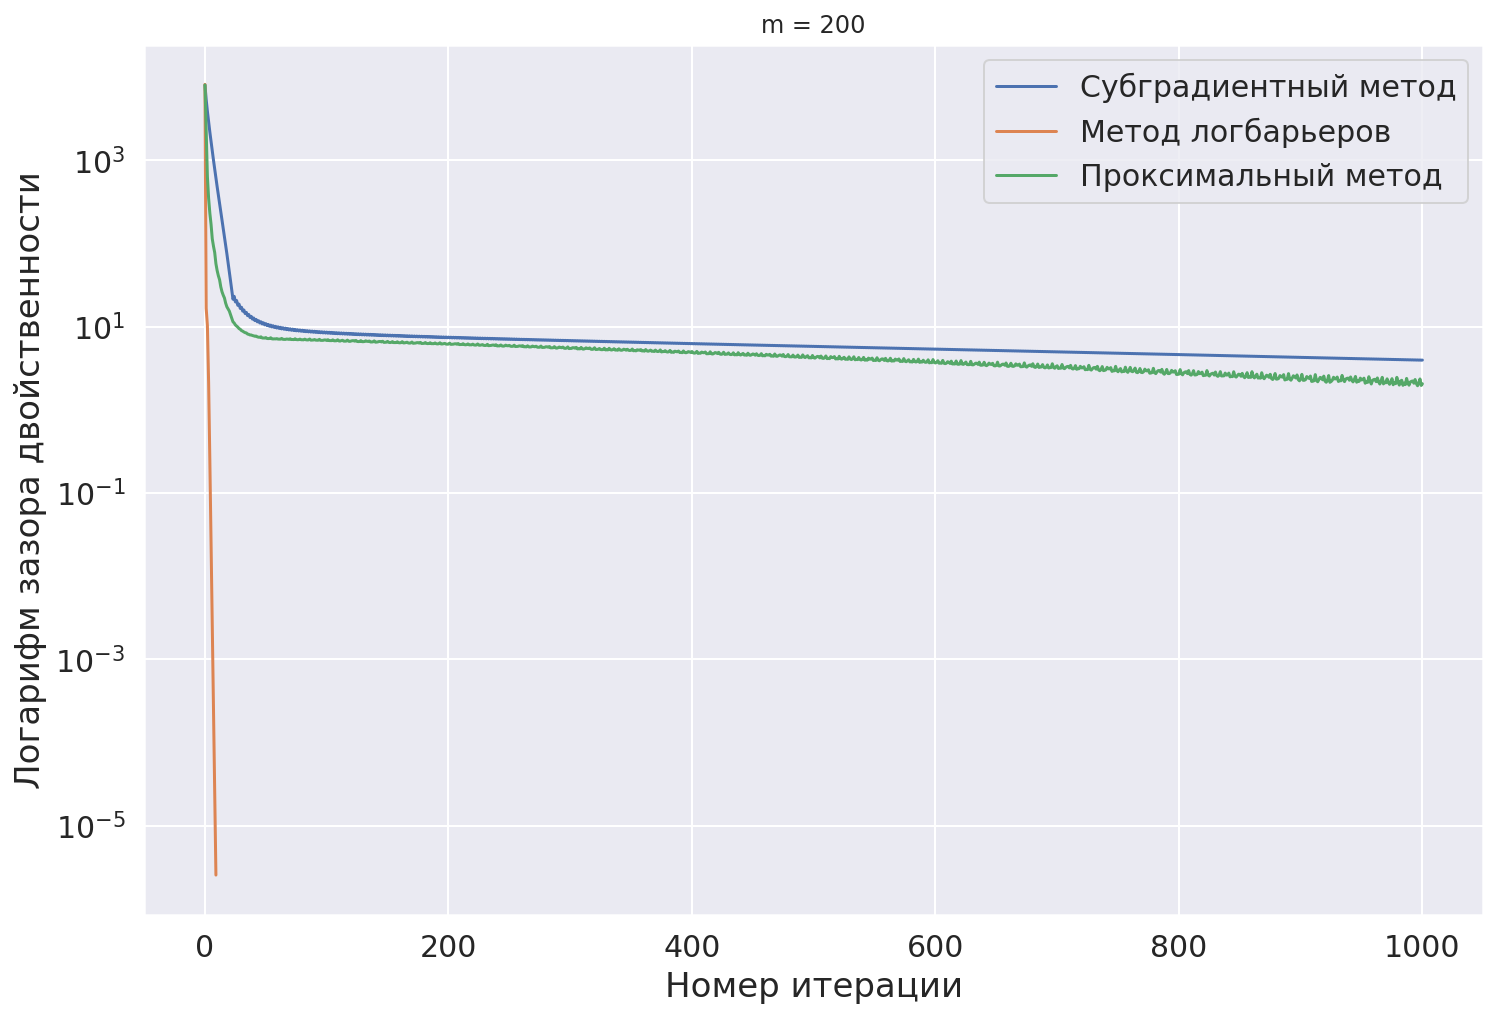

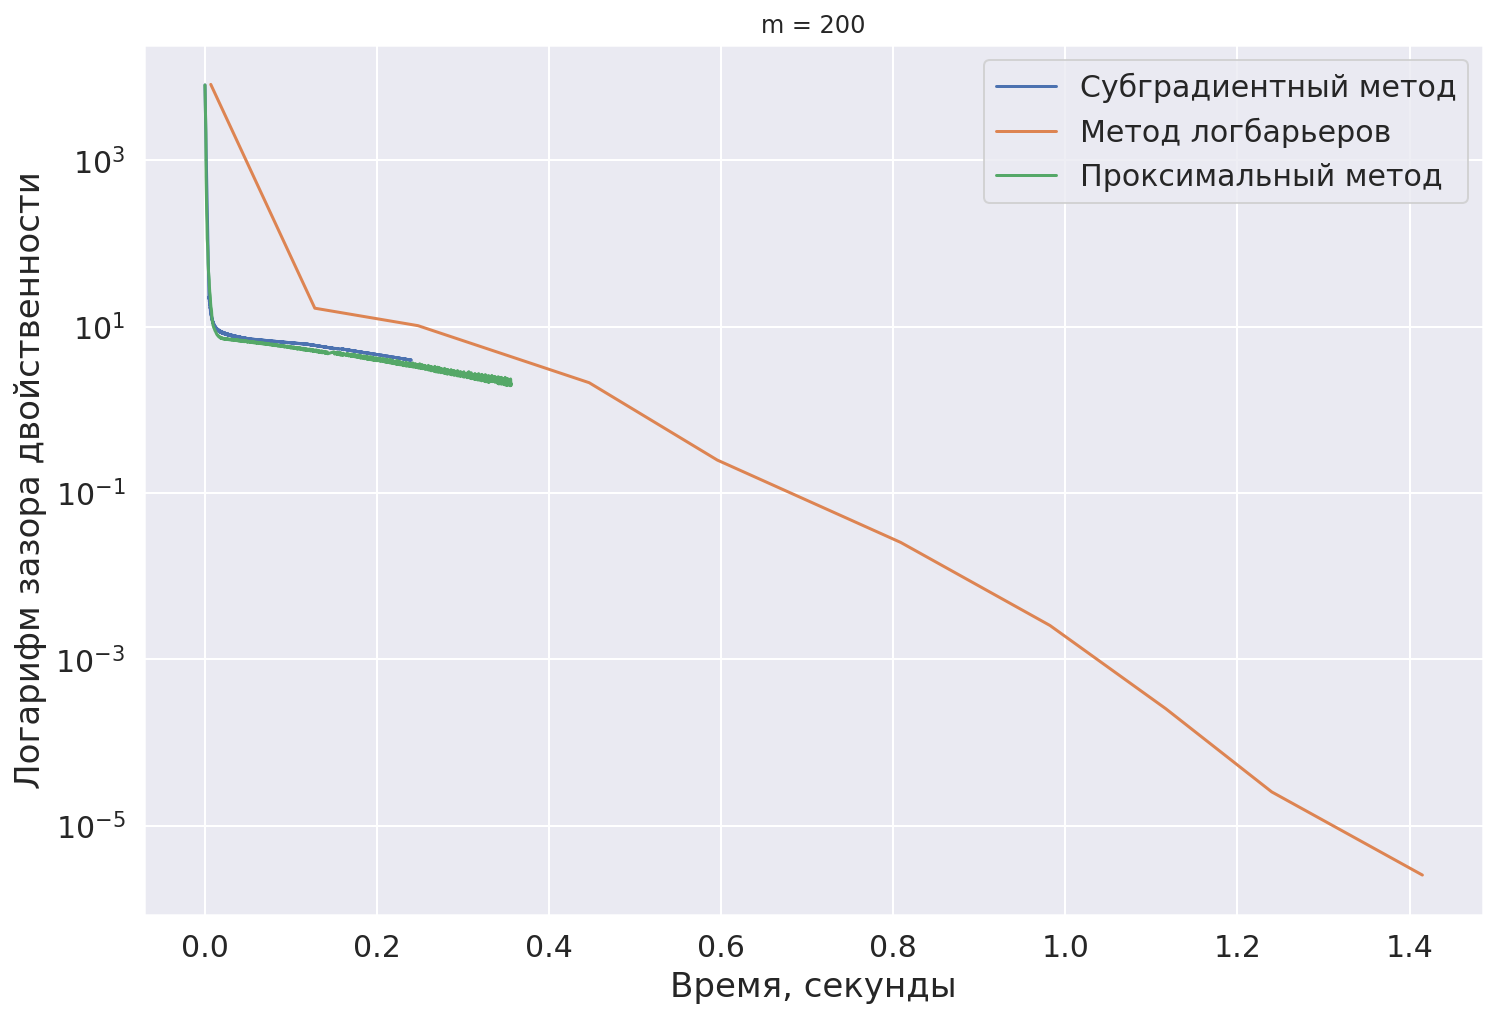

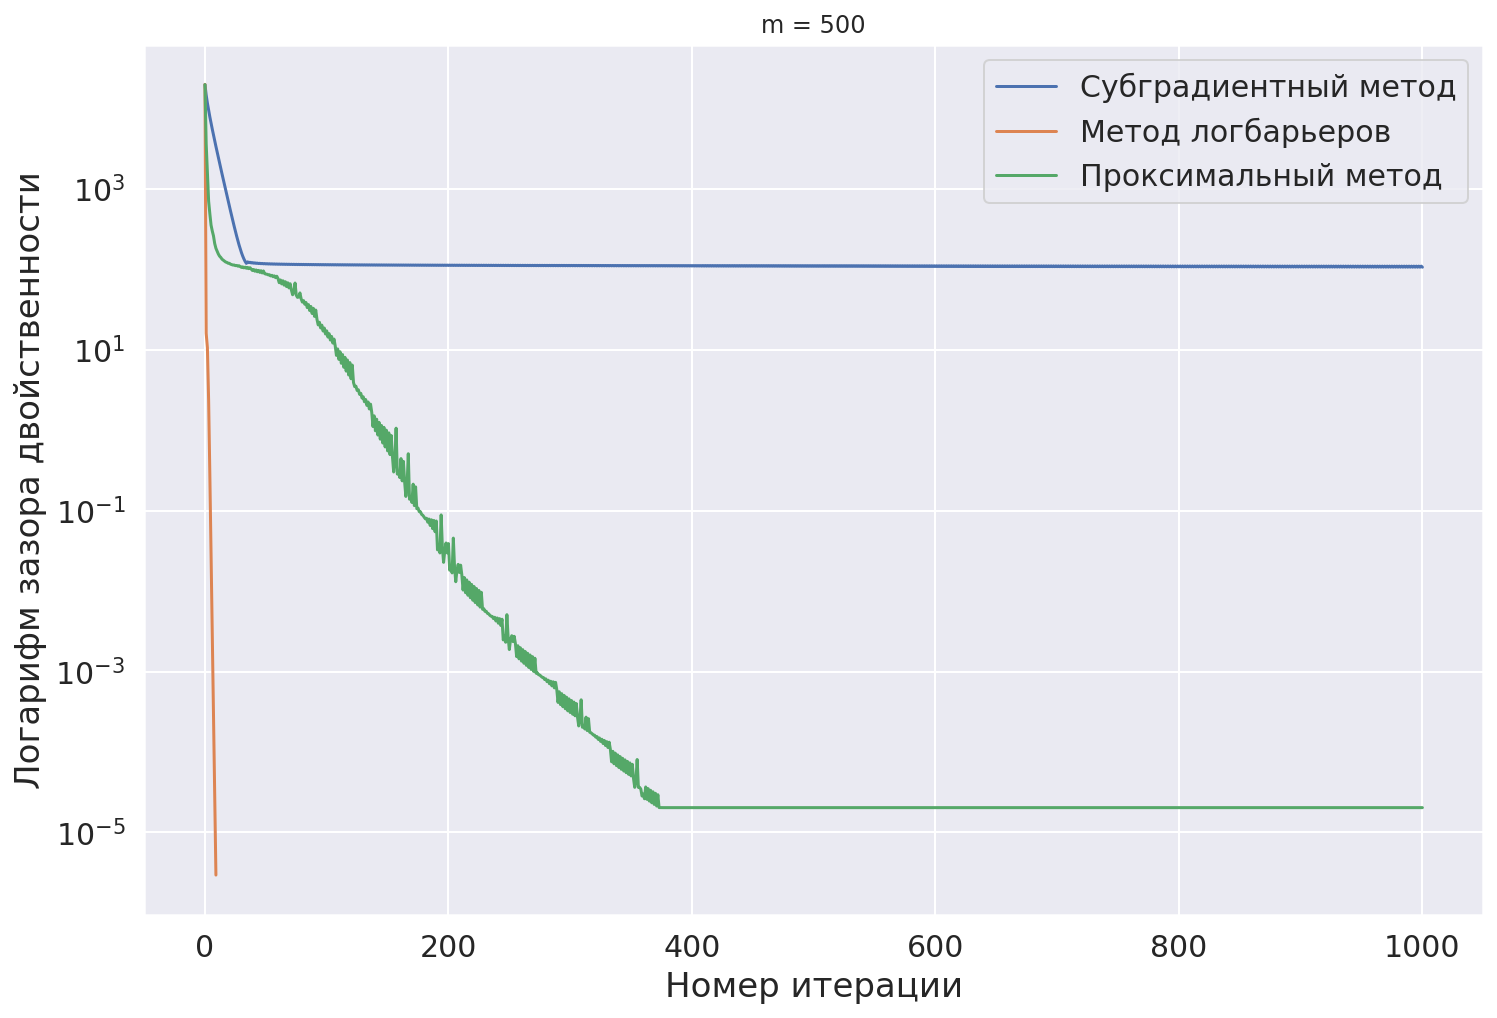

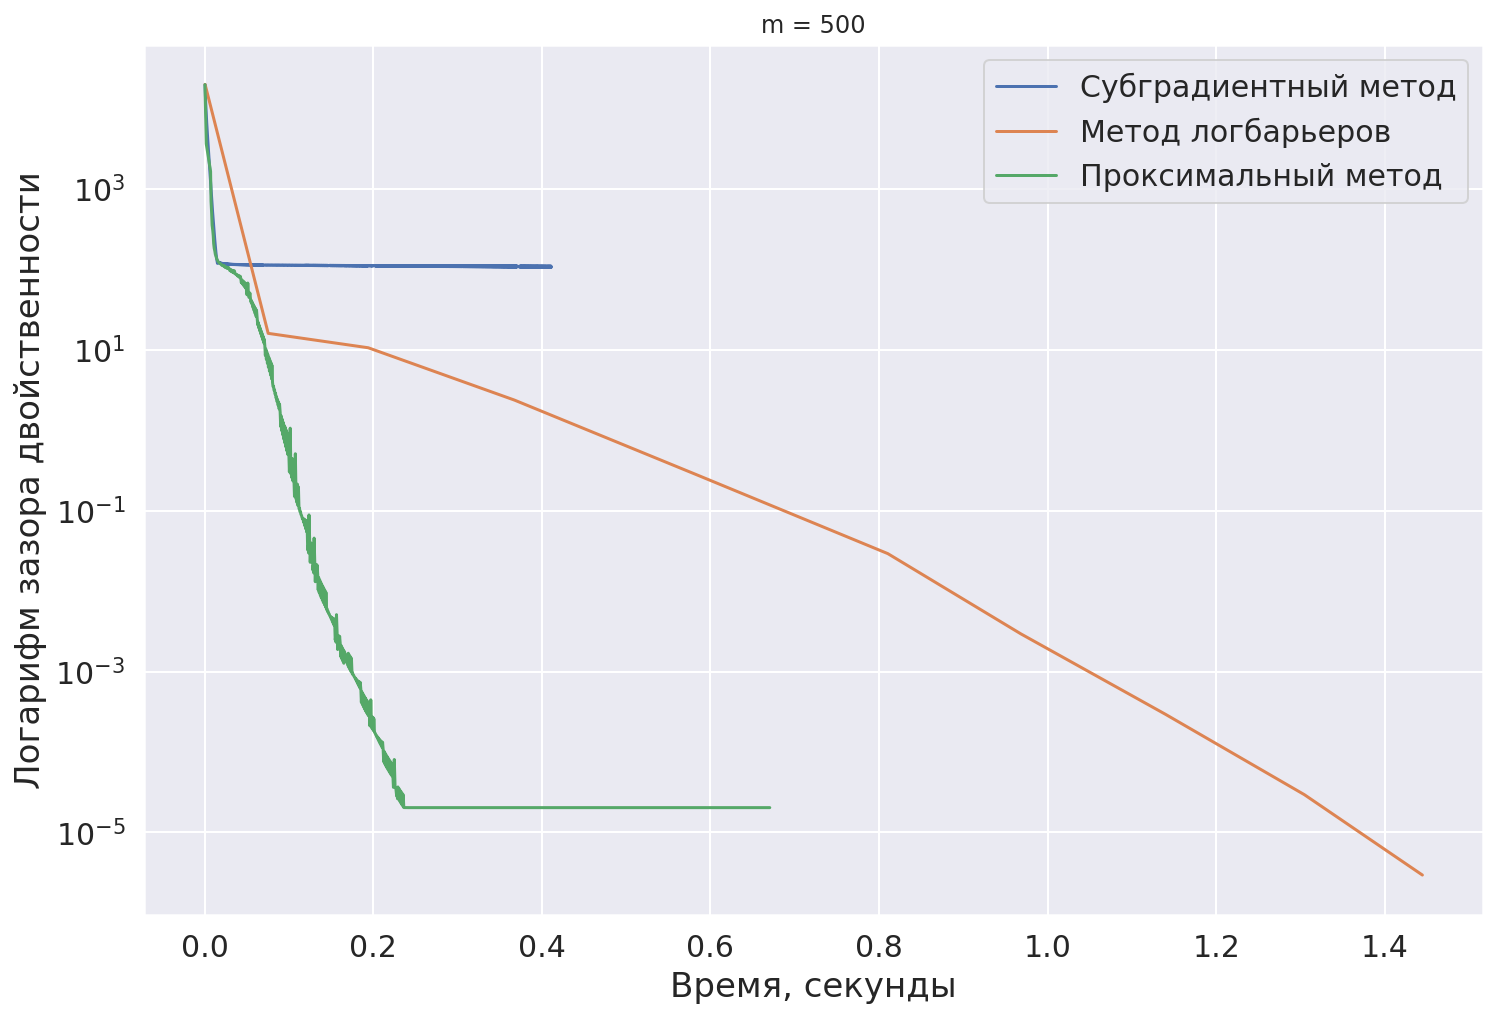

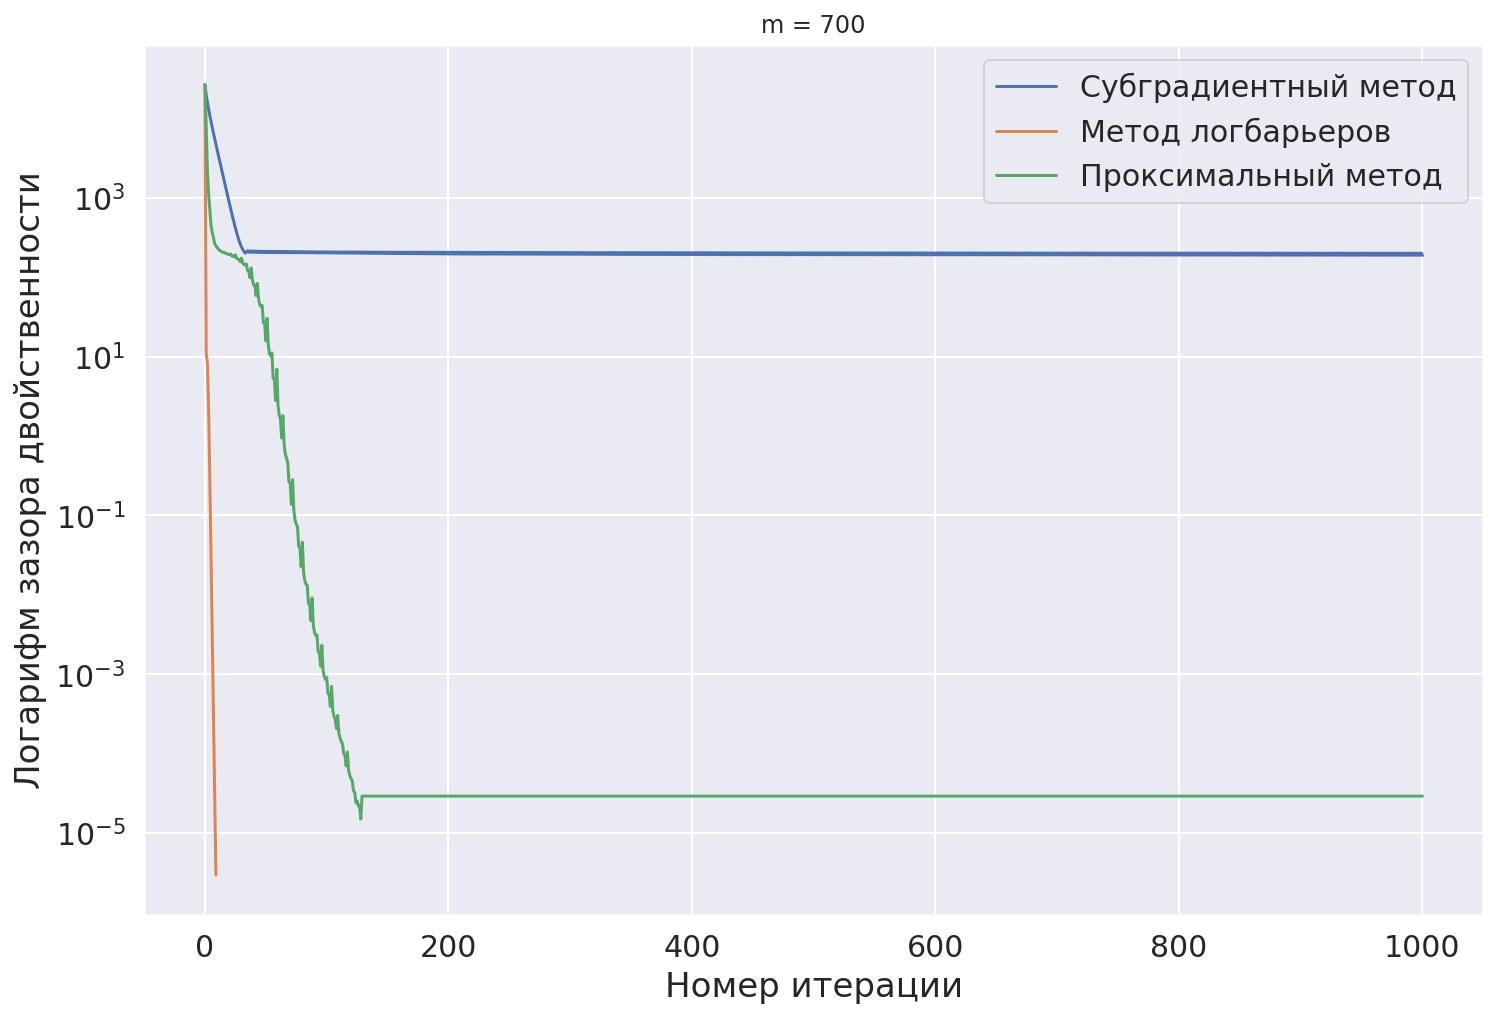

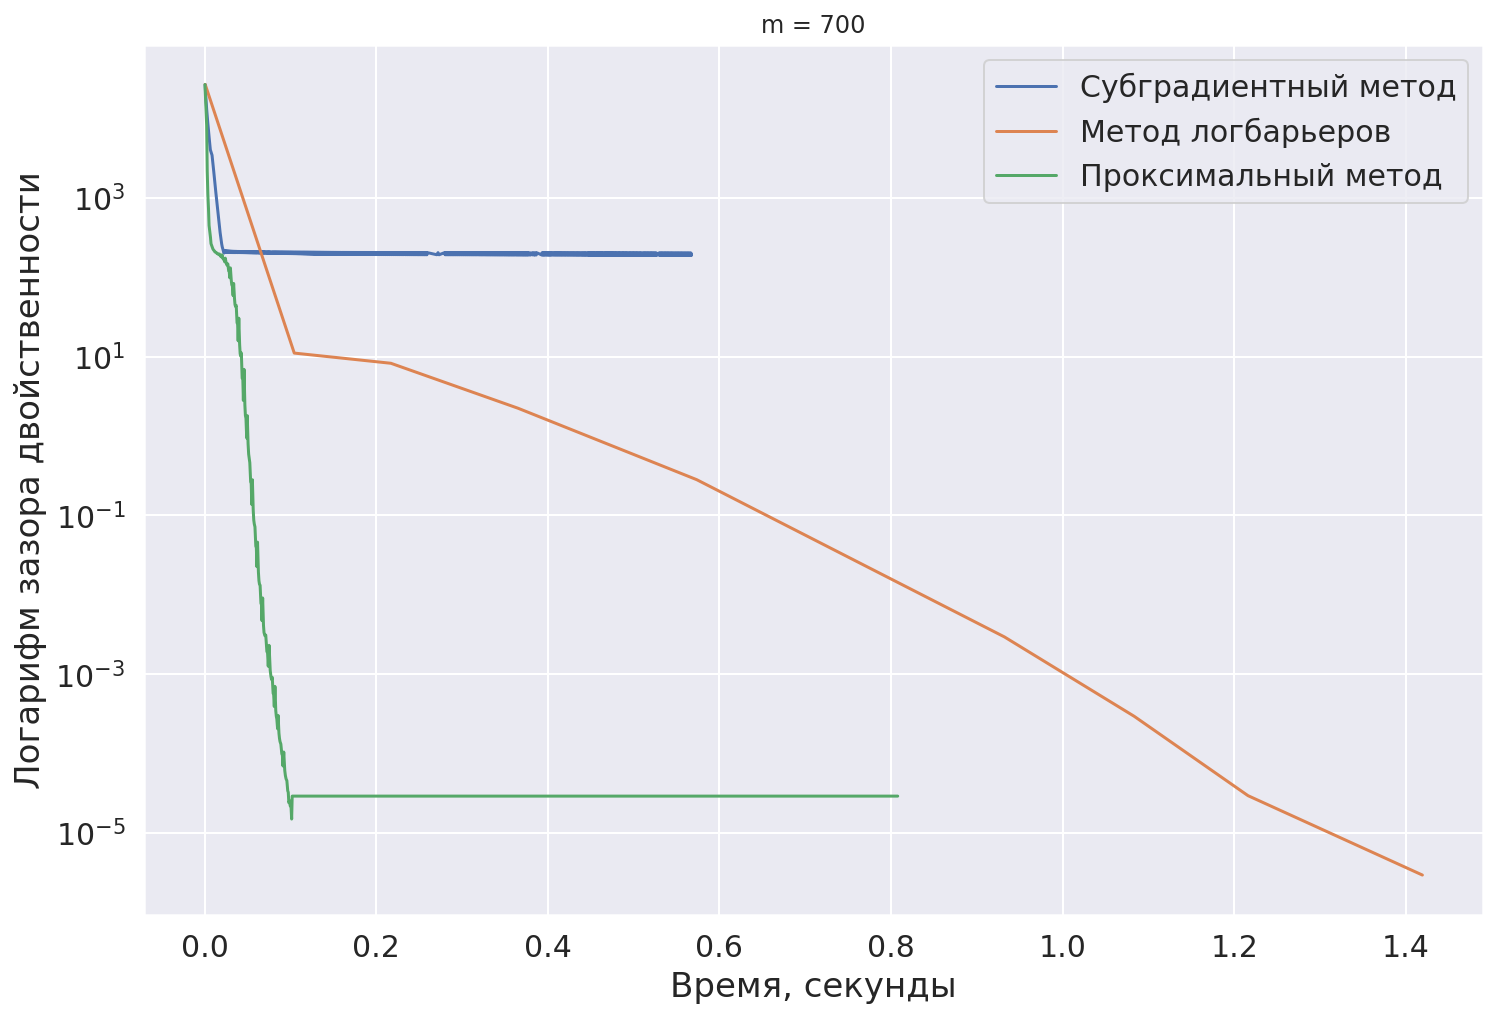

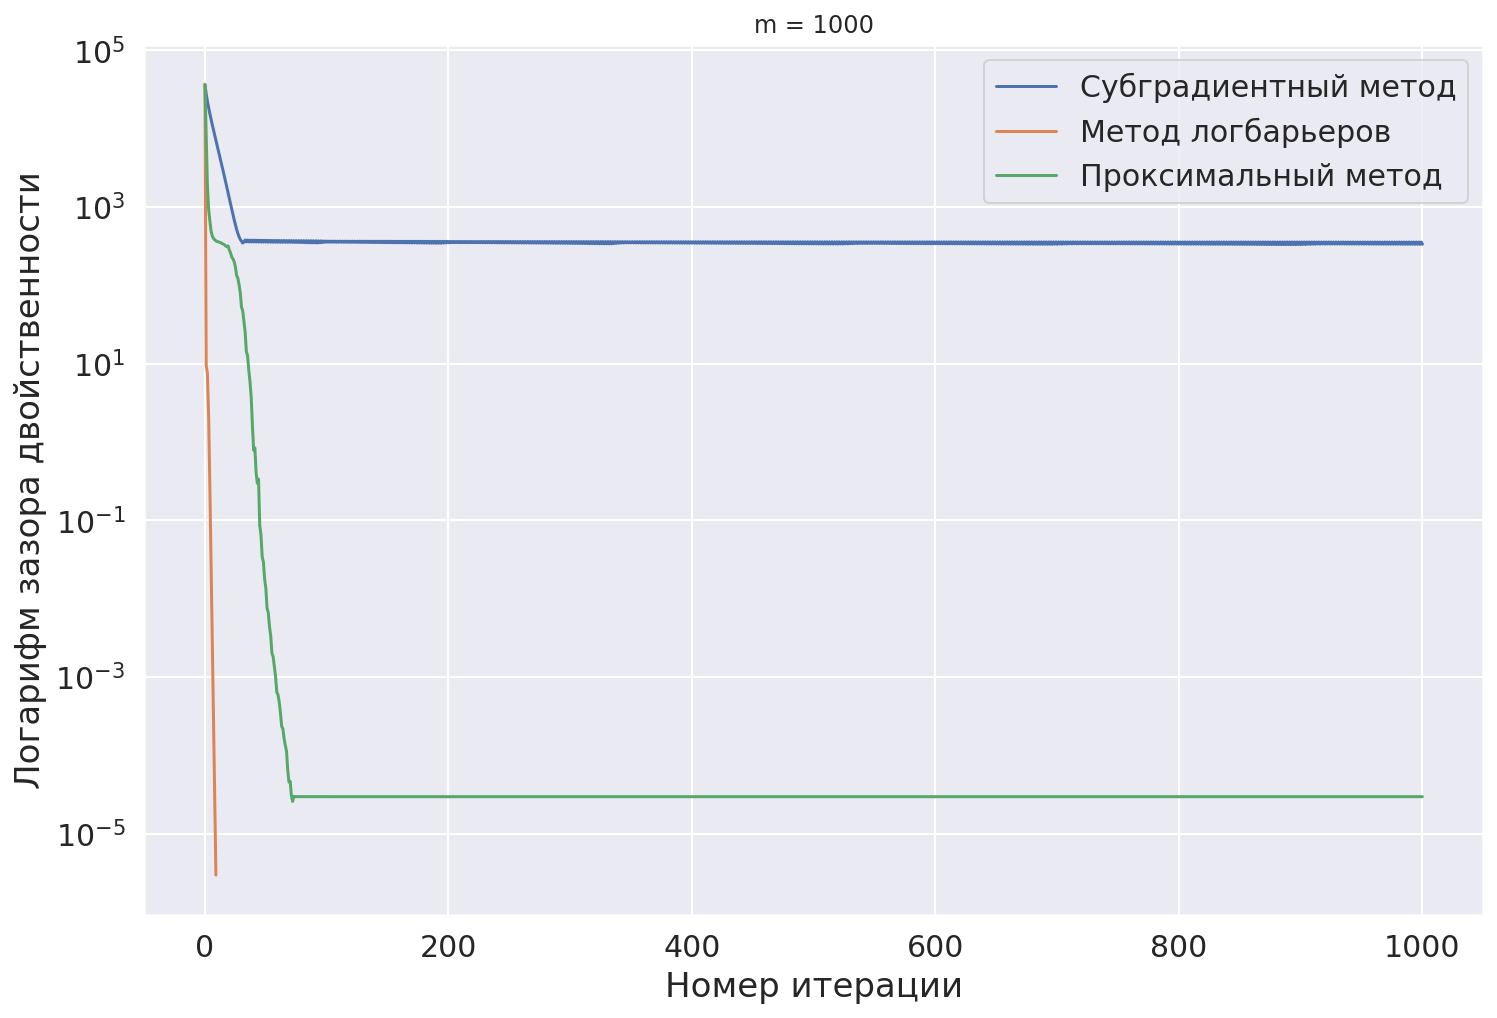

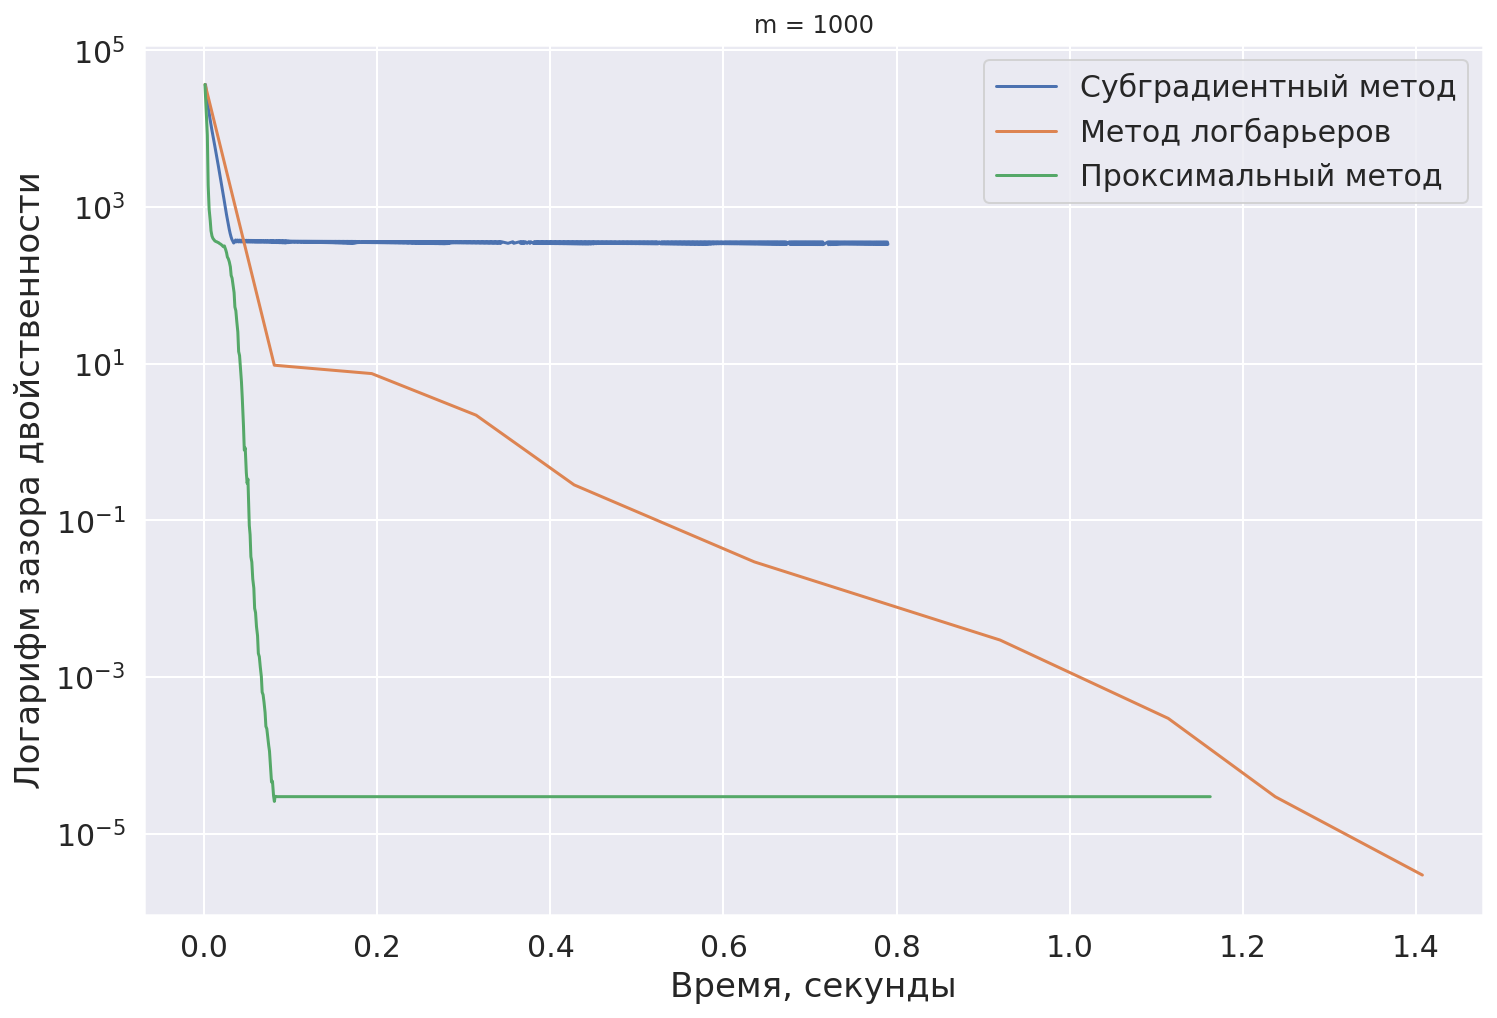

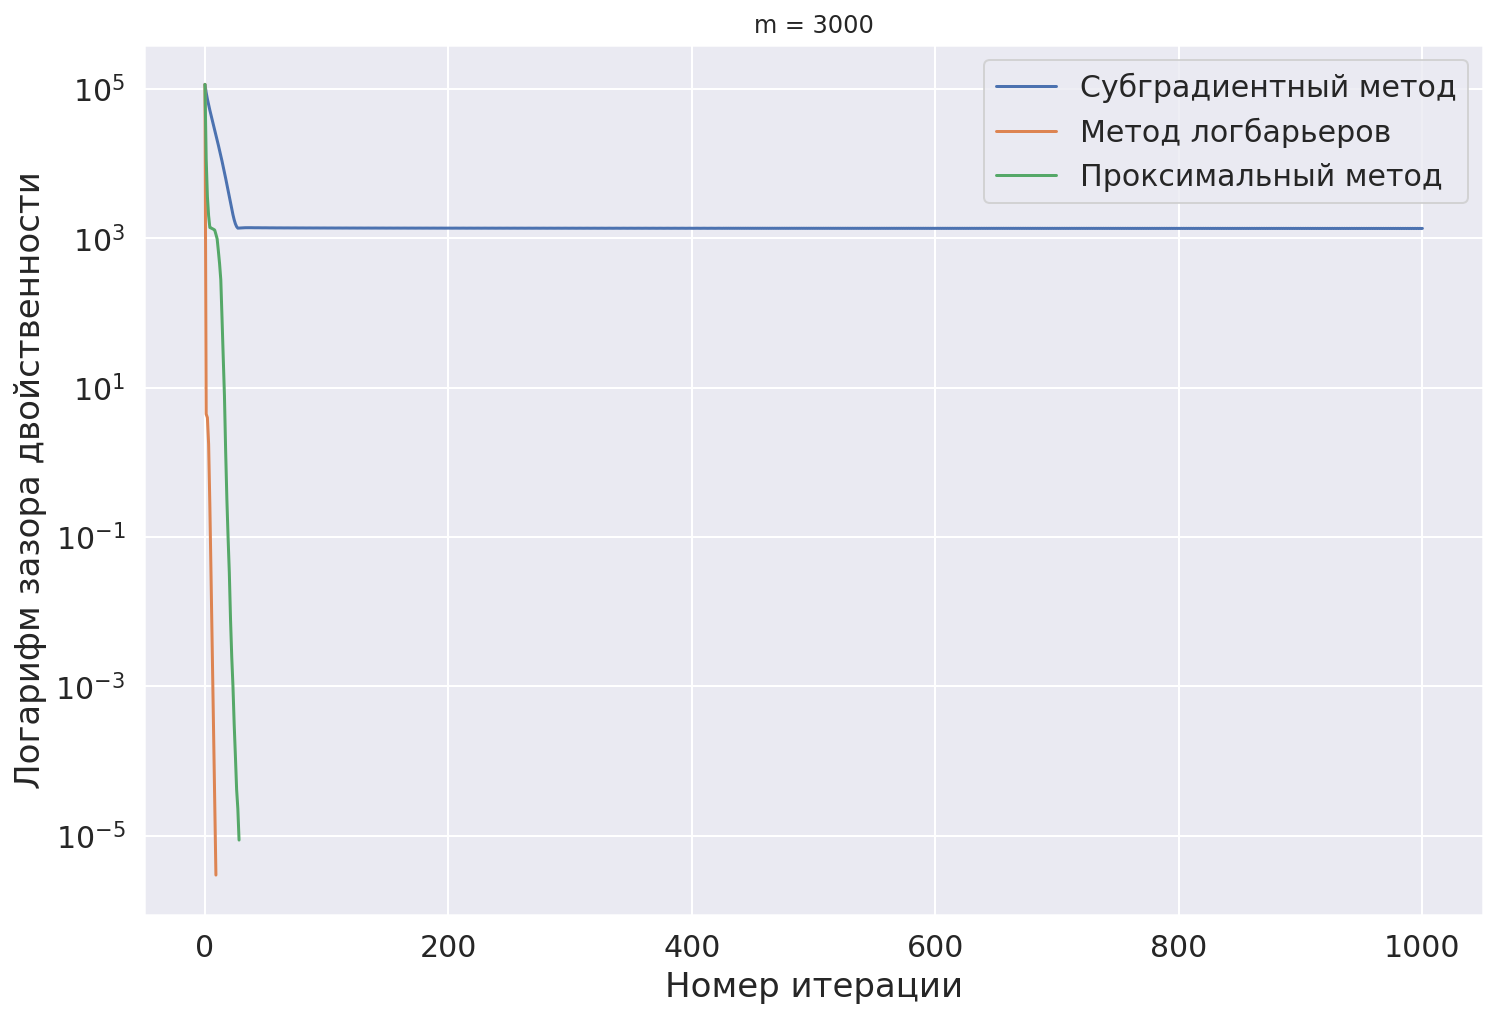

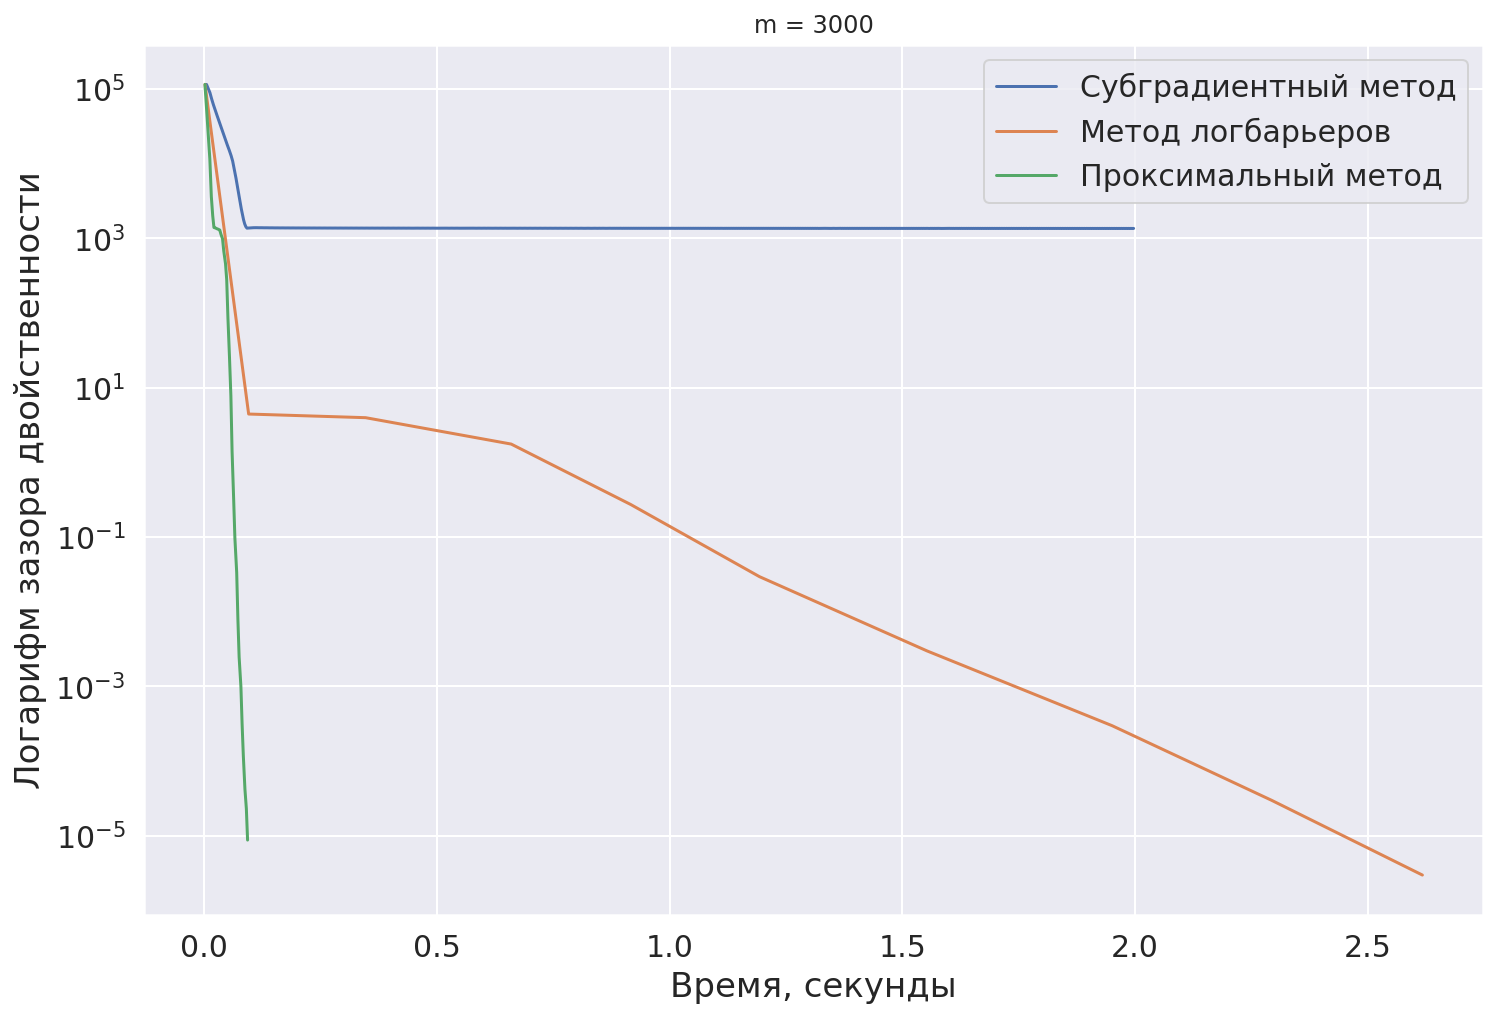

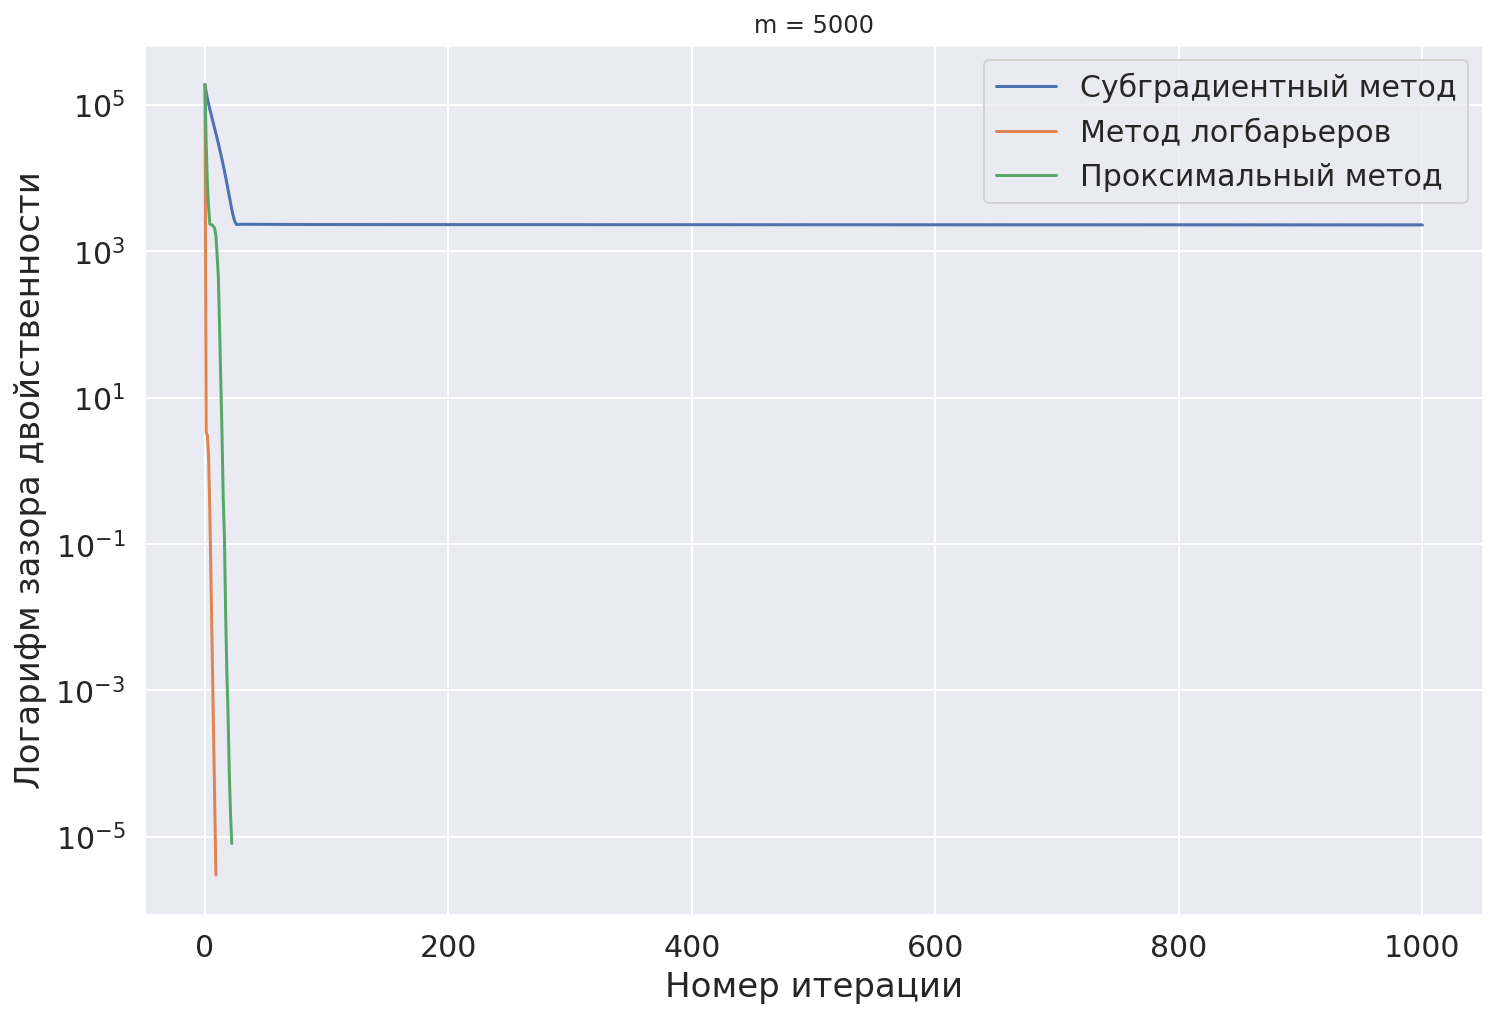

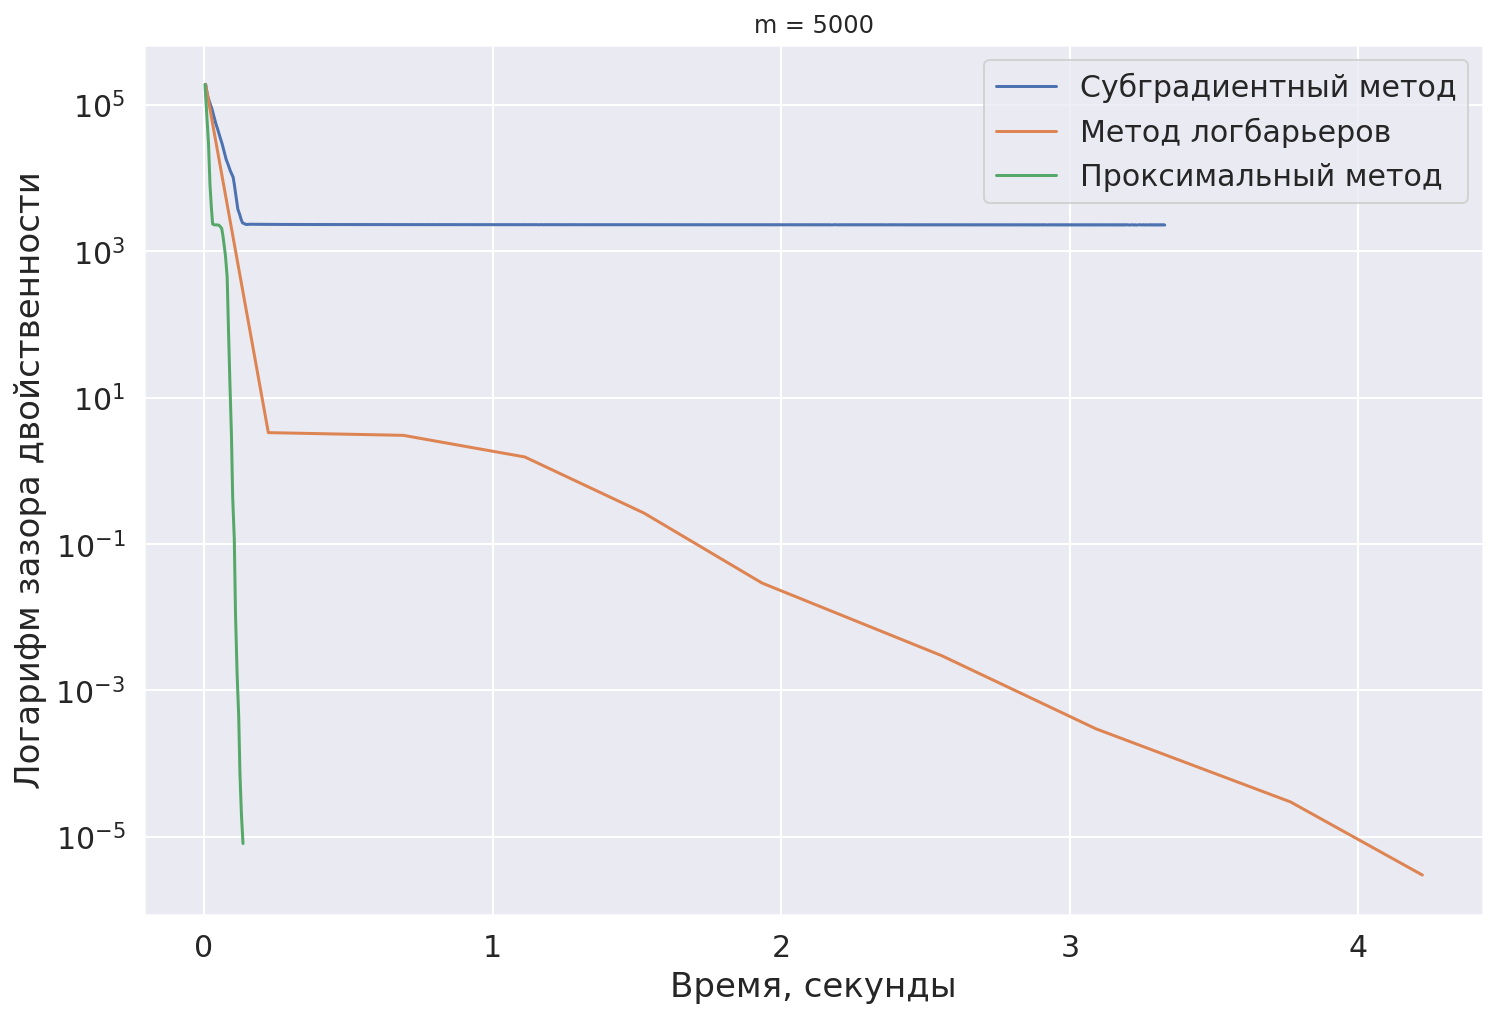

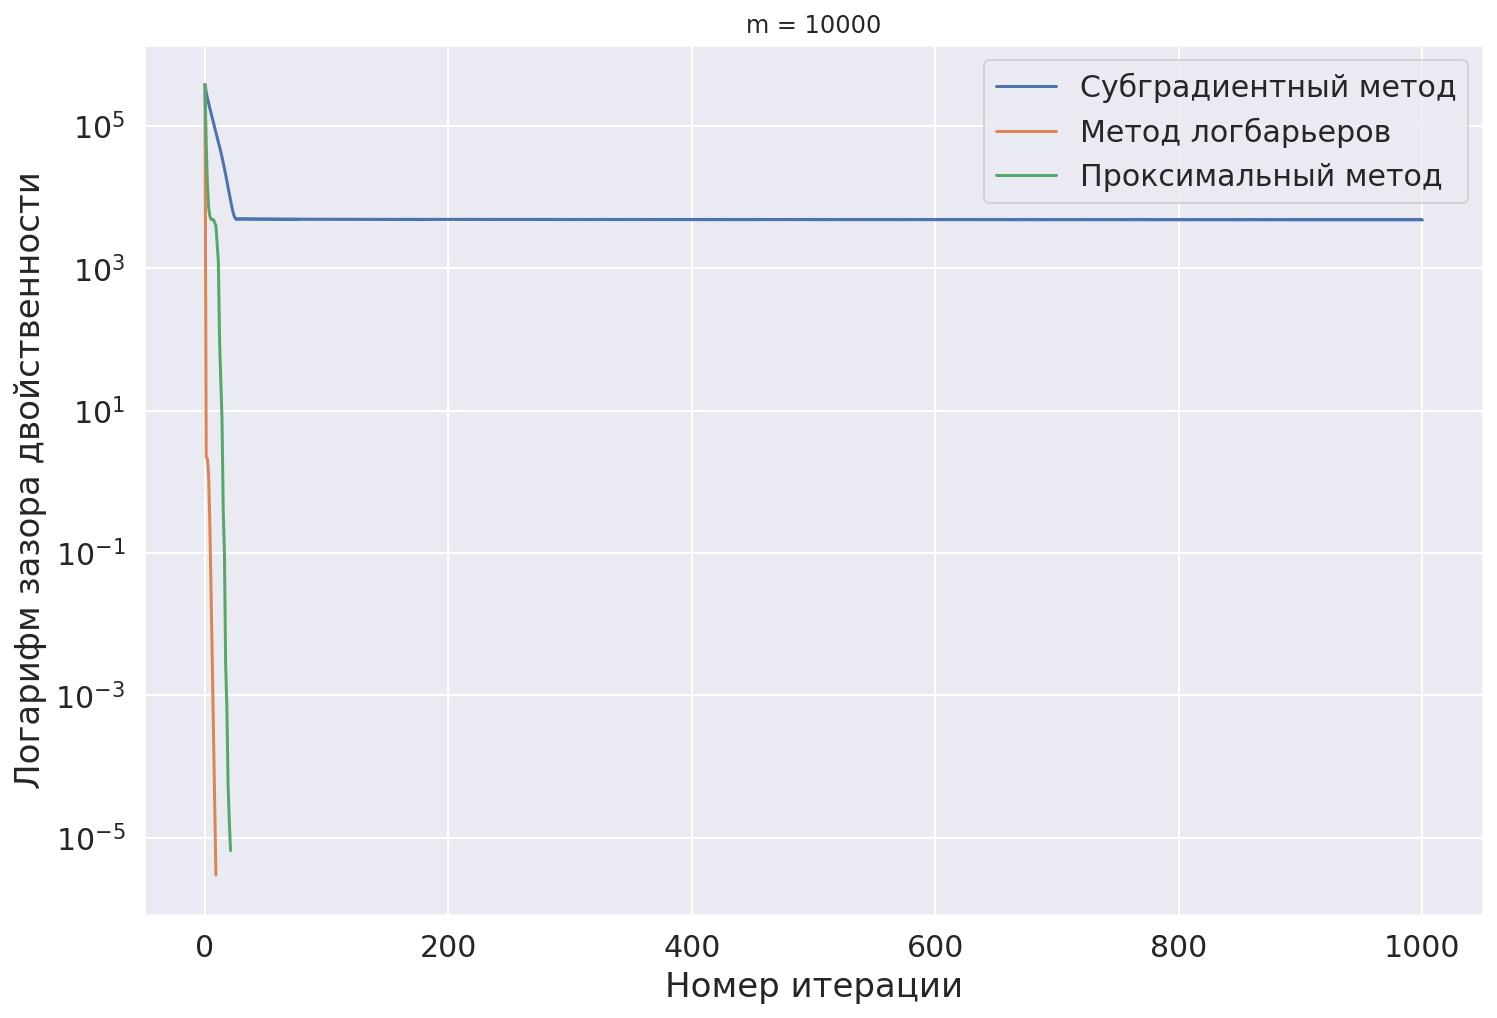

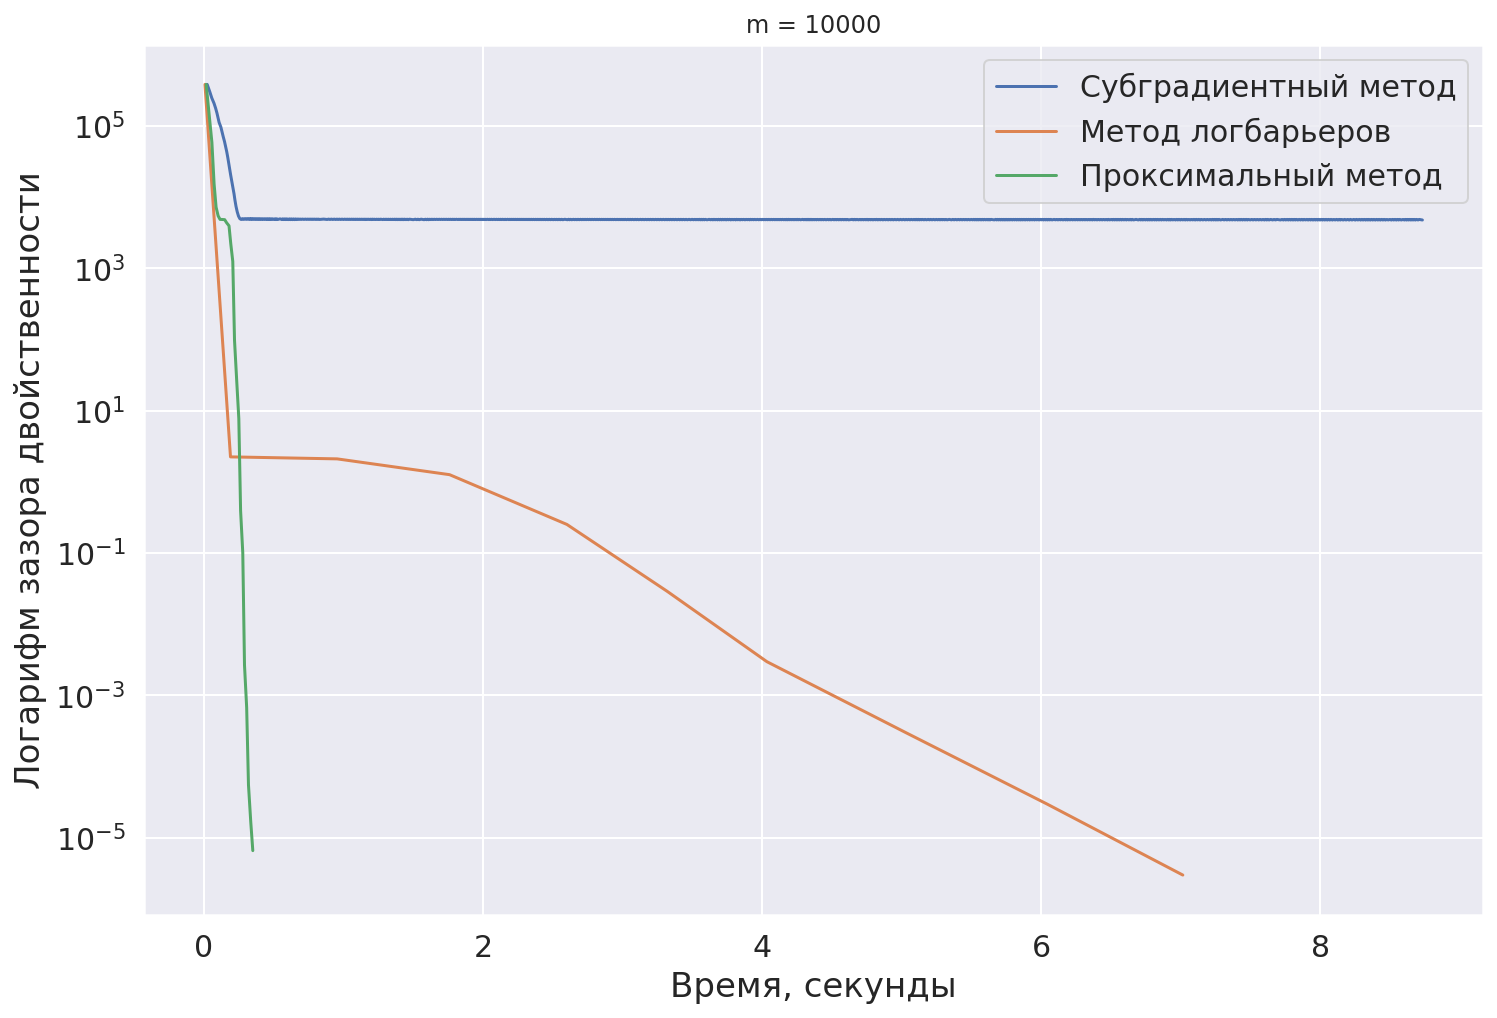

In [ ]:
n=500
for m in n_arr:
    histories = methods_histories(m, n)
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.xlabel('Номер итерации', fontsize=17)
    plt.ylabel('Логарифм зазора двойственности', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid(True)
    plt.yscale('log')
    name = "m_iters" + str(m) + '.pdf'
    plt.title("m = " + str(m))

    for method in histories:
        history = histories[method]
        ax.plot(np.arange(len(history['duality_gap'])), history['duality_gap'], 
                label=str(method))
    ax.legend(fontsize=15)
    plt.savefig(name, bbox_inches="tight", dpi=150)
    plt.show()

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.xlabel('Время, секунды', fontsize=17)
    plt.ylabel('Логарифм зазора двойственности', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title("m = " + str(m))
    ax.grid(True)
    plt.yscale('log')
    name = "m_time" + str(m) + '.pdf'

    for method in histories:
        history = histories[method]
        ax.plot(history["time"], history['duality_gap'], label=str(method))
    ax.legend(fontsize=15)
    plt.savefig(name, bbox_inches="tight", dpi=150)
    plt.show()

3. Рассмотрим теперь графики при изменении размера выборки $\lambda$.


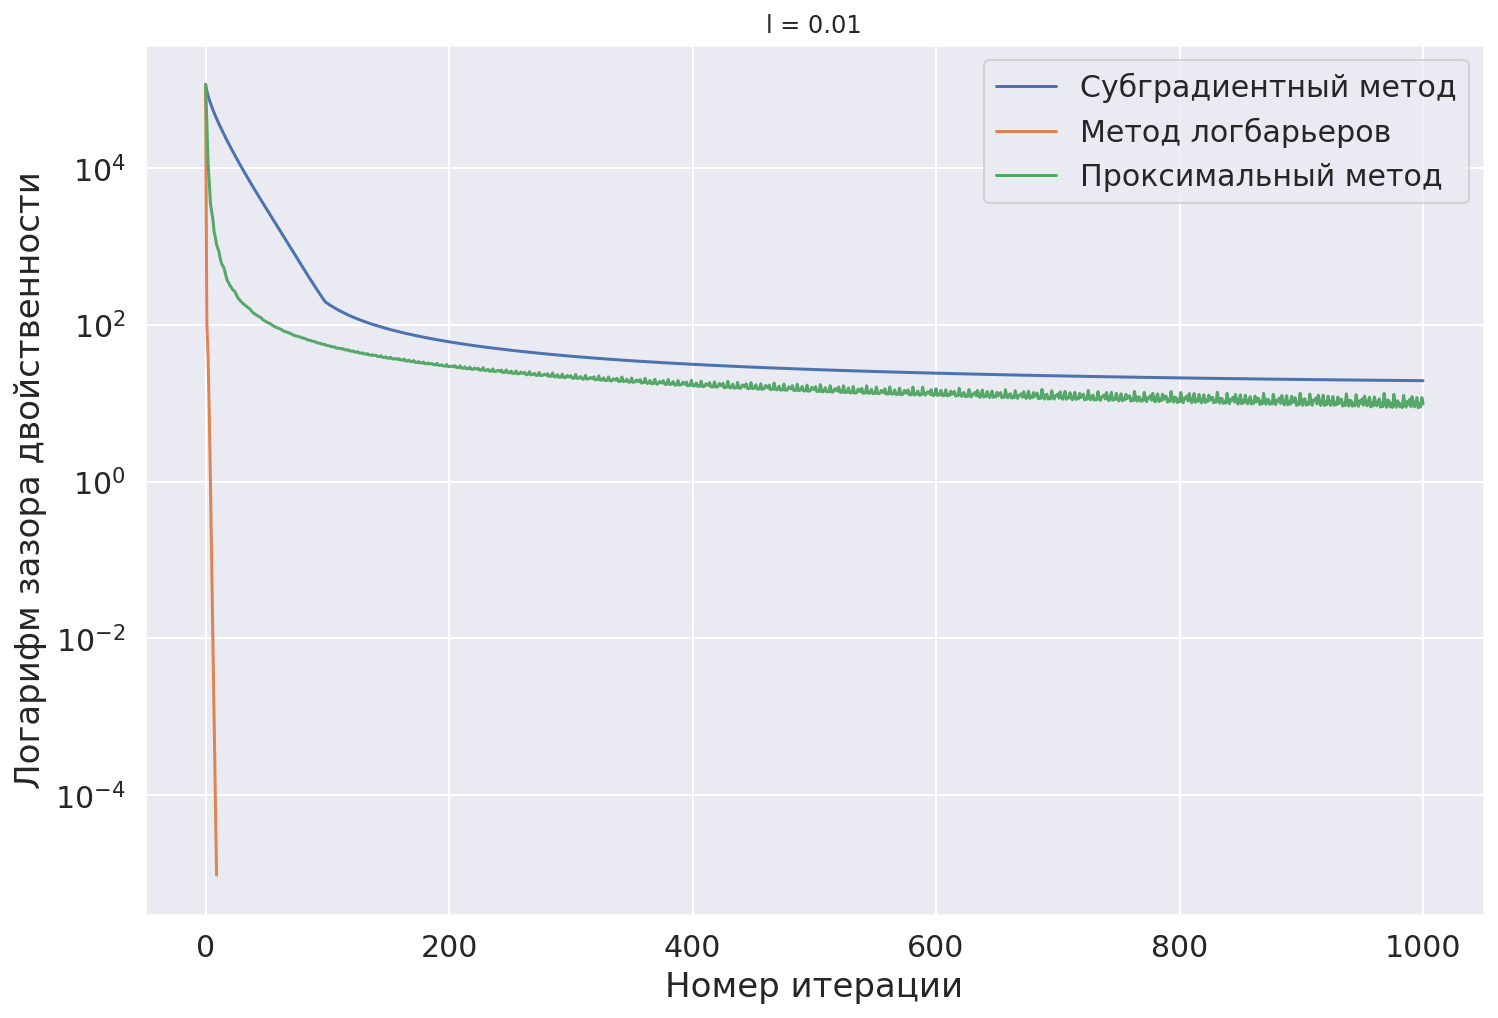

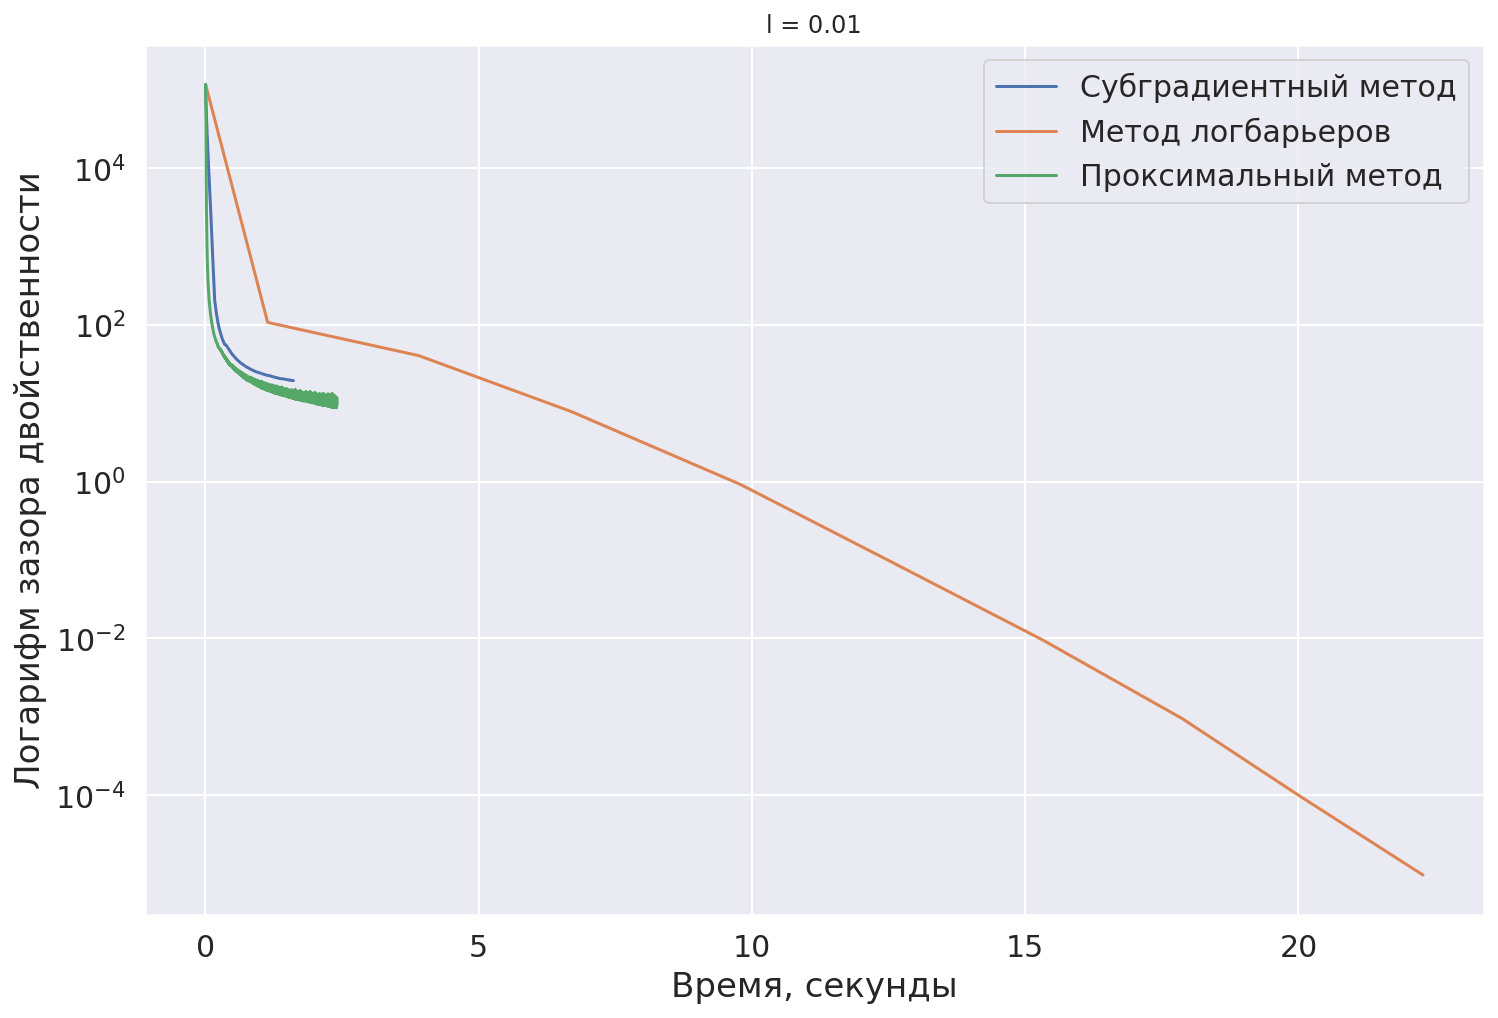

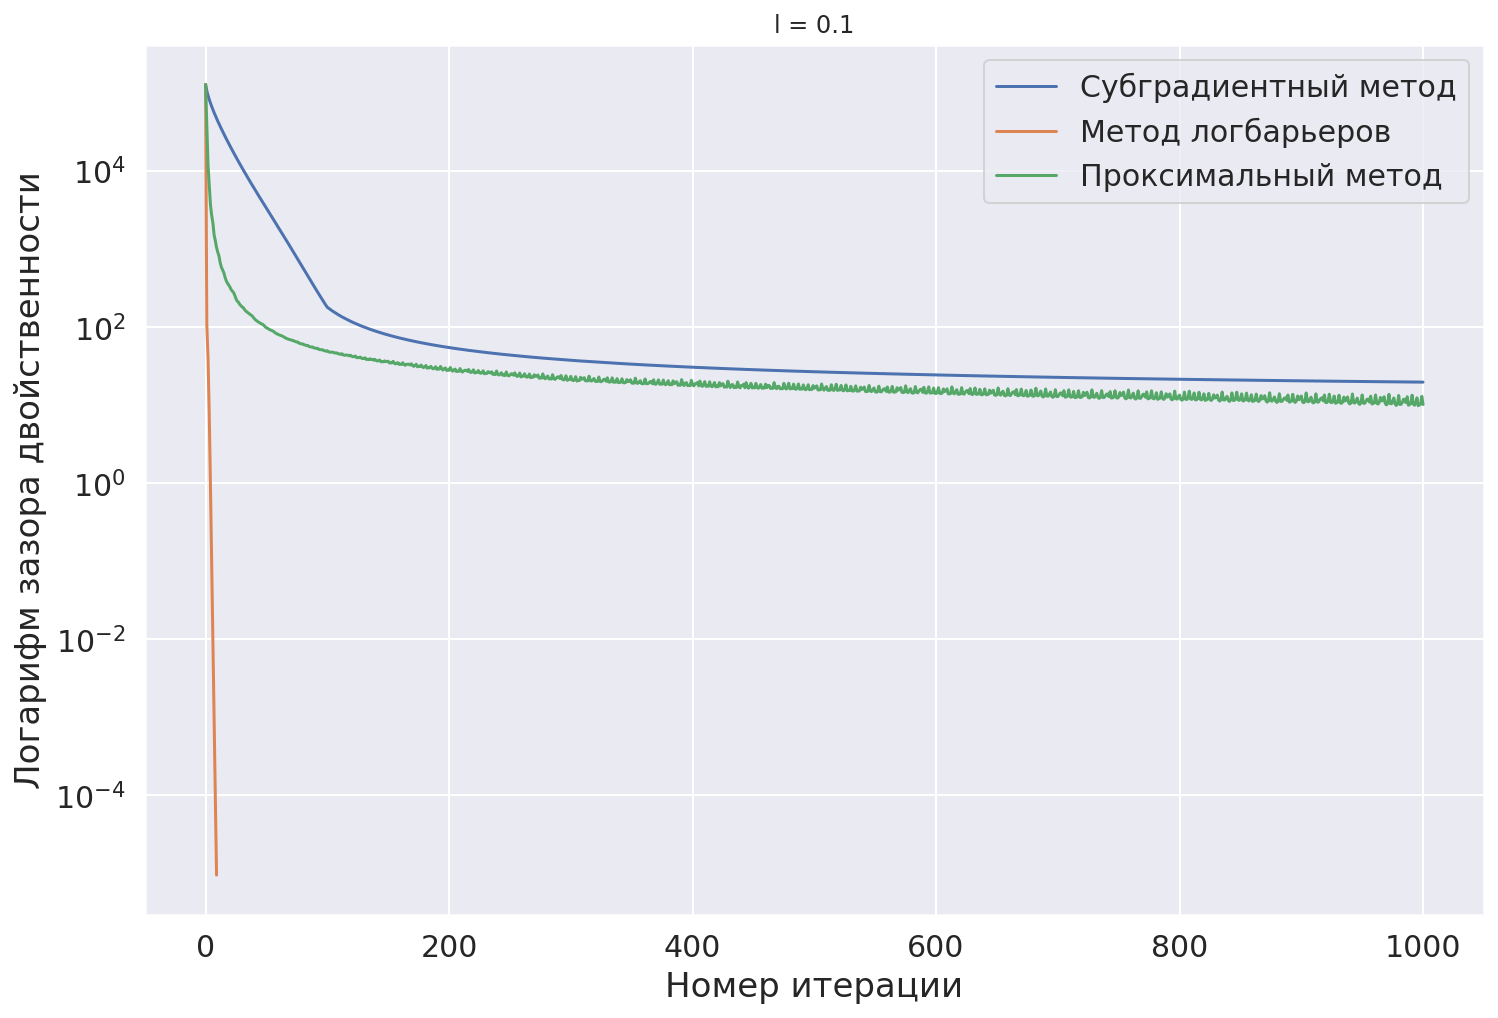

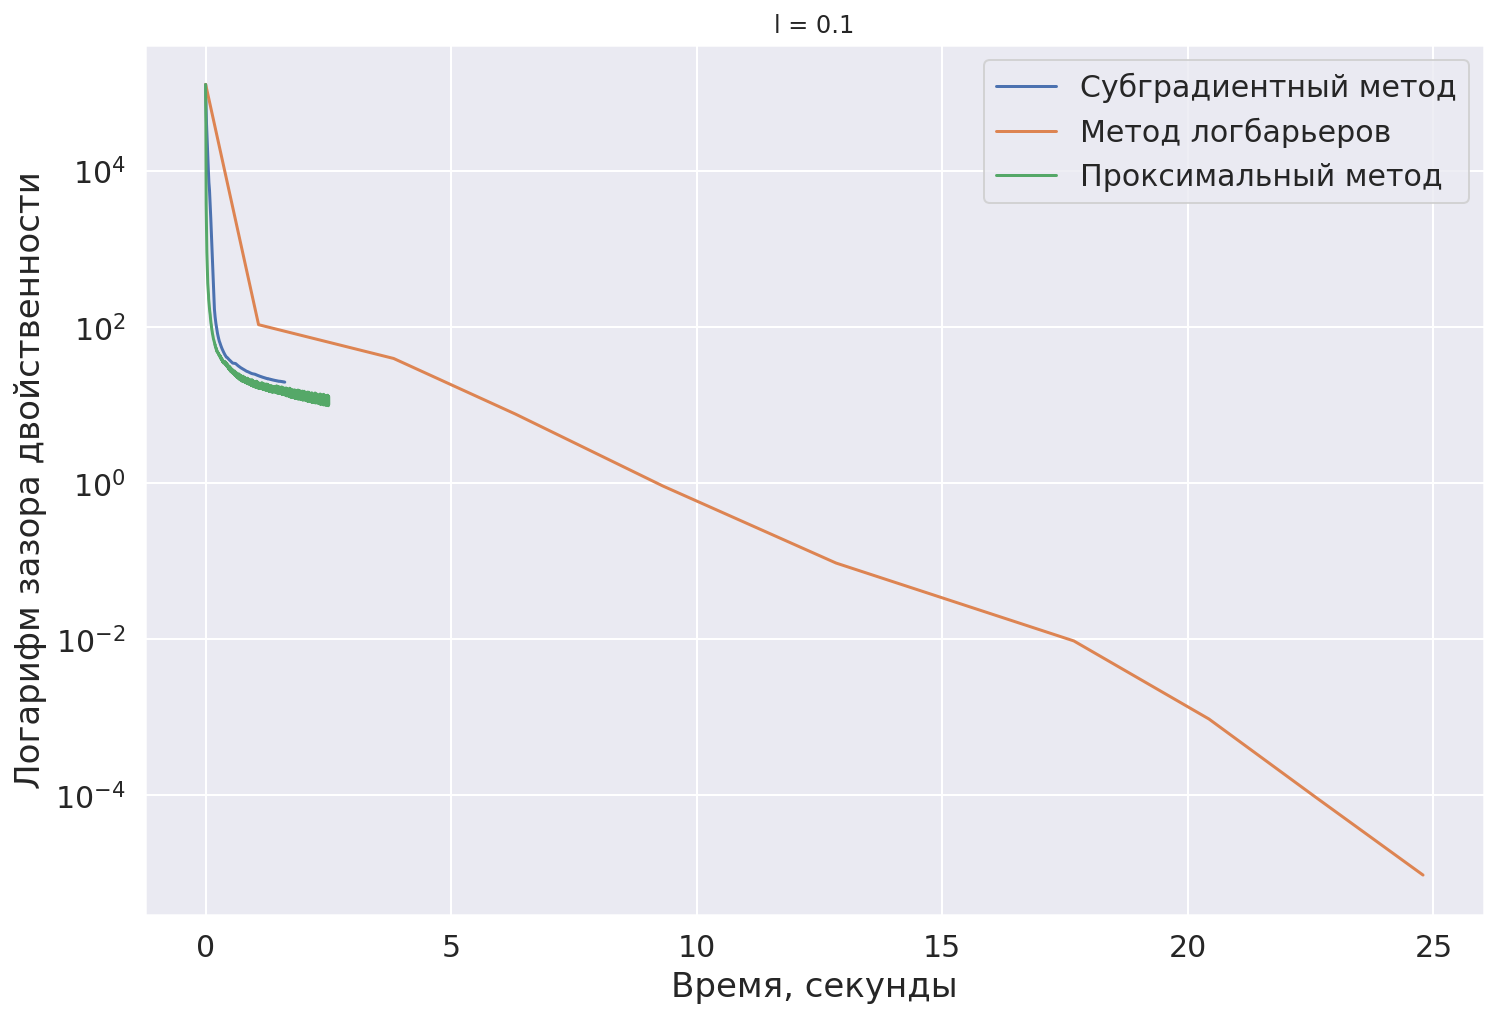

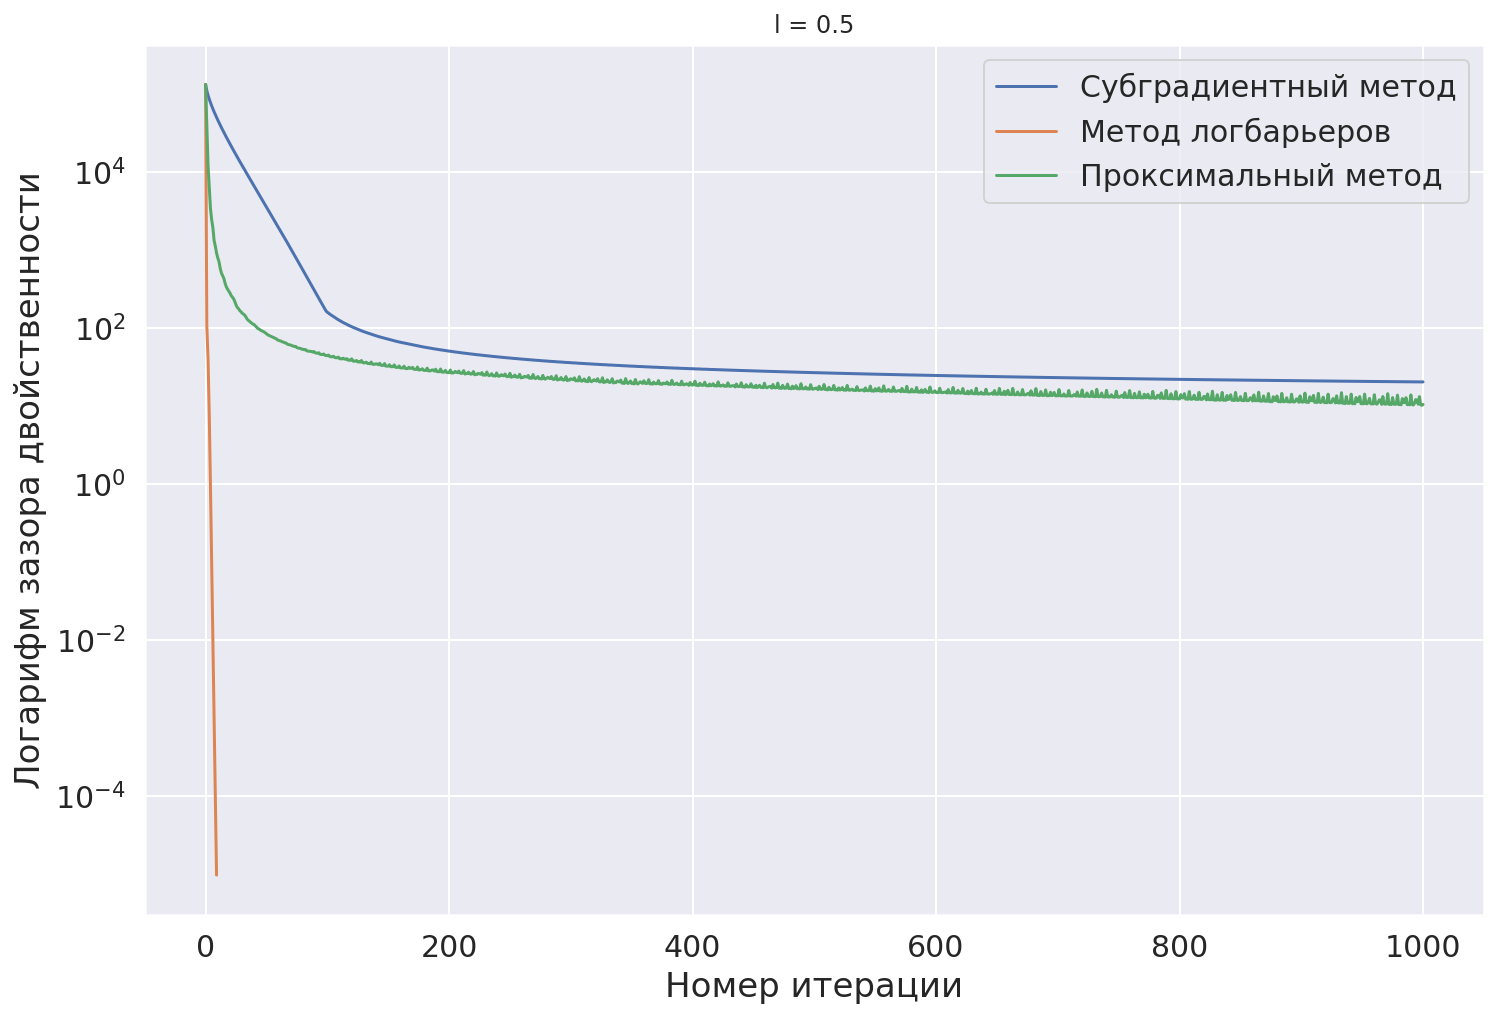

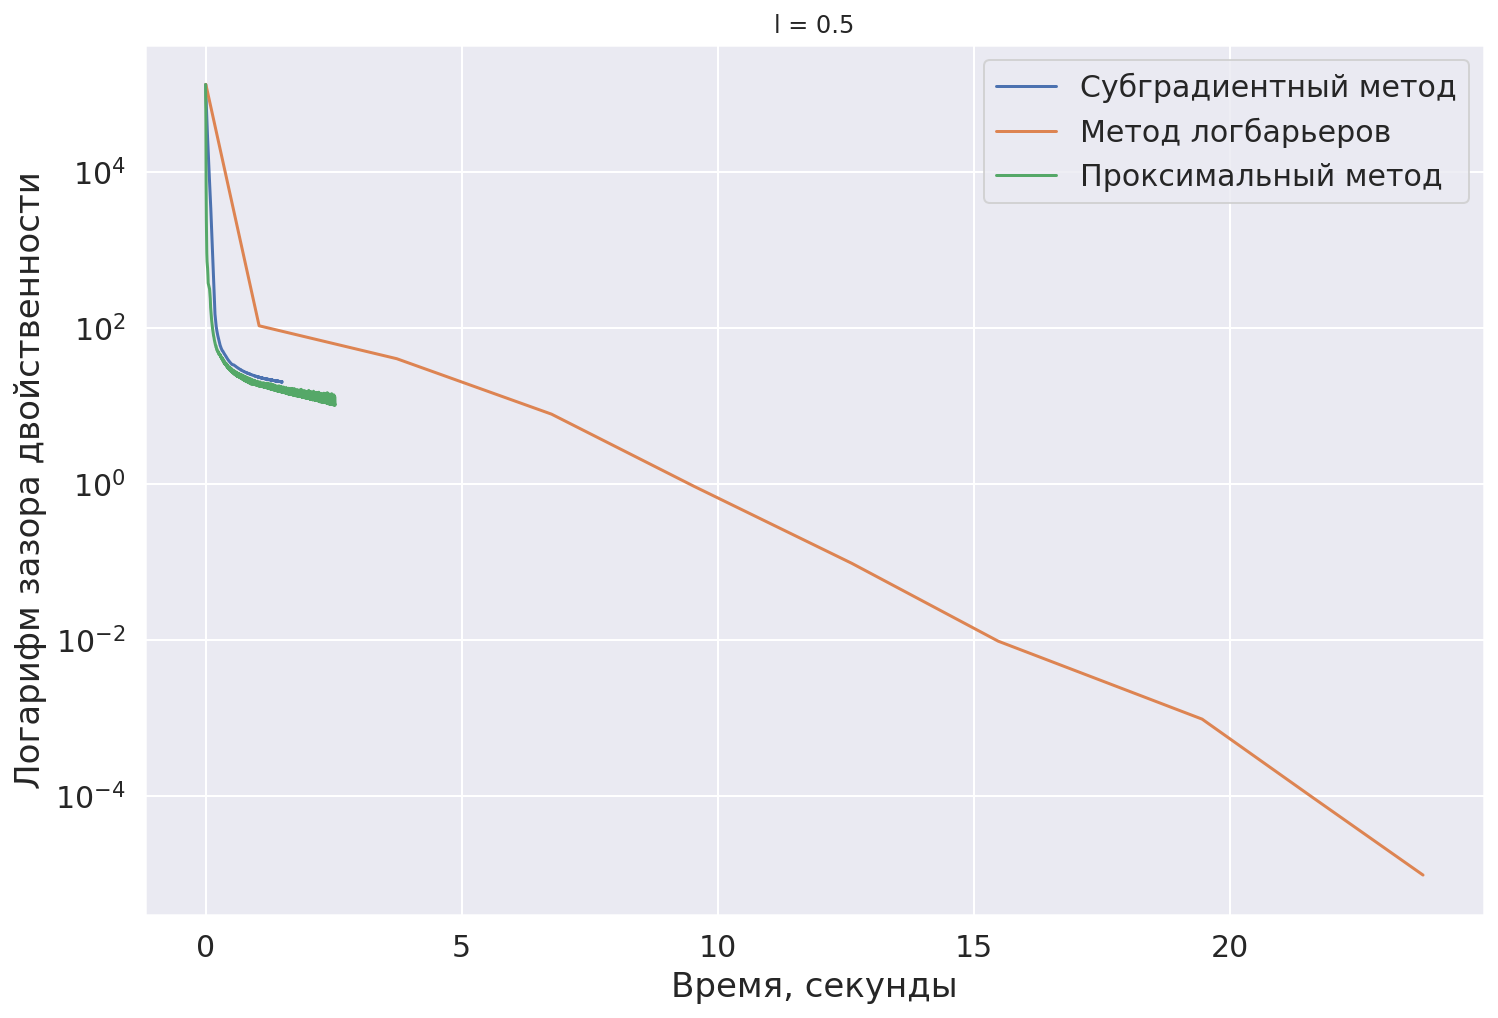

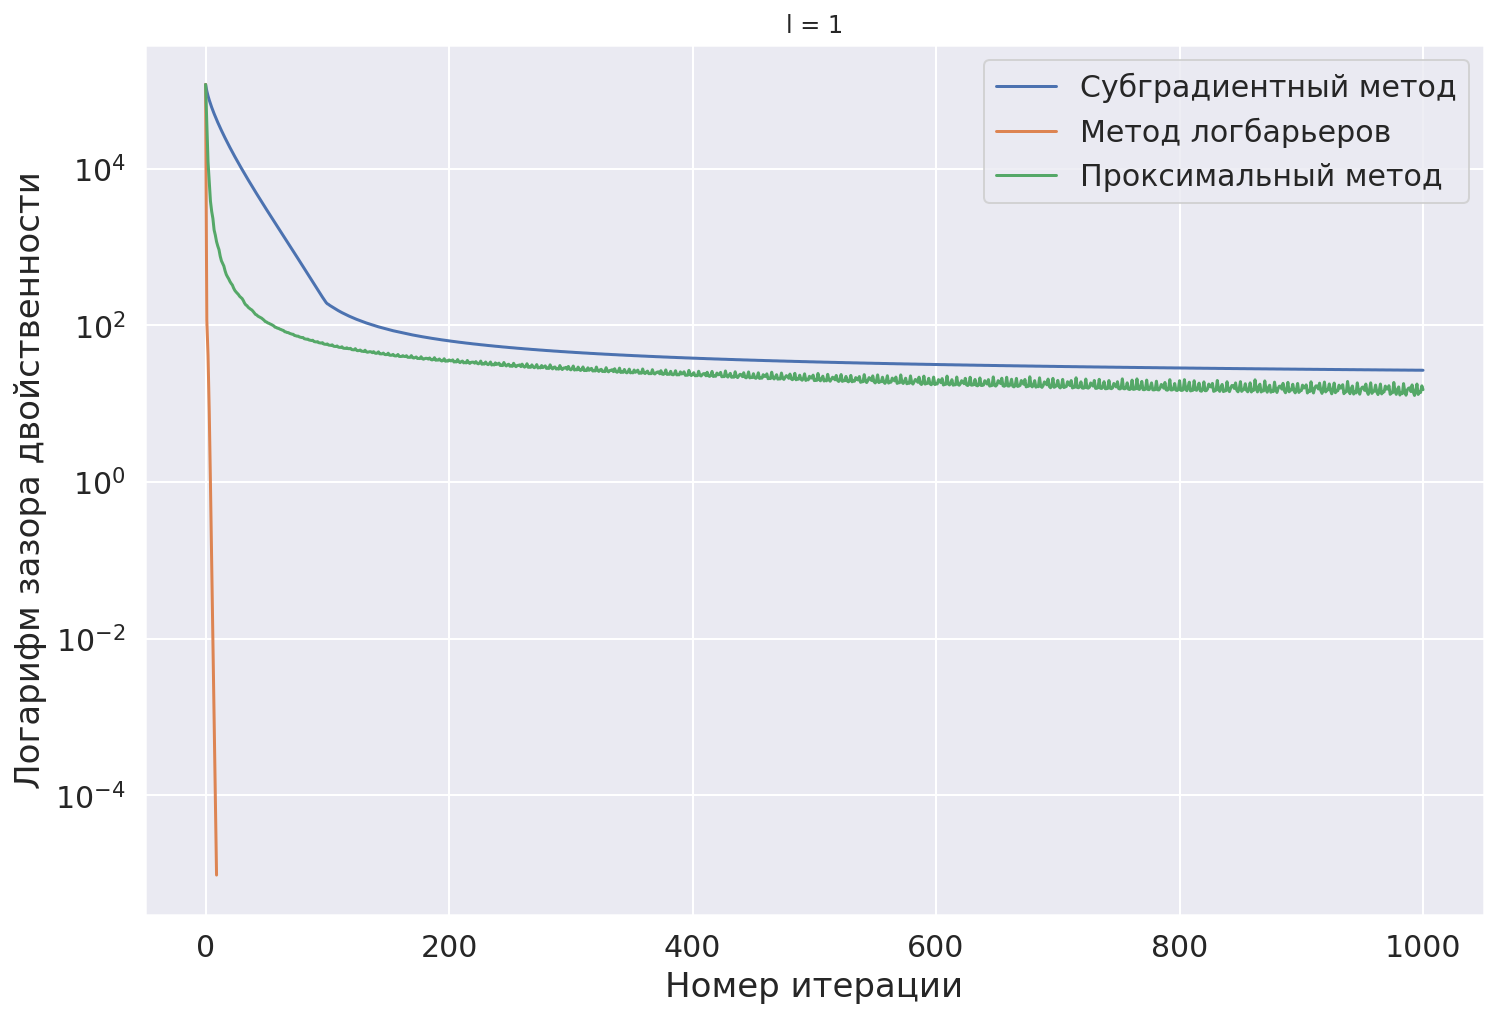

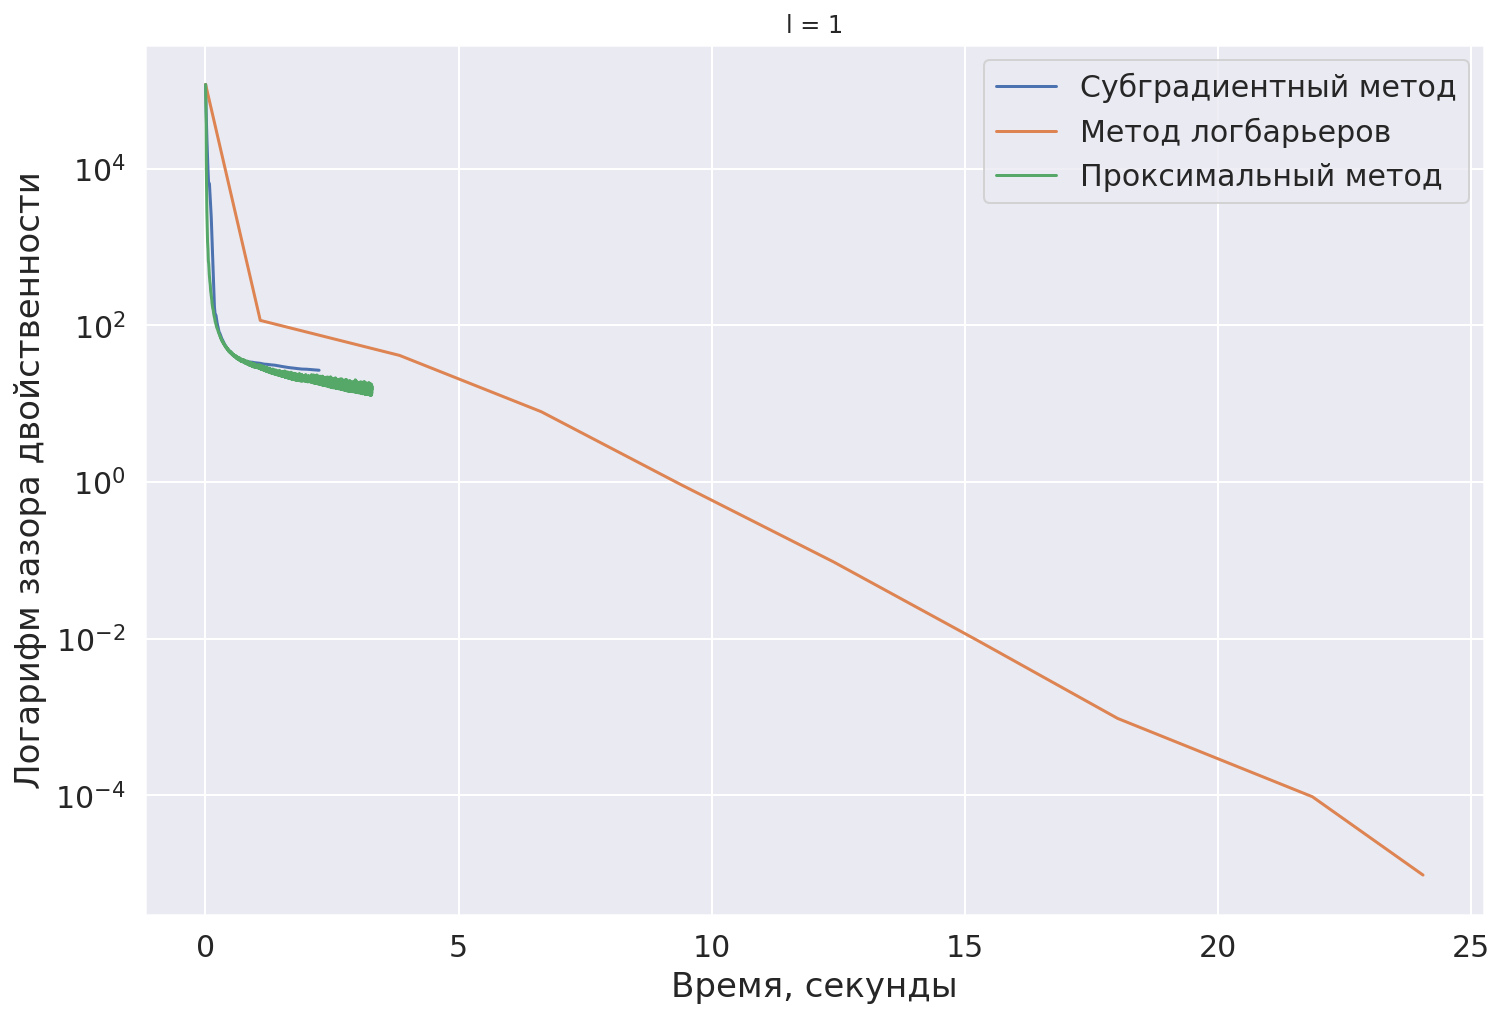

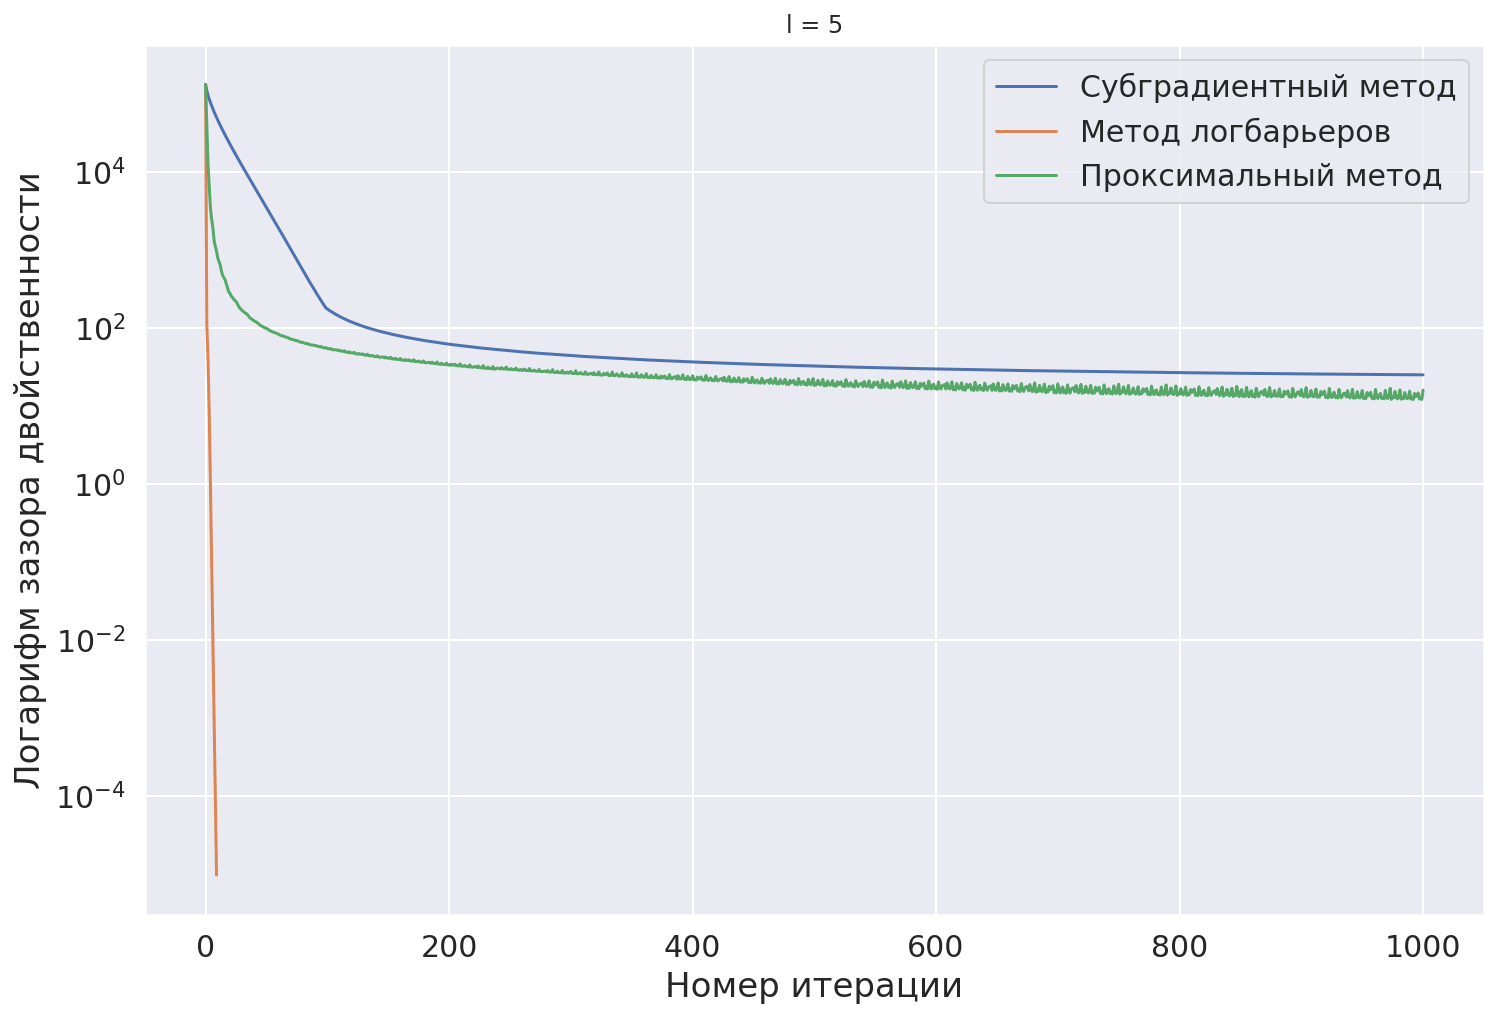

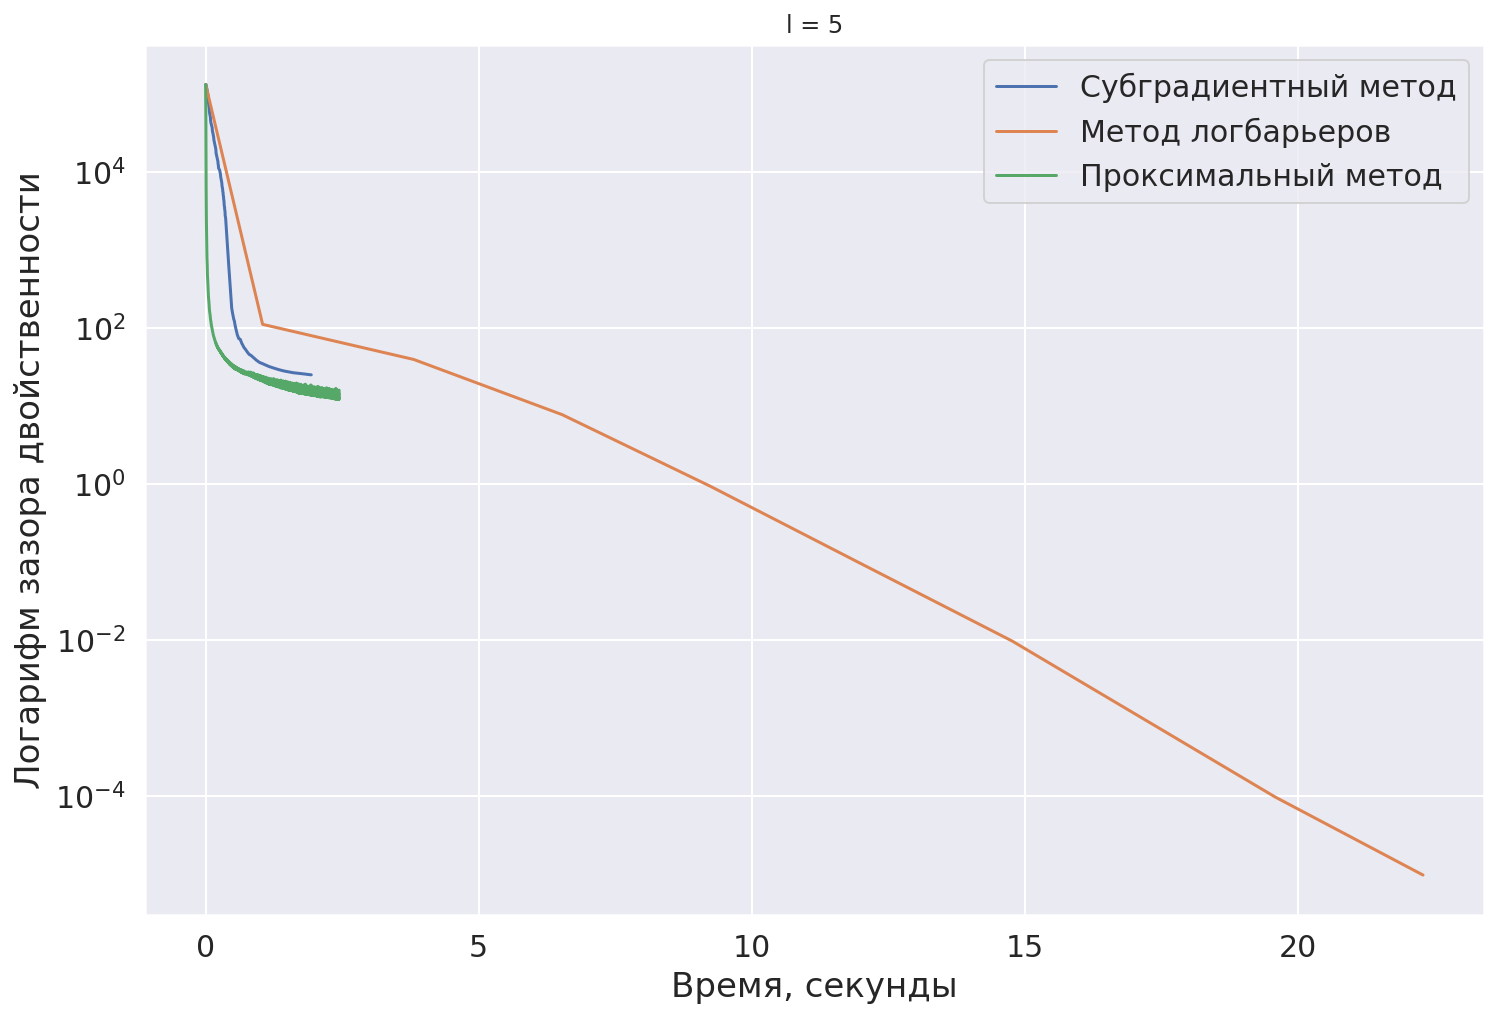

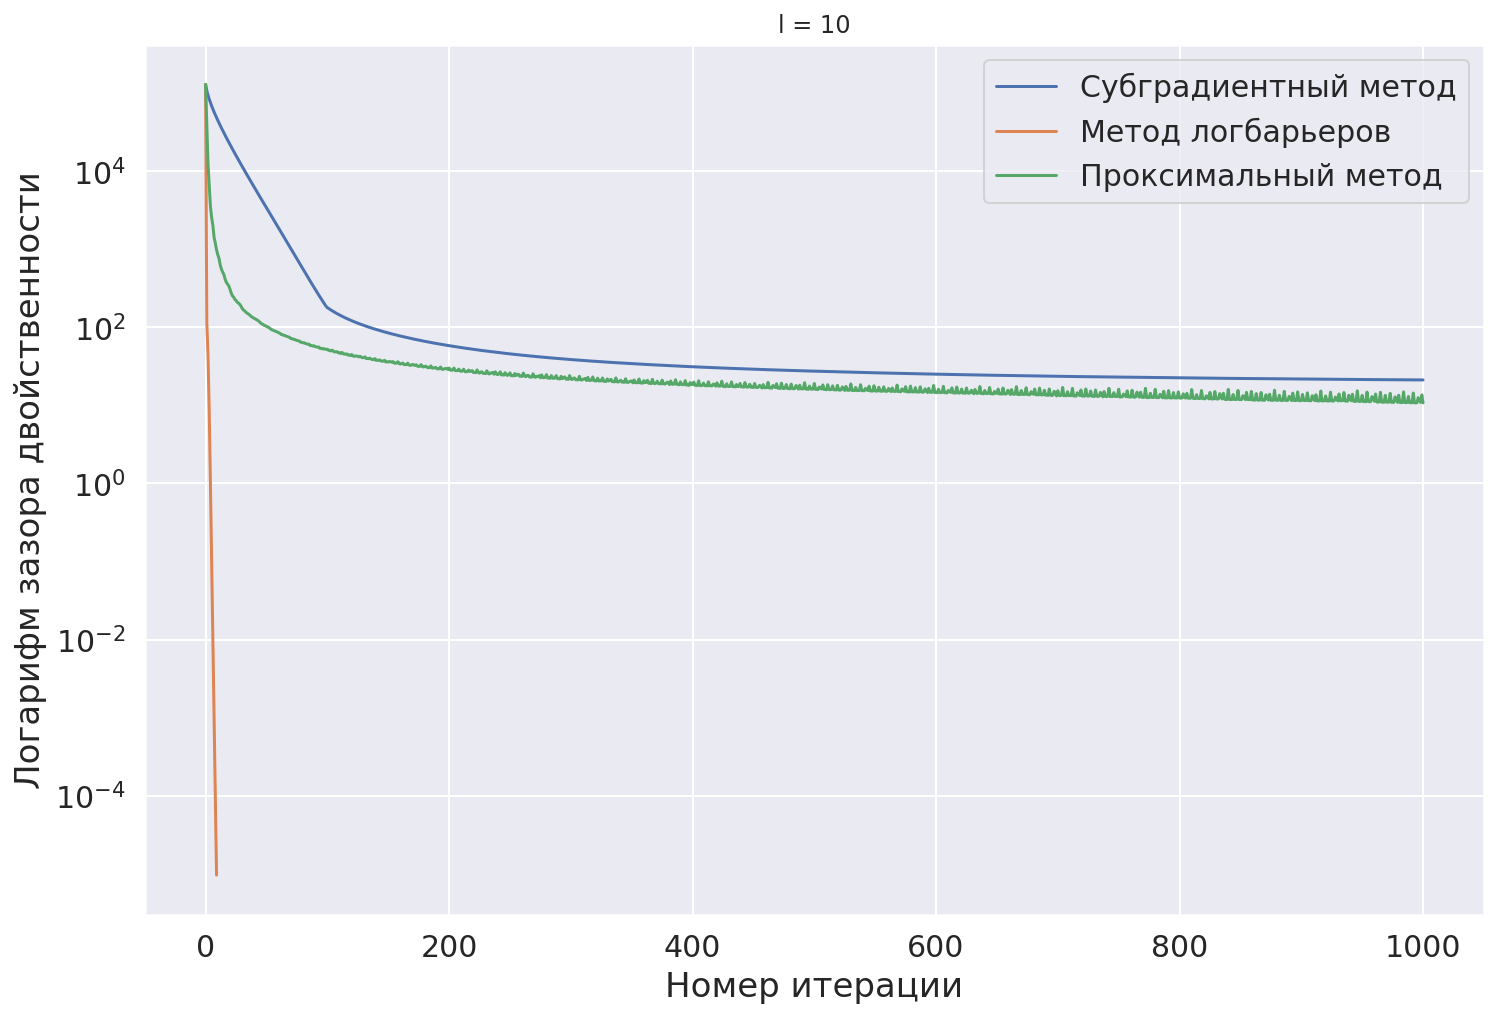

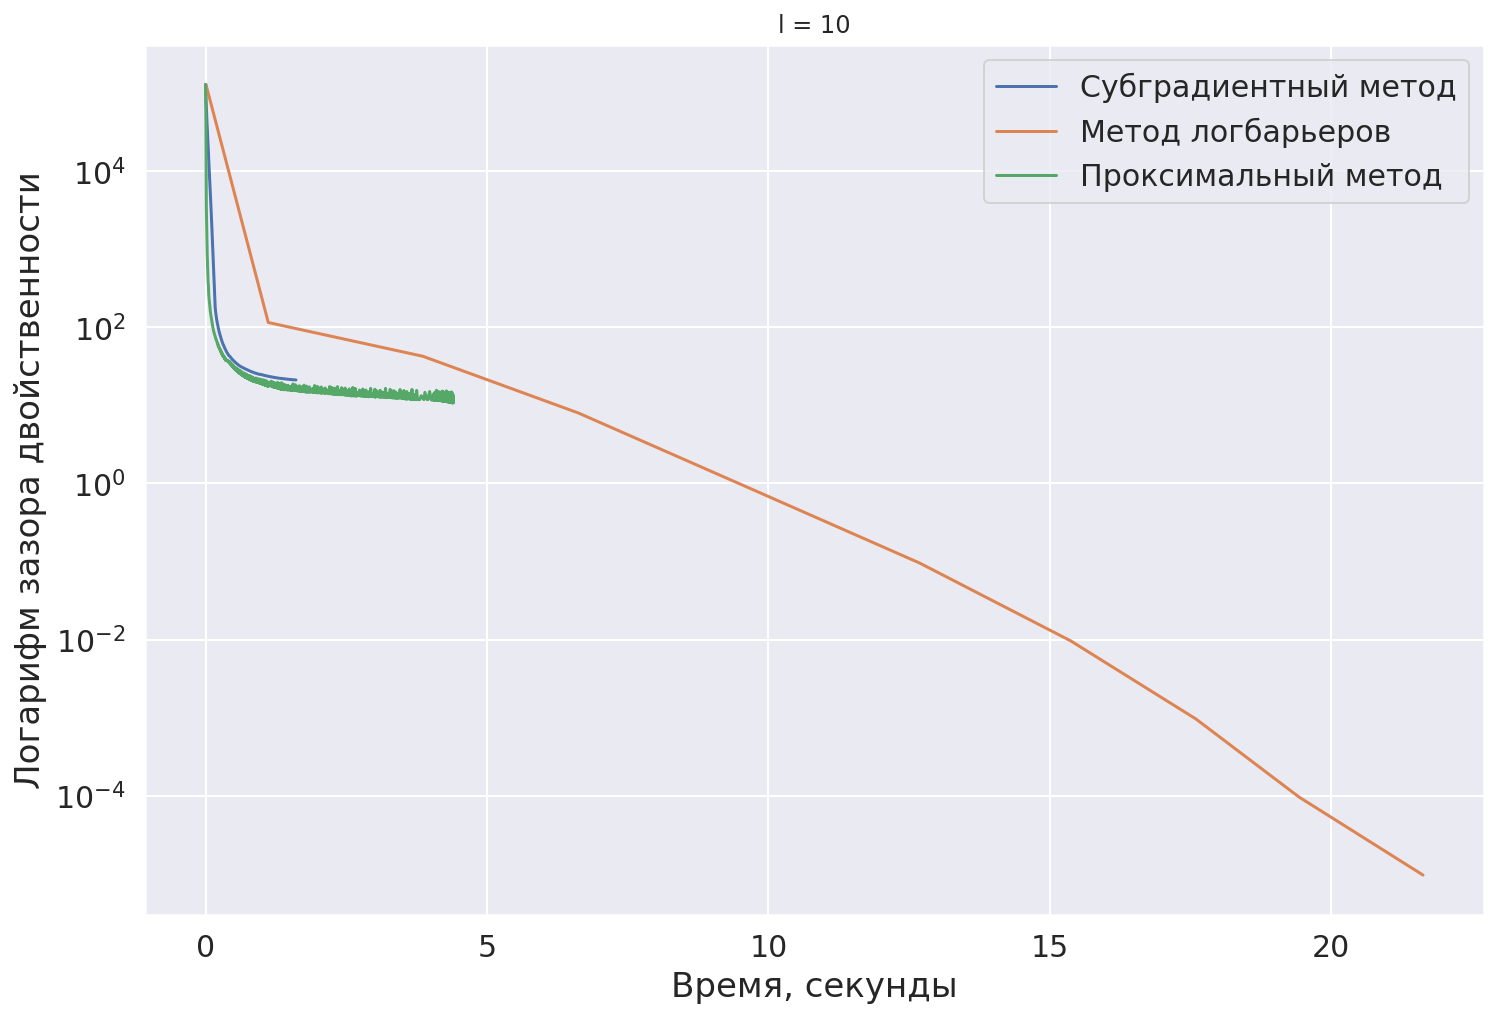

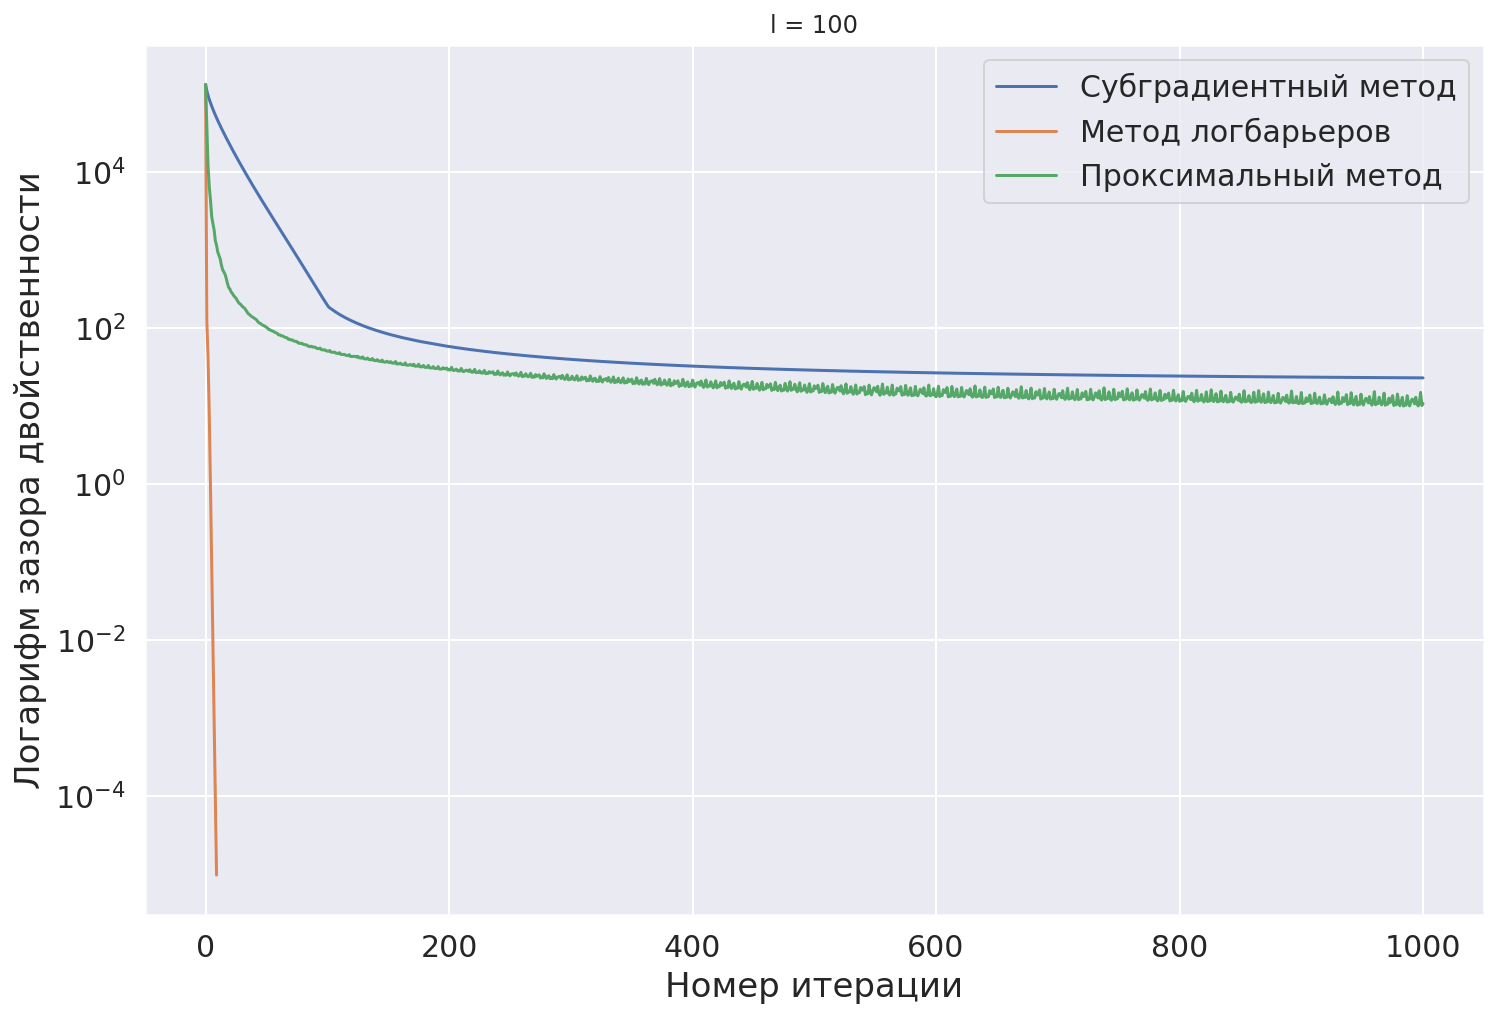

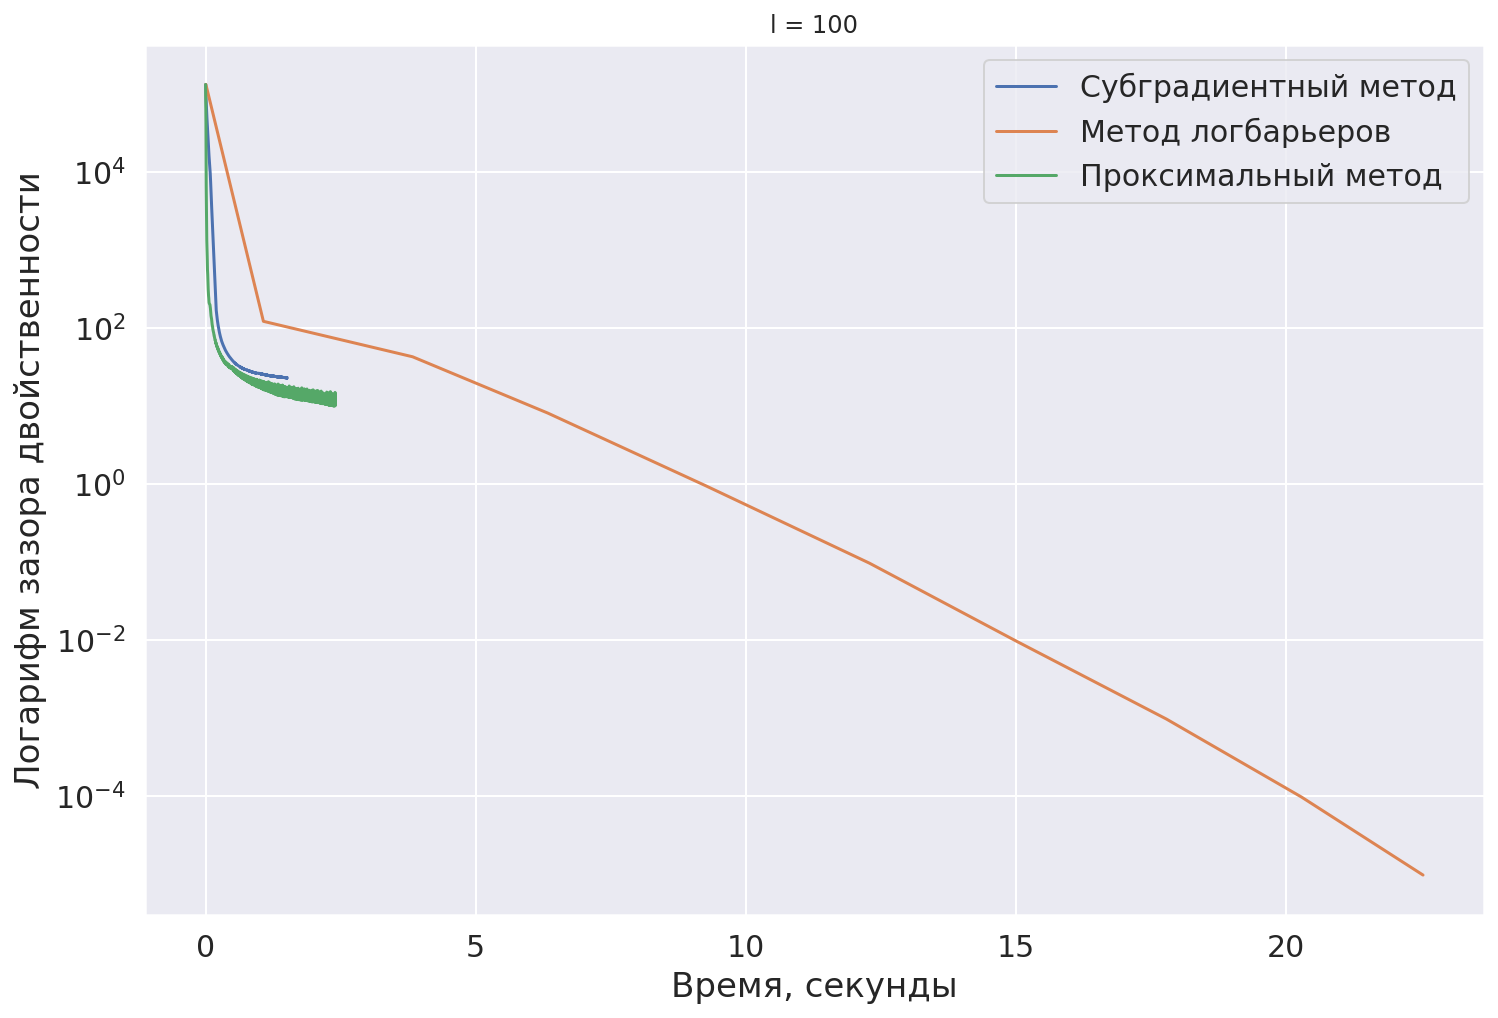

In [ ]:
for l in [0.01, 0.1, 0.5, 1, 5, 10, 100]:
    histories = methods_histories(500, 500)
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.xlabel('Номер итерации', fontsize=17)
    plt.ylabel('Логарифм зазора двойственности', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid(True)
    plt.yscale('log')
    name = "lambda_iters" + str(l) + '.pdf'
    plt.title("l = " + str(l))

    for method in histories:
        history = histories[method]
        ax.plot(np.arange(len(history['duality_gap'])), history['duality_gap'], 
                label=str(method))
    ax.legend(fontsize=15)
    plt.savefig(name, bbox_inches="tight", dpi=150)
    plt.show()

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.xlabel('Время, секунды', fontsize=17)
    plt.ylabel('Логарифм зазора двойственности', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title("l = " + str(l))
    ax.grid(True)
    plt.yscale('log')
    name = "l_time" + str(l) + '.pdf'

    for method in histories:
        history = histories[method]
        ax.plot(history["time"], history['duality_gap'], label=str(method))
    ax.legend(fontsize=15)
    plt.savefig(name, bbox_inches="tight", dpi=150)
    plt.show()